In [1]:
%%time
import numpy as np

def simulate(aa, bb, N=2000):
    w = np.array([0, 1, 0], dtype = np.int32)
    s = np.array([0, -1, 0], dtype = np.int32)
    d = np.array([1, 0, 0], dtype = np.int32)
    a = np.array([-1, 0, 0], dtype = np.int32)
    e = np.array([0, 0, 1], dtype = np.int32)
    q = np.array([0, 0, -1], dtype = np.int32)

    class NDSparseLattice:
        def __init__(self):
            self.elements = {}

        def addValue(self, tuple, value):
            self.elements[tuple] = value

        def readValue(self, tuple):
            try:
                value = self.elements[tuple]
            except KeyError:
                # could also be 0.0 if using floats...
                value = 1
            return value

    def get_near(lattice, pos):
        n_w = lattice.readValue((pos[0], pos[1]+1, pos[2]))
        n_s = lattice.readValue((pos[0], pos[1]-1, pos[2]))
        n_d = lattice.readValue((pos[0]+1, pos[1], pos[2]))
        n_a = lattice.readValue((pos[0]-1, pos[1], pos[2]))
        n_e = lattice.readValue((pos[0], pos[1], pos[2]+1))
        n_q = lattice.readValue((pos[0], pos[1], pos[2]-1))
        return [n_w, n_s, n_d, n_a, n_e, n_q]

    def number_of_zero_neib(lattice, pos):
        if lattice.readValue((pos[0], pos[1], pos[2])) == 0:
            return 0
        else:
            count = 0
            array = get_near(lattice, pos)
            for item in array:
                if item == 0:
                    count = count+1
            return count+1

    def update_lattice(lattice, pos):
        lattice.addValue((pos[0], pos[1], pos[2]), 0)
        lattice.addValue((pos[0], pos[1]+1, pos[2]), number_of_zero_neib(lattice, pos+w))
        lattice.addValue((pos[0], pos[1]-1, pos[2]), number_of_zero_neib(lattice, pos+s))
        lattice.addValue((pos[0]+1, pos[1], pos[2]), number_of_zero_neib(lattice, pos+d))
        lattice.addValue((pos[0]-1, pos[1], pos[2]), number_of_zero_neib(lattice, pos+a))
        lattice.addValue((pos[0], pos[1], pos[2]+1), number_of_zero_neib(lattice, pos+e))
        lattice.addValue((pos[0], pos[1], pos[2]-1), number_of_zero_neib(lattice, pos+q))
        return lattice


    def weight(x, aa, bb):
        if x==0:
            return aa
        elif x==2:
            return 1
        elif x==1:
            print('Error')
            raise TypeError
        else:
            return bb

    def get_prob(lattice, pos, aa, bb):
        near = get_near(lattice, pos)
        norm = sum(near)
        probs = [weight(_, aa, bb) for _ in near]
        norm = sum(probs)
        probs_normed = [_/norm for _ in probs]
        return probs_normed

    def get_next_pos():
        symbol = np.random.choice(['w', 's', 'd', 'a', 'e', 'q'], p = get_prob(lattice, pos, aa, bb))
        if symbol == 'w':
            return w
        if symbol == 's':
            return s
        if symbol == 'd':
            return d
        if symbol == 'a':
            return a
        if symbol == 'e':
            return e
        if symbol == 'q':
            return q


    lattice = NDSparseLattice()
    pos = np.array([0,0,0], dtype=np.int32)
    lattice = update_lattice(lattice, pos)
    #visited
    
    from progressbar import ProgressBar
    pbar = ProgressBar()
    
    #for _ in pbar(range(N)):
    #    #visited.append(list(pos))
    #    pos = pos +  get_next_pos()
    #    lattice = update_lattice(lattice, pos)
    while len(lattice.elements)<N:
        pos = pos +  get_next_pos()
        lattice = update_lattice(lattice, pos)
    return lattice

def simulate_vector(vector, N=2000):
    return simulate(vector[0], vector[1], N=N)

Wall time: 214 ms


In [185]:
%%time
lattice_small = simulate(10, 0)

Wall time: 176 ms


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
%%time
import pickle
from progressbar import ProgressBar
pbar = ProgressBar()

random_coords = np.exp(np.random.uniform(-6, 6, (50000, 2)))
dataset = np.zeros((len(random_coords), 8))
lattices = []
count = 0
for pair in pbar(random_coords):
    lattice_small = simulate_vector(pair, N=10000)
    lattices.append(lattice_small.elements)
    if count%100 == 0:
        import pickle
        with open('data', 'wb') as f:
            pickle.dump(lattices, f)
    count += 1

In [593]:
import pickle
with open('data876t78uy', 'wb') as f:
    pickle.dump('384756', f)

In [594]:
with open('data', 'rb') as f:
    var_you_want_to_load_into = pickle.load(f)

In [ ]:
np.save('data_random_coords', random_coords)

In [595]:
np.save('data_random_coords', random_coords)

'384756'

In [565]:
import pickle
f = open('data.txt','wb')
pickle.dump(lattice_small.elements, f)

In [570]:
f = open('data.txt','rb')
res = pickle.load(f)

EOFError: Ran out of input

In [ ]:
print("Unpickling of the object from memory started")
unpickledBook = pickle.loads(pickleBuffer.getbuffer())
print("Unpickling of the object from memory ended")
print("Printing the attributes of unpickled object")

In [3]:
%%time
from progressbar import ProgressBar
pbar = ProgressBar()

random_coords = np.exp(np.random.uniform(-3, 3, (50000, 2)))
dataset = np.zeros((len(random_coords), 8))
count = 0
for pair in pbar(random_coords):
    lattice_small = simulate_vector(pair, N=10000)
    coords = list(lattice_small.elements.keys())
    vals = list(lattice_small.elements.values())
    coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)]
    coords = np.array(coords)
   

    a = [np.max(np.sum(np.square(coords[:500]), axis=1))]
    for _ in range(10):
        if _ not in [1, 8, 9]:
            a.append(np.sum(np.array(list(lattice_small.elements.values())) == _))
    dataset[count] = np.array(a)
    count += 1

Wall time: 32min 51s


In [210]:
dataset.max(0)

array([8913., 1314., 1140.,  448.,  224.,  103.,   46.,   16.])

In [211]:
features = np.zeros_like(dataset)
mean = dataset.mean(0)
std = dataset.max(0)
for _ in range(len(features)):
    features[_] = (dataset[_] - mean)/std

In [471]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.layers.normalization import BatchNormalization
from keras.layers import LeakyReLU

model = Sequential()
model.add(Dense(8, input_shape = (8,)))
model.add(LeakyReLU(alpha=0.085))
model.add(BatchNormalization())
model.add(Dense(8*8))
model.add(LeakyReLU(alpha=0.085))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8*8*2))
model.add(LeakyReLU(alpha=0.085))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Dense(8*8*4))
model.add(LeakyReLU(alpha=0.085))
model.add(Dropout(0.5))
model.add(Dense(2, activation='linear'))
model.compile(loss=keras.losses.mean_absolute_error,
              optimizer=keras.optimizers.adam(),
              metrics=['mse'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_117 (Dense)            (None, 8)                 72        
_________________________________________________________________
leaky_re_lu_39 (LeakyReLU)   (None, 8)                 0         
_________________________________________________________________
batch_normalization_34 (Batc (None, 8)                 32        
_________________________________________________________________
dense_118 (Dense)            (None, 64)                576       
_________________________________________________________________
leaky_re_lu_40 (LeakyReLU)   (None, 64)                0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_35 (Batc (None, 64)                256       
__________

In [472]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(features, np.log(random_coords), test_size=0.4)

In [473]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=200,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 6000 samples, validate on 4000 samples
Epoch 1/200
6000/6000 [==============================] - 18s 3ms/step - loss: 1.0291 - mean_squared_error: 1.7275 - val_loss: 0.6815 - val_mean_squared_error: 0.7725
Epoch 2/200
6000/6000 [==============================] - 11s 2ms/step - loss: 0.8162 - mean_squared_error: 1.0903 - val_loss: 0.5539 - val_mean_squared_error: 0.5524
Epoch 3/200
6000/6000 [==============================] - 11s 2ms/step - loss: 0.7290 - mean_squared_error: 0.8942 - val_loss: 0.5483 - val_mean_squared_error: 0.5311
Epoch 4/200
6000/6000 [==============================] - 15s 3ms/step - loss: 0.6730 - mean_squared_error: 0.7807 - val_loss: 0.5141 - val_mean_squared_error: 0.4763
Epoch 5/200
6000/6000 [==============================] - 34s 6ms/step - loss: 0.6464 - mean_squared_error: 0.7237 - val_loss: 0.4793 - val_mean_squared_error: 0.4270
Epoch 6/200
6000/6000 [==============================] - 52s 9ms/step - loss: 0.6224 - mean_squared_error: 0.6792 - val_lo

Epoch 50/200
6000/6000 [==============================] - 15s 2ms/step - loss: 0.5137 - mean_squared_error: 0.4994 - val_loss: 0.4252 - val_mean_squared_error: 0.3775
Epoch 51/200
6000/6000 [==============================] - 17s 3ms/step - loss: 0.5080 - mean_squared_error: 0.4940 - val_loss: 0.4358 - val_mean_squared_error: 0.3770
Epoch 52/200
6000/6000 [==============================] - 15s 3ms/step - loss: 0.5110 - mean_squared_error: 0.5009 - val_loss: 0.4176 - val_mean_squared_error: 0.3723
Epoch 53/200
6000/6000 [==============================] - 18s 3ms/step - loss: 0.5032 - mean_squared_error: 0.4903 - val_loss: 0.4724 - val_mean_squared_error: 0.4279
Epoch 54/200
6000/6000 [==============================] - 15s 3ms/step - loss: 0.5022 - mean_squared_error: 0.4917 - val_loss: 0.4541 - val_mean_squared_error: 0.3986
Epoch 55/200
6000/6000 [==============================] - 23s 4ms/step - loss: 0.5007 - mean_squared_error: 0.4830 - val_loss: 0.4345 - val_mean_squared_error: 0.379

KeyboardInterrupt: 

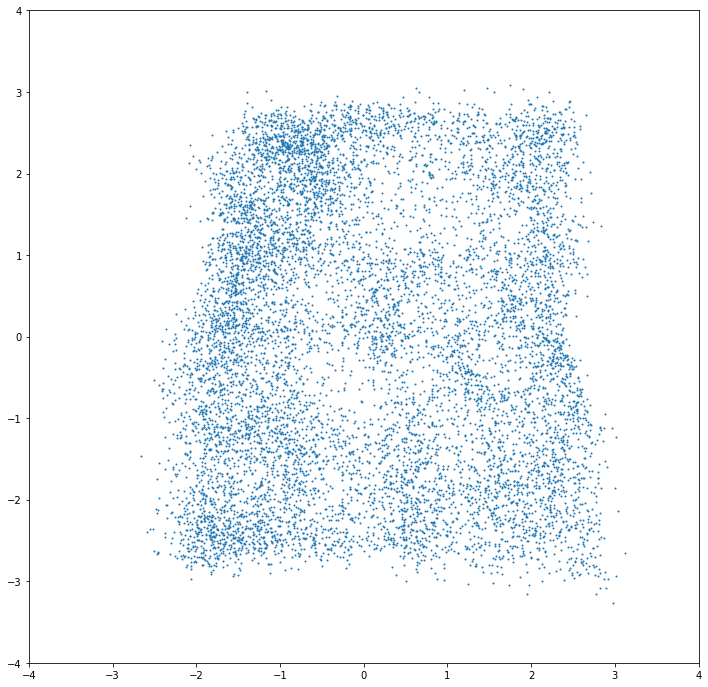

In [553]:
res = model.predict(features)
plt.figure(figsize=(12,12))
plt.scatter(res[:,0], res[:,1], s=1)
plt.xlim((-4,4))
plt.ylim((-4,4));

In [525]:
from keras import backend as K

inp = model.input                                           # input placeholder
outputs = [layer.output for layer in model.layers]          # all layer outputs
functor = K.function([inp, K.learning_phase()], outputs )   # evaluation function


layer_outs = functor([features])

In [526]:
layer_outs[-5]

array([[ 0.61918014, -0.09034492,  0.7659412 , ...,  0.44203892,
        -0.15155664, -0.1579629 ],
       [ 0.44458765, -0.08390854,  0.67259127, ...,  0.4265825 ,
        -0.15269044, -0.15124927],
       [ 0.93457013, -0.10764091,  0.4993236 , ...,  0.18154728,
        -0.17928386, -0.16426763],
       ...,
       [ 0.68082845, -0.09265473,  0.73524135, ...,  0.31918046,
        -0.19775496, -0.17406084],
       [-0.1087104 , -0.0552055 ,  0.18507768, ...,  0.44349483,
        -0.13925923,  0.09088348],
       [-0.15899321,  0.11020423, -0.02574904, ..., -0.27662665,
        -0.15704161,  0.16545604]], dtype=float32)

In [527]:
%%time
import umap

embedding = umap.UMAP(verbose=True, n_components=2, n_epochs=1000).fit_transform(layer_outs[-5])

UMAP(a=None, angular_rp_forest=False, b=None, init='spectral',
     learning_rate=1.0, local_connectivity=1.0, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=1000,
     n_neighbors=15, negative_sample_rate=5, random_state=None,
     repulsion_strength=1.0, set_op_mix_ratio=1.0, spread=1.0,
     target_metric='categorical', target_metric_kwds=None,
     target_n_neighbors=-1, target_weight=0.5, transform_queue_size=4.0,
     transform_seed=42, verbose=True)
Construct fuzzy simplicial set
Sat Nov 16 00:55:50 2019 Finding Nearest Neighbors
Sat Nov 16 00:55:50 2019 Building RP forest with 10 trees
Sat Nov 16 00:55:50 2019 NN descent for 13 iterations


C:\deeplearning\envs\PythonGPU\lib\site-packages\numba\compiler.py:602: NumbaPerformanceWarning: 
The keyword argument 'parallel=True' was specified but no transformation for parallel execution was possible.

To find out why, try turning on parallel diagnostics, see http://numba.pydata.org/numba-doc/latest/user/parallel.html#diagnostics for help.

File "..\..\deeplearning\envs\PythonGPU\lib\site-packages\umap\nndescent.py", line 47:
    @numba.njit(parallel=True)
    def nn_descent(
    ^

  self.func_ir.loc))


	 0  /  13
	 1  /  13
	 2  /  13
Sat Nov 16 00:55:52 2019 Finished Nearest Neighbor Search
Sat Nov 16 00:55:53 2019 Construct embedding
	completed  0  /  1000 epochs
	completed  100  /  1000 epochs
	completed  200  /  1000 epochs
	completed  300  /  1000 epochs
	completed  400  /  1000 epochs
	completed  500  /  1000 epochs
	completed  600  /  1000 epochs
	completed  700  /  1000 epochs
	completed  800  /  1000 epochs
	completed  900  /  1000 epochs
Sat Nov 16 00:56:23 2019 Finished embedding
Wall time: 33.1 s


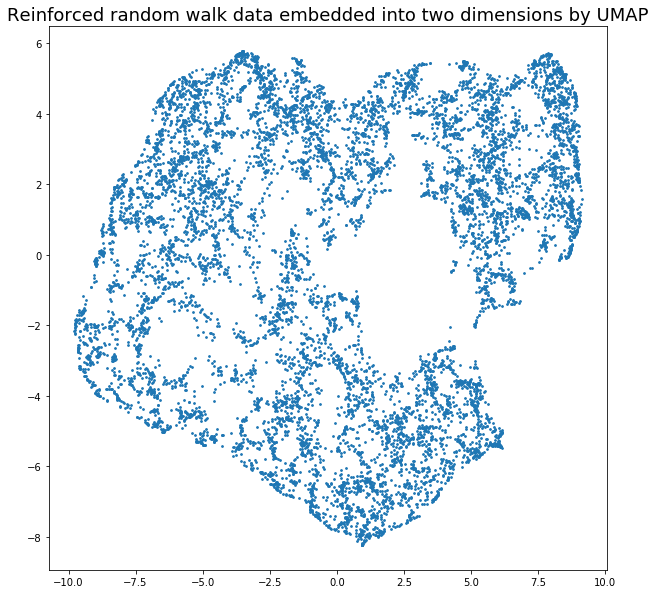

In [528]:
fig, ax = plt.subplots(figsize=(10, 10))
plt.scatter(
    embedding[:, 0], embedding[:, 1], s=3
)
plt.title("Reinforced random walk data embedded into two dimensions by UMAP", fontsize=18)
plt.show()

In [557]:
from sklearn.cluster import AgglomerativeClustering

cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
labels =  cluster.fit_predict(embedding)

In [530]:
import hdbscan
labels = hdbscan.HDBSCAN(
    min_samples=1,
    min_cluster_size=200,
).fit_predict(embedding)

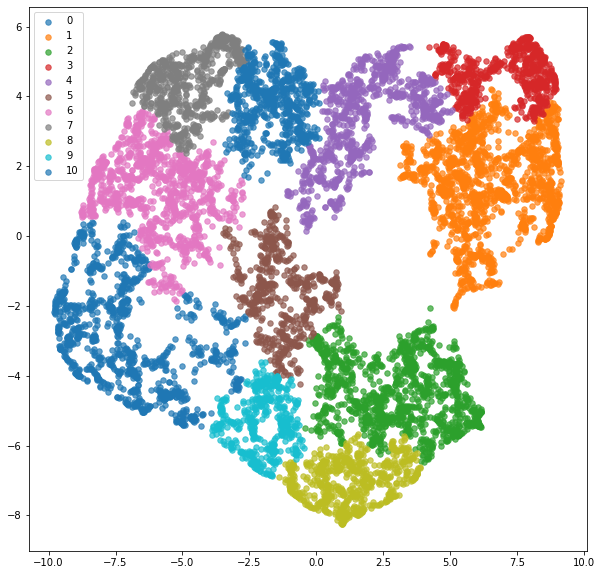

In [558]:
def plt_cls(idx):
    t = embedding[labels==idx]
    plt.scatter(t[:,0], t[:,1], alpha=0.7, s=30, label=idx)

plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels))):
    plt_cls(i)
    labels__.append(str(i))
plt.legend(labels__);

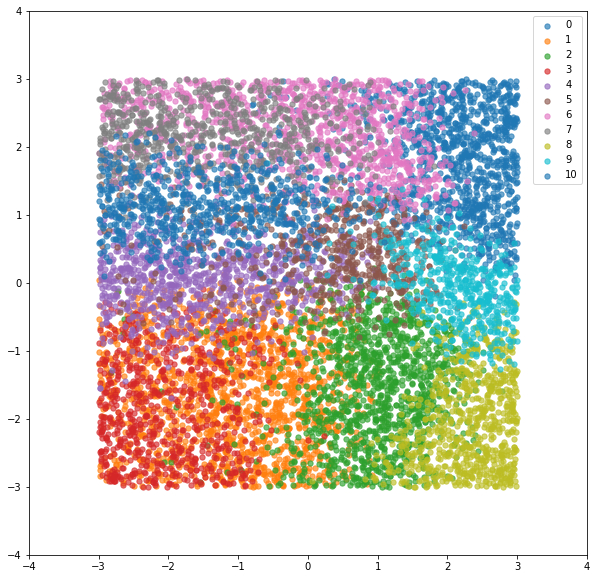

In [559]:
def plt_cls(idx):
    t = np.log(random_coords[:][labels==idx])
    plt.scatter(t[:,0], t[:,1], alpha=0.65, s=28, label=idx)
    
plt.figure(figsize=(10,10))
labels__ = []
for i in range(len(set(labels))):
    plt_cls(i)
    labels__.append(str(i))
plt.legend(labels__)
plt.xlim((-4,4))
plt.ylim((-4,4));

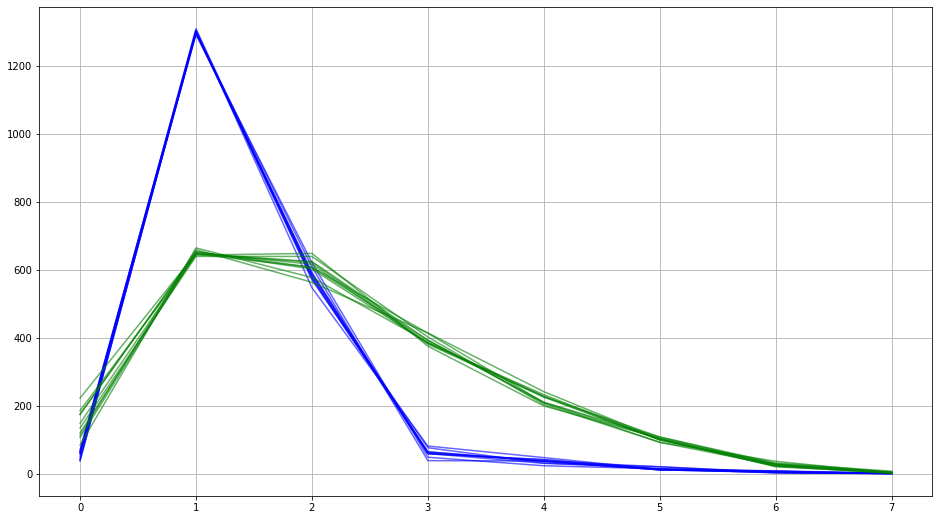

In [192]:
plt.figure(figsize = (16, 9))

for i in range(10):
    lattice_small = simulate(100, 100)
    coords = list(lattice_small.elements.keys())
    vals = list(lattice_small.elements.values())
    coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)]
    coords = np.array(coords)
   
    a = [np.max(np.sum(np.square(coords[:500]), axis=1))]
    for _ in range(10):
        if _ not in [1, 8, 9]:
            a.append(np.sum(np.array(list(lattice_small.elements.values())) == _))
    plt.plot(a, c='blue', alpha=0.6)

for i in range(10):
    lattice_small = simulate(100, 0)
    coords = list(lattice_small.elements.keys())
    vals = list(lattice_small.elements.values())
    coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)]
    coords = np.array(coords)
   
    a = [np.max(np.sum(np.square(coords[:500]), axis=1))]
    for _ in range(10):
        if _ not in [1, 8, 9]:
            a.append(np.sum(np.array(list(lattice_small.elements.values())) == _))
    plt.plot(a, c = 'green', alpha=0.6)

plt.grid();

In [222]:
lattice_small = simulate(1/1000000, 100)
len(lattice_small.elements)

2000

In [223]:
lattice_small = simulate(1/1000000, 100)
draw_lattice(lattice_small)

In [224]:
lattice_small = simulate(100, 100)
draw_lattice(lattice_small)

In [225]:
coords = list(lattice_small.elements.keys())
vals = list(lattice_small.elements.values())
coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)]
coords = np.array(coords)

In [229]:
np.max(np.sum(np.square(coords), axis=1))

99

In [68]:
%%time
lattice = simulate(1e3, 1e5, N=int(5e7))

Wall time: 41min 13s


In [69]:
for _ in range(10):
    print(_, ':',np.sum(np.array(list(lattice.elements.values())) == _))

0 : 3185649
1 : 0
2 : 111854
3 : 8435
4 : 6084
5 : 3622
6 : 2208
7 : 659
8 : 0
9 : 0


In [101]:
3185649**(1/3)

147.140640078988

In [102]:
6*147.140640078988**2

129902.20777712576

In [104]:
132862-129902

2960

In [103]:
111854+8435+6084+3622+2208+659

132862

In [41]:
for _ in range(10):
    print(_, ':',np.sum(np.array(list(lattice.elements.values())) == _))

0 : 530264
1 : 0
2 : 34966
3 : 1929
4 : 1386
5 : 865
6 : 464
7 : 110
8 : 0
9 : 0


In [48]:
for _ in range(10):
    print(_, ':',np.sum(np.array(list(lattice.elements.values())) == _))

0 : 478743
1 : 0
2 : 33536
3 : 1297
4 : 981
5 : 587
6 : 375
7 : 43
8 : 0
9 : 0


In [35]:
60*60/7*24

12342.857142857145

In [37]:
1e10

10000000000.0

In [89]:
coords = list(lattice.elements.keys())
vals = list(lattice.elements.values())
coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)]
coords = np.array(coords)

In [90]:
coords.shape

(3185649, 3)

In [1]:
import plotly.graph_objects as go
import numpy as np
import plotly

In [2]:
def draw_lattice(lattice):
    coords = list(lattice.elements.keys())
    vals = list(lattice.elements.values())
    coords = [list(coords[_]) for _ in range(len(coords)) if (vals[_] != 1)]
    import numpy as np
    coords = np.array(coords)


    #random_coords = np.exp(np.random.uniform(-6, 10, (10, 2)))
    #t = simulate_vector([0.000000001, 1000000000], N=10000)
    ttt = np.copy(coords)
    x, y, z = ttt[:, 0], ttt[:, 1], ttt[:, 2]
    #print(random_coords[0], len(set([tuple(_) for _ in list(t)])));
    fig = go.Figure(data=[go.Scatter3d(
        x=x,
        y=y,
        z=z,
        mode='markers',
        marker=dict(
            size=3,
            color=z,                # set color to an array/list of desired values
            colorscale='Viridis',   # choose a colorscale
            opacity=0.4
        )
    )])

    # tight layout
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
    plotly.offline.plot(fig, filename='phase_transition_2.html')

In [3]:
%%time
import numpy as np
np.set_printoptions(precision=3)
def simulate(aa, bb, N=2000):
    w = np.array([0, 1, 0], dtype = np.int32)
    s = np.array([0, -1, 0], dtype = np.int32)
    d = np.array([1, 0, 0], dtype = np.int32)
    a = np.array([-1, 0, 0], dtype = np.int32)
    e = np.array([0, 0, 1], dtype = np.int32)
    q = np.array([0, 0, -1], dtype = np.int32)

    class NDSparseLattice:
        def __init__(self):
            self.elements = {}

        def addValue(self, tuple, value):
            self.elements[tuple] = value

        def readValue(self, tuple):
            try:
                value = self.elements[tuple]
            except KeyError:
                # could also be 0.0 if using floats...
                value = 1
            return value

    def get_near(lattice, pos):
        n_w = lattice.readValue((pos[0], pos[1]+1, pos[2]))
        n_s = lattice.readValue((pos[0], pos[1]-1, pos[2]))
        n_d = lattice.readValue((pos[0]+1, pos[1], pos[2]))
        n_a = lattice.readValue((pos[0]-1, pos[1], pos[2]))
        n_e = lattice.readValue((pos[0], pos[1], pos[2]+1))
        n_q = lattice.readValue((pos[0], pos[1], pos[2]-1))
        return [n_w, n_s, n_d, n_a, n_e, n_q]

    def number_of_zero_neib(lattice, pos):
        if lattice.readValue((pos[0], pos[1], pos[2])) == 0:
            return 0
        else:
            count = 0
            array = get_near(lattice, pos)
            for item in array:
                if item == 0:
                    count = count+1
            return count+1

    def update_lattice(lattice, pos):
        lattice.addValue((pos[0], pos[1], pos[2]), 0)
        lattice.addValue((pos[0], pos[1]+1, pos[2]), number_of_zero_neib(lattice, pos+w))
        lattice.addValue((pos[0], pos[1]-1, pos[2]), number_of_zero_neib(lattice, pos+s))
        lattice.addValue((pos[0]+1, pos[1], pos[2]), number_of_zero_neib(lattice, pos+d))
        lattice.addValue((pos[0]-1, pos[1], pos[2]), number_of_zero_neib(lattice, pos+a))
        lattice.addValue((pos[0], pos[1], pos[2]+1), number_of_zero_neib(lattice, pos+e))
        lattice.addValue((pos[0], pos[1], pos[2]-1), number_of_zero_neib(lattice, pos+q))
        return lattice


    def weight(x, aa, bb):
        if x==0:
            return aa
        elif x==2:
            return 1
        elif x==1:
            print('Error')
            raise TypeError
        else:
            return bb

    def get_prob(lattice, pos, aa, bb):
        near = get_near(lattice, pos)
        norm = sum(near)
        probs = [weight(_, aa, bb) for _ in near]
        norm = sum(probs)
        probs_normed = [_/norm for _ in probs]
        return probs_normed

    def get_next_pos():
        symbol = np.random.choice(['w', 's', 'd', 'a', 'e', 'q'], p = get_prob(lattice, pos, aa, bb))
        if symbol == 'w':
            return w
        if symbol == 's':
            return s
        if symbol == 'd':
            return d
        if symbol == 'a':
            return a
        if symbol == 'e':
            return e
        if symbol == 'q':
            return q


    lattice = NDSparseLattice()
    pos = np.array([0,0,0], dtype=np.int32)
    lattice = update_lattice(lattice, pos)
    #visited
    
    from progressbar import ProgressBar
    pbar = ProgressBar()
    
    #for _ in pbar(range(N)):
    #    #visited.append(list(pos))
    #    pos = pos +  get_next_pos()
    #    lattice = update_lattice(lattice, pos)
    cnt = 0
    while len(lattice.elements)<N:
        pos = pos +  get_next_pos()
        lattice = update_lattice(lattice, pos)
        cnt += 1
    np.set_printoptions(precision=3)
    print(np.array([np.log(aa), np.log(bb)]), ':', cnt)
    return lattice, cnt, np.log(aa), np.log(bb)

def simulate_vector(vector, N=2000):
    return simulate(vector[0], vector[1], N=N)

Wall time: 0 ns


In [4]:
lattice_small, cnt, aa, bb = simulate_vector([1e2, 0.01], N=10000)

[ 4.605 -4.605] : 889045


In [5]:
draw_lattice(lattice_small)

In [6]:
print(cnt)

889045


In [8]:
lattice_small, cnt, aa, bb = simulate_vector([1e2, 0.01], N=10000)
draw_lattice(lattice_small)
print(cnt)

[ 4.605 -4.605] : 853986
853986


In [29]:
lattice_small, cnt, aa, bb = simulate_vector([1e2, 1e2], N=500)
draw_lattice(lattice_small)
print(cnt)

[4.605 4.605] : 7028
7028


In [30]:
lattice_small, cnt, aa, bb = simulate_vector([1e2, 1e-2], N=500)
draw_lattice(lattice_small)
print(cnt)

[ 4.605 -4.605] : 20433
20433


In [31]:
lattice_small, cnt, aa, bb = simulate_vector([1e-2, 1e2], N=500)
draw_lattice(lattice_small)
print(cnt)

[-4.605  4.605] : 252
252


In [32]:
lattice_small, cnt, aa, bb = simulate_vector([1e-2, 1e-2], N=500)
draw_lattice(lattice_small)
print(cnt)

[-4.605 -4.605] : 121
121


In [17]:
19364798/100000

193.64798

In [18]:
2773597/100000

27.73597

In [19]:
77792/100000

0.77792

In [20]:
25700/100000

0.257

In [25]:
33440797/150000

222.93864666666667

In [26]:
4627707/150000

30.85138

In [27]:
117083/150000

0.7805533333333333

In [28]:
38582/150000

0.25721333333333335

In [33]:
20433/500

40.866

In [34]:
7028/500

14.056

In [35]:
252/500

0.504

In [36]:
121/500

0.242

In [4]:
%%time
import pickle
from progressbar import ProgressBar
pbar = ProgressBar()

random_coords = np.exp(np.random.uniform(-6, 6, (20000, 2)))
np.save('data_small_1000_random_coords_20000', random_coords)

lattices = []
data_params = []
count = 0
for pair in random_coords:
    print(count, 'params:', np.log(pair))
    lattice_small, cnt, aa, bb = simulate_vector(pair, N=1000)
    lattices.append(lattice_small.elements)
    data_params.append([aa, bb, cnt])
    count += 1

import pickle
with open('data_small_1000_20000', 'wb') as f:
    pickle.dump(lattices, f)

0 params: [-4.71  -3.139]
[-4.71  -3.139] : 254
1 params: [-3.347 -3.692]
[-3.347 -3.692] : 253
2 params: [1.208 1.618]
[1.208 1.618] : 967
3 params: [-3.145  3.243]
[-3.145  3.243] : 536
4 params: [3.786 5.003]
[3.786 5.003] : 3057
5 params: [4.743 3.491]
[4.743 3.491] : 20603
6 params: [-1.383 -5.036]
[-1.383 -5.036] : 282
7 params: [ 0.313 -0.667]
[ 0.313 -0.667] : 553
8 params: [ 1.438 -3.917]
[ 1.438 -3.917] : 1152
9 params: [ 0.423 -0.759]
[ 0.423 -0.759] : 528
10 params: [-2.672 -4.184]
[-2.672 -4.184] : 267
11 params: [-2.708  3.984]
[-2.708  3.984] : 535
12 params: [-3.028 -1.84 ]
[-3.028 -1.84 ] : 255
13 params: [-4.149 -2.496]
[-4.149 -2.496] : 255
14 params: [-2.127  5.771]
[-2.127  5.771] : 563
15 params: [ 4.7   -5.387]
[ 4.7   -5.387] : 44640
16 params: [-5.488 -4.264]
[-5.488 -4.264] : 255
17 params: [-1.518  0.188]
[-1.518  0.188] : 351
18 params: [1.378 4.692]
[1.378 4.692] : 804
19 params: [ 4.983 -4.409]
[ 4.983 -4.409] : 76621
20 params: [ 2.273 -5.145]
[ 2.273 -5.

[1.248 0.176] : 1040
170 params: [-3.898 -3.536]
[-3.898 -3.536] : 255
171 params: [2.194 3.8  ]
[2.194 3.8  ] : 1831
172 params: [-0.384 -4.734]
[-0.384 -4.734] : 333
173 params: [ 0.809 -0.472]
[ 0.809 -0.472] : 798
174 params: [-5.209 -2.06 ]
[-5.209 -2.06 ] : 256
175 params: [-1.974  2.287]
[-1.974  2.287] : 502
176 params: [-2.897 -3.101]
[-2.897 -3.101] : 251
177 params: [1.339 1.449]
[1.339 1.449] : 1424
178 params: [0.285 4.185]
[0.285 4.185] : 702
179 params: [1.725 3.238]
[1.725 3.238] : 1318
180 params: [-0.669  3.909]
[-0.669  3.909] : 549
181 params: [-4.964 -4.391]
[-4.964 -4.391] : 259
182 params: [3.048 2.501]
[3.048 2.501] : 5040
183 params: [4.178 0.232]
[4.178 0.232] : 40126
184 params: [ 3.559 -5.277]
[ 3.559 -5.277] : 13199
185 params: [-1.618 -4.906]
[-1.618 -4.906] : 262
186 params: [-3.521  1.652]
[-3.521  1.652] : 447
187 params: [-5.147  3.558]
[-5.147  3.558] : 523
188 params: [0.651 5.328]
[0.651 5.328] : 733
189 params: [0.758 1.126]
[0.758 1.126] : 667
190

[ 3.018 -3.596] : 8092
337 params: [0.283 0.277]
[0.283 0.277] : 482
338 params: [ 0.306 -4.785]
[ 0.306 -4.785] : 422
339 params: [1.874 0.047]
[1.874 0.047] : 2010
340 params: [4.211 2.36 ]
[4.211 2.36 ] : 23835
341 params: [-1.323 -1.915]
[-1.323 -1.915] : 275
342 params: [-5.669  3.9  ]
[-5.669  3.9  ] : 532
343 params: [ 3.257 -1.853]
[ 3.257 -1.853] : 12584
344 params: [2.917 2.411]
[2.917 2.411] : 4920
345 params: [-4.316  2.053]
[-4.316  2.053] : 460
346 params: [3.155 4.904]
[3.155 4.904] : 2881
347 params: [-4.882 -5.476]
[-4.882 -5.476] : 247
348 params: [-3.073 -2.415]
[-3.073 -2.415] : 250
349 params: [ 4.74  -2.747]
[ 4.74  -2.747] : 50377
350 params: [-5.728  0.445]
[-5.728  0.445] : 322
351 params: [-1.887  3.967]
[-1.887  3.967] : 523
352 params: [ 2.462 -2.309]
[ 2.462 -2.309] : 3680
353 params: [ 5.335 -4.595]
[ 5.335 -4.595] : 87465
354 params: [-4.742  3.462]
[-4.742  3.462] : 530
355 params: [-5.435  0.736]
[-5.435  0.736] : 354
356 params: [ 2.896 -1.676]
[ 2.896

[ 3.458 -1.809] : 16494
504 params: [5.5   3.497]
[5.5   3.497] : 50581
505 params: [ 4.784 -3.451]
[ 4.784 -3.451] : 55830
506 params: [-5.534  5.39 ]
[-5.534  5.39 ] : 552
507 params: [-0.823  1.582]
[-0.823  1.582] : 545
508 params: [-5.868  4.874]
[-5.868  4.874] : 543
509 params: [-3.327 -0.197]
[-3.327 -0.197] : 275
510 params: [ 3.986 -1.39 ]
[ 3.986 -1.39 ] : 26779
511 params: [-5.561  4.161]
[-5.561  4.161] : 538
512 params: [4.817 3.665]
[4.817 3.665] : 19496
513 params: [-2.877  0.595]
[-2.877  0.595] : 324
514 params: [ 5.324 -5.995]
[ 5.324 -5.995] : 100065
515 params: [ 5.362 -0.926]
[ 5.362 -0.926] : 179798
516 params: [3.536 4.196]
[3.536 4.196] : 4590
517 params: [-4.259 -2.469]
[-4.259 -2.469] : 257
518 params: [-5.093 -1.768]
[-5.093 -1.768] : 272
519 params: [ 1.277 -0.048]
[ 1.277 -0.048] : 1109
520 params: [-4.314 -2.431]
[-4.314 -2.431] : 248
521 params: [5.628 5.828]
[5.628 5.828] : 17375
522 params: [ 4.467 -0.991]
[ 4.467 -0.991] : 63401
523 params: [ 4.293 -5

[ 5.893 -2.016] : 232965
670 params: [ 4.354 -5.965]
[ 4.354 -5.965] : 33439
671 params: [4.52  2.278]
[4.52  2.278] : 26474
672 params: [-0.732  1.057]
[-0.732  1.057] : 419
673 params: [5.93  2.354]
[5.93  2.354] : 134590
674 params: [3.869 0.752]
[3.869 0.752] : 37133
675 params: [0.23  2.995]
[0.23  2.995] : 666
676 params: [ 2.742 -5.456]
[ 2.742 -5.456] : 5279
677 params: [-2.026  1.079]
[-2.026  1.079] : 362
678 params: [ 2.33  -0.531]
[ 2.33  -0.531] : 5410
679 params: [-5.794 -4.361]
[-5.794 -4.361] : 250
680 params: [-2.328  4.02 ]
[-2.328  4.02 ] : 494
681 params: [-2.369  3.94 ]
[-2.369  3.94 ] : 538
682 params: [3.062 0.672]
[3.062 0.672] : 12688
683 params: [-4.542 -5.274]
[-4.542 -5.274] : 248
684 params: [4.946 2.518]
[4.946 2.518] : 39769
685 params: [-2.763  3.474]
[-2.763  3.474] : 506
686 params: [3.464 3.264]
[3.464 3.264] : 4858
687 params: [-2.809 -2.224]
[-2.809 -2.224] : 249
688 params: [-1.016 -3.305]
[-1.016 -3.305] : 299
689 params: [3.205 4.251]
[3.205 4.25

[4.895 0.431] : 141538
835 params: [1.402 4.617]
[1.402 4.617] : 847
836 params: [-1.424  1.861]
[-1.424  1.861] : 464
837 params: [-5.726  4.004]
[-5.726  4.004] : 521
838 params: [-3.84   5.837]
[-3.84   5.837] : 519
839 params: [1.527 2.898]
[1.527 2.898] : 1117
840 params: [5.322 5.895]
[5.322 5.895] : 17735
841 params: [-4.818  5.956]
[-4.818  5.956] : 532
842 params: [-4.862 -5.859]
[-4.862 -5.859] : 254
843 params: [-1.986  2.084]
[-1.986  2.084] : 491
844 params: [2.403 2.92 ]
[2.403 2.92 ] : 2762
845 params: [-5.232 -3.022]
[-5.232 -3.022] : 247
846 params: [ 3.96  -2.337]
[ 3.96  -2.337] : 27280
847 params: [-5.682 -1.994]
[-5.682 -1.994] : 254
848 params: [1.128 0.774]
[1.128 0.774] : 1254
849 params: [-2.014 -2.058]
[-2.014 -2.058] : 272
850 params: [ 4.818 -4.082]
[ 4.818 -4.082] : 47186
851 params: [-1.163  5.681]
[-1.163  5.681] : 601
852 params: [ 4.204 -1.941]
[ 4.204 -1.941] : 39295
853 params: [ 3.492 -3.406]
[ 3.492 -3.406] : 15532
854 params: [-2.587 -4.927]
[-2.58

[ 5.355 -2.634] : 87934
1000 params: [-4.195  4.854]
[-4.195  4.854] : 511
1001 params: [3.926 1.443]
[3.926 1.443] : 30921
1002 params: [-2.408  3.409]
[-2.408  3.409] : 508
1003 params: [2.372 2.942]
[2.372 2.942] : 2170
1004 params: [0.106 5.636]
[0.106 5.636] : 666
1005 params: [-4.591  0.548]
[-4.591  0.548] : 342
1006 params: [-4.521 -3.475]
[-4.521 -3.475] : 263
1007 params: [-4.821 -3.325]
[-4.821 -3.325] : 259
1008 params: [-2.417 -0.816]
[-2.417 -0.816] : 268
1009 params: [-5.949 -0.982]
[-5.949 -0.982] : 270
1010 params: [1.897 2.089]
[1.897 2.089] : 1745
1011 params: [4.443 0.02 ]
[4.443 0.02 ] : 85627
1012 params: [ 2.965 -2.138]
[ 2.965 -2.138] : 8003
1013 params: [-1.436  3.285]
[-1.436  3.285] : 541
1014 params: [-4.973  4.087]
[-4.973  4.087] : 536
1015 params: [ 4.934 -1.995]
[ 4.934 -1.995] : 99121
1016 params: [ 4.505 -4.929]
[ 4.505 -4.929] : 41941
1017 params: [4.868 5.505]
[4.868 5.505] : 12382
1018 params: [2.556 4.283]
[2.556 4.283] : 1593
1019 params: [-2.48  

[ 3.57  -3.017] : 17426
1163 params: [-4.918 -0.108]
[-4.918 -0.108] : 281
1164 params: [ 0.584 -2.569]
[ 0.584 -2.569] : 566
1165 params: [-3.247  4.927]
[-3.247  4.927] : 524
1166 params: [ 4.563 -2.574]
[ 4.563 -2.574] : 63382
1167 params: [ 2.683 -5.758]
[ 2.683 -5.758] : 4545
1168 params: [1.745 2.296]
[1.745 2.296] : 1689
1169 params: [2.878 3.269]
[2.878 3.269] : 2558
1170 params: [-0.012 -4.442]
[-0.012 -4.442] : 350
1171 params: [ 4.002 -2.86 ]
[ 4.002 -2.86 ] : 21597
1172 params: [ 2.773 -1.07 ]
[ 2.773 -1.07 ] : 8753
1173 params: [ 0.146 -5.054]
[ 0.146 -5.054] : 424
1174 params: [ 4.294 -4.656]
[ 4.294 -4.656] : 33928
1175 params: [4.653 4.713]
[4.653 4.713] : 9382
1176 params: [-5.618  3.56 ]
[-5.618  3.56 ] : 537
1177 params: [3.487 2.267]
[3.487 2.267] : 10080
1178 params: [-0.911 -2.173]
[-0.911 -2.173] : 300
1179 params: [-4.267 -4.854]
[-4.267 -4.854] : 243
1180 params: [ 1.781 -3.2  ]
[ 1.781 -3.2  ] : 2072
1181 params: [-5.489 -0.141]
[-5.489 -0.141] : 295
1182 para

[ 5.828 -1.128] : 218597
1325 params: [-3.423  2.844]
[-3.423  2.844] : 498
1326 params: [-5.347  4.294]
[-5.347  4.294] : 564
1327 params: [ 3.527 -3.593]
[ 3.527 -3.593] : 11259
1328 params: [-1.433 -0.406]
[-1.433 -0.406] : 329
1329 params: [-1.403  3.206]
[-1.403  3.206] : 552
1330 params: [ 1.475 -3.786]
[ 1.475 -3.786] : 1258
1331 params: [ 1.663 -3.837]
[ 1.663 -3.837] : 1098
1332 params: [ 3.88  -1.679]
[ 3.88  -1.679] : 28052
1333 params: [-0.312  1.623]
[-0.312  1.623] : 548
1334 params: [-4.055  0.734]
[-4.055  0.734] : 336
1335 params: [-4.167 -1.751]
[-4.167 -1.751] : 252
1336 params: [ 3.631 -1.704]
[ 3.631 -1.704] : 18796
1337 params: [0.927 0.768]
[0.927 0.768] : 966
1338 params: [-4.201 -5.198]
[-4.201 -5.198] : 259
1339 params: [-3.685 -0.476]
[-3.685 -0.476] : 262
1340 params: [-1.508  1.982]
[-1.508  1.982] : 508
1341 params: [-1.315 -0.764]
[-1.315 -0.764] : 336
1342 params: [3.238 4.766]
[3.238 4.766] : 2768
1343 params: [-4.443  1.618]
[-4.443  1.618] : 476
1344 

[5.467 2.858] : 67161
1487 params: [-2.114 -5.073]
[-2.114 -5.073] : 257
1488 params: [1.298 2.969]
[1.298 2.969] : 1041
1489 params: [0.634 2.027]
[0.634 2.027] : 705
1490 params: [4.801 0.869]
[4.801 0.869] : 87168
1491 params: [-4.201  1.854]
[-4.201  1.854] : 444
1492 params: [ 4.213 -3.76 ]
[ 4.213 -3.76 ] : 27988
1493 params: [2.271 0.071]
[2.271 0.071] : 4111
1494 params: [ 5.171 -2.884]
[ 5.171 -2.884] : 71388
1495 params: [-3.038 -3.777]
[-3.038 -3.777] : 263
1496 params: [4.284 1.125]
[4.284 1.125] : 50275
1497 params: [-4.529 -5.721]
[-4.529 -5.721] : 254
1498 params: [-5.    -5.591]
[-5.    -5.591] : 249
1499 params: [-5.957 -3.269]
[-5.957 -3.269] : 249
1500 params: [ 1.228 -1.958]
[ 1.228 -1.958] : 923
1501 params: [ 0.332 -5.567]
[ 0.332 -5.567] : 391
1502 params: [-3.537  0.79 ]
[-3.537  0.79 ] : 353
1503 params: [3.521 5.42 ]
[3.521 5.42 ] : 3223
1504 params: [-4.016 -3.55 ]
[-4.016 -3.55 ] : 249
1505 params: [5.342 0.854]
[5.342 0.854] : 145040
1506 params: [5.008 2.6

[-3.33   3.505] : 556
1650 params: [3.168 0.614]
[3.168 0.614] : 16408
1651 params: [3.517 1.394]
[3.517 1.394] : 16868
1652 params: [ 3.694 -3.647]
[ 3.694 -3.647] : 18135
1653 params: [ 3.683 -4.506]
[ 3.683 -4.506] : 17167
1654 params: [-1.733 -1.378]
[-1.733 -1.378] : 274
1655 params: [-5.465 -1.427]
[-5.465 -1.427] : 270
1656 params: [ 0.122 -3.941]
[ 0.122 -3.941] : 385
1657 params: [-1.147  2.825]
[-1.147  2.825] : 557
1658 params: [-0.048  2.553]
[-0.048  2.553] : 578
1659 params: [-2.208  3.231]
[-2.208  3.231] : 497
1660 params: [-5.742 -4.024]
[-5.742 -4.024] : 248
1661 params: [ 4.236 -1.615]
[ 4.236 -1.615] : 49390
1662 params: [-3.966 -3.838]
[-3.966 -3.838] : 247
1663 params: [-1.068 -2.613]
[-1.068 -2.613] : 279
1664 params: [1.291 4.062]
[1.291 4.062] : 882
1665 params: [-4.617  2.398]
[-4.617  2.398] : 488
1666 params: [-3.917 -1.959]
[-3.917 -1.959] : 271
1667 params: [ 1.569 -2.154]
[ 1.569 -2.154] : 1219
1668 params: [ 4.155 -3.266]
[ 4.155 -3.266] : 28413
1669 par

[-0.529 -1.864] : 309
1812 params: [-3.137 -1.4  ]
[-3.137 -1.4  ] : 267
1813 params: [-3.963 -2.252]
[-3.963 -2.252] : 254
1814 params: [-4.964  4.878]
[-4.964  4.878] : 531
1815 params: [-5.218  1.007]
[-5.218  1.007] : 404
1816 params: [-3.866 -1.264]
[-3.866 -1.264] : 263
1817 params: [-1.313  4.901]
[-1.313  4.901] : 562
1818 params: [-0.355  3.132]
[-0.355  3.132] : 594
1819 params: [ 2.75  -4.469]
[ 2.75  -4.469] : 4753
1820 params: [-2.18   0.983]
[-2.18   0.983] : 326
1821 params: [-0.479  0.839]
[-0.479  0.839] : 426
1822 params: [-3.549 -4.805]
[-3.549 -4.805] : 254
1823 params: [ 2.724 -3.415]
[ 2.724 -3.415] : 5004
1824 params: [-0.805 -2.614]
[-0.805 -2.614] : 321
1825 params: [4.594 2.415]
[4.594 2.415] : 35227
1826 params: [-2.307  2.319]
[-2.307  2.319] : 465
1827 params: [-0.647 -5.12 ]
[-0.647 -5.12 ] : 326
1828 params: [ 1.19  -4.362]
[ 1.19  -4.362] : 1053
1829 params: [-1.62   4.475]
[-1.62   4.475] : 556
1830 params: [2.164 3.983]
[2.164 3.983] : 1116
1831 params

[ 3.203 -4.81 ] : 8513
1978 params: [ 4.361 -5.269]
[ 4.361 -5.269] : 39940
1979 params: [-5.44  -3.693]
[-5.44  -3.693] : 253
1980 params: [ 5.029 -2.324]
[ 5.029 -2.324] : 98098
1981 params: [ 0.193 -5.055]
[ 0.193 -5.055] : 385
1982 params: [-4.657 -3.215]
[-4.657 -3.215] : 254
1983 params: [-3.102  2.515]
[-3.102  2.515] : 449
1984 params: [ 2.147 -4.844]
[ 2.147 -4.844] : 3168
1985 params: [-1.644 -2.139]
[-1.644 -2.139] : 286
1986 params: [-1.977  2.016]
[-1.977  2.016] : 471
1987 params: [5.535 5.182]
[5.535 5.182] : 25298
1988 params: [4.154 5.804]
[4.154 5.804] : 6995
1989 params: [-0.946  1.361]
[-0.946  1.361] : 365
1990 params: [5.699 4.285]
[5.699 4.285] : 34352
1991 params: [ 3.265 -3.378]
[ 3.265 -3.378] : 11692
1992 params: [3.716 3.212]
[3.716 3.212] : 7444
1993 params: [-0.098  5.408]
[-0.098  5.408] : 626
1994 params: [-4.334  3.57 ]
[-4.334  3.57 ] : 514
1995 params: [ 0.602 -4.12 ]
[ 0.602 -4.12 ] : 495
1996 params: [0.112 4.594]
[0.112 4.594] : 660
1997 params: [-

[ 0.75  -0.886] : 661
2142 params: [-3.249  4.236]
[-3.249  4.236] : 562
2143 params: [4.077 1.498]
[4.077 1.498] : 33051
2144 params: [ 3.613 -5.044]
[ 3.613 -5.044] : 13687
2145 params: [3.498 4.446]
[3.498 4.446] : 3279
2146 params: [-4.61  -5.054]
[-4.61  -5.054] : 260
2147 params: [-3.06  -5.296]
[-3.06  -5.296] : 260
2148 params: [-1.267  5.524]
[-1.267  5.524] : 557
2149 params: [ 4.813 -5.628]
[ 4.813 -5.628] : 48758
2150 params: [3.787 2.256]
[3.787 2.256] : 13795
2151 params: [-1.344  2.616]
[-1.344  2.616] : 486
2152 params: [-5.174  0.275]
[-5.174  0.275] : 317
2153 params: [-5.941 -0.151]
[-5.941 -0.151] : 302
2154 params: [-1.208  0.71 ]
[-1.208  0.71 ] : 395
2155 params: [-2.401 -4.341]
[-2.401 -4.341] : 269
2156 params: [2.254 5.999]
[2.254 5.999] : 1055
2157 params: [ 0.178 -1.658]
[ 0.178 -1.658] : 445
2158 params: [2.487 5.335]
[2.487 5.335] : 1703
2159 params: [-3.737  3.89 ]
[-3.737  3.89 ] : 518
2160 params: [ 4.073 -1.142]
[ 4.073 -1.142] : 34107
2161 params: [-3

[2.608 3.773] : 2054
2306 params: [ 0.256 -0.627]
[ 0.256 -0.627] : 454
2307 params: [ 0.33 -3.84]
[ 0.33 -3.84] : 464
2308 params: [-1.017  5.007]
[-1.017  5.007] : 640
2309 params: [-5.011  2.546]
[-5.011  2.546] : 501
2310 params: [-1.526 -5.022]
[-1.526 -5.022] : 270
2311 params: [3.334 4.78 ]
[3.334 4.78 ] : 2489
2312 params: [-5.744  5.162]
[-5.744  5.162] : 559
2313 params: [-2.177 -0.921]
[-2.177 -0.921] : 280
2314 params: [ 0.415 -4.186]
[ 0.415 -4.186] : 500
2315 params: [0.879 1.209]
[0.879 1.209] : 1034
2316 params: [-5.927  2.207]
[-5.927  2.207] : 474
2317 params: [-1.545 -4.633]
[-1.545 -4.633] : 269
2318 params: [4.083 1.115]
[4.083 1.115] : 35250
2319 params: [ 4.004 -0.752]
[ 4.004 -0.752] : 44318
2320 params: [ 1.936 -0.345]
[ 1.936 -0.345] : 2759
2321 params: [-1.031 -3.279]
[-1.031 -3.279] : 281
2322 params: [-3.505 -3.568]
[-3.505 -3.568] : 274
2323 params: [ 0.356 -4.119]
[ 0.356 -4.119] : 502
2324 params: [ 1.784 -0.276]
[ 1.784 -0.276] : 2189
2325 params: [1.99

[1.753 5.592] : 1103
2470 params: [0.488 0.927]
[0.488 0.927] : 734
2471 params: [-3.157  0.7  ]
[-3.157  0.7  ] : 384
2472 params: [-2.647 -1.946]
[-2.647 -1.946] : 247
2473 params: [ 5.319 -3.138]
[ 5.319 -3.138] : 106366
2474 params: [-3.782 -2.23 ]
[-3.782 -2.23 ] : 265
2475 params: [3.662 4.332]
[3.662 4.332] : 3929
2476 params: [2.99 4.12]
[2.99 4.12] : 2737
2477 params: [-2.474  4.388]
[-2.474  4.388] : 527
2478 params: [ 1.602 -3.806]
[ 1.602 -3.806] : 1121
2479 params: [-1.661  3.978]
[-1.661  3.978] : 592
2480 params: [3.463 0.605]
[3.463 0.605] : 26549
2481 params: [-5.265 -3.232]
[-5.265 -3.232] : 247
2482 params: [ 5.271 -0.317]
[ 5.271 -0.317] : 197461
2483 params: [-2.063 -2.299]
[-2.063 -2.299] : 275
2484 params: [-1.096  4.206]
[-1.096  4.206] : 549
2485 params: [-1.01   2.403]
[-1.01   2.403] : 515
2486 params: [5.379 2.46 ]
[5.379 2.46 ] : 69500
2487 params: [-3.508  4.191]
[-3.508  4.191] : 567
2488 params: [-3.606  2.424]
[-3.606  2.424] : 427
2489 params: [-4.37  

[-3.325  0.754] : 342
2633 params: [5.868 0.522]
[5.868 0.522] : 330435
2634 params: [1.322 5.414]
[1.322 5.414] : 877
2635 params: [-3.955  4.166]
[-3.955  4.166] : 536
2636 params: [-5.187  0.568]
[-5.187  0.568] : 343
2637 params: [-5.018  2.045]
[-5.018  2.045] : 414
2638 params: [ 5.489 -3.994]
[ 5.489 -3.994] : 113647
2639 params: [0.658 1.4  ]
[0.658 1.4  ] : 759
2640 params: [-2.675  3.196]
[-2.675  3.196] : 533
2641 params: [ 2.661 -3.61 ]
[ 2.661 -3.61 ] : 6977
2642 params: [1.007 3.395]
[1.007 3.395] : 819
2643 params: [-1.518 -0.59 ]
[-1.518 -0.59 ] : 305
2644 params: [-5.709  4.677]
[-5.709  4.677] : 511
2645 params: [ 1.565 -3.276]
[ 1.565 -3.276] : 1615
2646 params: [-1.681  0.531]
[-1.681  0.531] : 333
2647 params: [-3.94  -1.021]
[-3.94  -1.021] : 273
2648 params: [-3.832 -0.129]
[-3.832 -0.129] : 291
2649 params: [-3.773  4.338]
[-3.773  4.338] : 567
2650 params: [5.728 1.048]
[5.728 1.048] : 269749
2651 params: [3.296 1.066]
[3.296 1.066] : 14775
2652 params: [1.862 

[ 3.337 -5.343] : 10087
2797 params: [ 1.276 -0.736]
[ 1.276 -0.736] : 939
2798 params: [4.826 0.033]
[4.826 0.033] : 93134
2799 params: [-1.272  5.059]
[-1.272  5.059] : 582
2800 params: [ 2.211 -5.844]
[ 2.211 -5.844] : 2398
2801 params: [-1.108 -0.502]
[-1.108 -0.502] : 322
2802 params: [3.232 3.836]
[3.232 3.836] : 3672
2803 params: [5.433 0.268]
[5.433 0.268] : 202187
2804 params: [ 0.7  -5.18]
[ 0.7  -5.18] : 549
2805 params: [-4.223 -5.656]
[-4.223 -5.656] : 259
2806 params: [-4.456  5.317]
[-4.456  5.317] : 540
2807 params: [3.932 4.578]
[3.932 4.578] : 5432
2808 params: [1.131 0.733]
[1.131 0.733] : 932
2809 params: [1.894 2.14 ]
[1.894 2.14 ] : 2438
2810 params: [-2.581 -2.924]
[-2.581 -2.924] : 267
2811 params: [-0.323  1.371]
[-0.323  1.371] : 504
2812 params: [-0.338 -2.965]
[-0.338 -2.965] : 314
2813 params: [-3.427  3.763]
[-3.427  3.763] : 473
2814 params: [-2.703  2.356]
[-2.703  2.356] : 479
2815 params: [-4.597 -3.54 ]
[-4.597 -3.54 ] : 246
2816 params: [-5.931  2.05

[4.074 3.803] : 7740
2960 params: [-4.66  -4.264]
[-4.66  -4.264] : 248
2961 params: [-4.02  -0.418]
[-4.02  -0.418] : 290
2962 params: [-3.137  3.569]
[-3.137  3.569] : 496
2963 params: [-2.826 -2.747]
[-2.826 -2.747] : 263
2964 params: [ 5.803 -0.971]
[ 5.803 -0.971] : 260441
2965 params: [ 1.48  -0.992]
[ 1.48  -0.992] : 1168
2966 params: [-5.074 -1.728]
[-5.074 -1.728] : 251
2967 params: [-5.173  4.615]
[-5.173  4.615] : 540
2968 params: [-0.094  2.564]
[-0.094  2.564] : 597
2969 params: [-2.803 -5.876]
[-2.803 -5.876] : 253
2970 params: [-4.363  0.2  ]
[-4.363  0.2  ] : 312
2971 params: [-5.004 -3.941]
[-5.004 -3.941] : 251
2972 params: [-1.26  -0.233]
[-1.26  -0.233] : 309
2973 params: [ 3.407 -5.927]
[ 3.407 -5.927] : 13028
2974 params: [-1.347  5.276]
[-1.347  5.276] : 573
2975 params: [1.628 5.357]
[1.628 5.357] : 874
2976 params: [-4.064  3.092]
[-4.064  3.092] : 510
2977 params: [4.888 4.008]
[4.888 4.008] : 19526
2978 params: [-2.374  3.174]
[-2.374  3.174] : 508
2979 param

[ 0.354 -5.317] : 475
3125 params: [-0.701 -0.669]
[-0.701 -0.669] : 318
3126 params: [5.498 1.588]
[5.498 1.588] : 121492
3127 params: [-4.761  3.554]
[-4.761  3.554] : 454
3128 params: [-5.11 -3.68]
[-5.11 -3.68] : 242
3129 params: [ 2.341 -1.261]
[ 2.341 -1.261] : 4771
3130 params: [ 2.079 -2.313]
[ 2.079 -2.313] : 2353
3131 params: [-0.615 -3.406]
[-0.615 -3.406] : 336
3132 params: [-2.352  4.438]
[-2.352  4.438] : 549
3133 params: [ 5.796 -4.746]
[ 5.796 -4.746] : 137341
3134 params: [ 0.327 -4.742]
[ 0.327 -4.742] : 446
3135 params: [1.851 2.416]
[1.851 2.416] : 1723
3136 params: [-1.011 -2.087]
[-1.011 -2.087] : 286
3137 params: [0.88 3.8 ]
[0.88 3.8 ] : 724
3138 params: [ 1.893 -3.736]
[ 1.893 -3.736] : 1692
3139 params: [-3.793 -5.449]
[-3.793 -5.449] : 260
3140 params: [-0.069 -4.867]
[-0.069 -4.867] : 355
3141 params: [ 5.96  -2.924]
[ 5.96  -2.924] : 230170
3142 params: [3.037 1.327]
[3.037 1.327] : 9405
3143 params: [-4.619  0.177]
[-4.619  0.177] : 290
3144 params: [-0.35

[3.943 4.037] : 6479
3287 params: [1.674 5.746]
[1.674 5.746] : 1067
3288 params: [ 3.357 -3.692]
[ 3.357 -3.692] : 12549
3289 params: [1.409 1.628]
[1.409 1.628] : 1645
3290 params: [-2.513 -4.341]
[-2.513 -4.341] : 265
3291 params: [ 0.406 -3.901]
[ 0.406 -3.901] : 467
3292 params: [-2.017 -1.77 ]
[-2.017 -1.77 ] : 260
3293 params: [2.222 5.168]
[2.222 5.168] : 1330
3294 params: [1.089 1.494]
[1.089 1.494] : 1097
3295 params: [-3.152  1.094]
[-3.152  1.094] : 366
3296 params: [-2.462  3.74 ]
[-2.462  3.74 ] : 526
3297 params: [5.677 0.017]
[5.677 0.017] : 273841
3298 params: [-1.312 -4.167]
[-1.312 -4.167] : 272
3299 params: [ 3.445 -1.166]
[ 3.445 -1.166] : 19011
3300 params: [ 0.217 -3.092]
[ 0.217 -3.092] : 429
3301 params: [-4.358  1.034]
[-4.358  1.034] : 408
3302 params: [ 5.458 -5.451]
[ 5.458 -5.451] : 101013
3303 params: [-4.574  3.37 ]
[-4.574  3.37 ] : 517
3304 params: [-3.875  1.725]
[-3.875  1.725] : 403
3305 params: [1.628 1.531]
[1.628 1.531] : 2237
3306 params: [-1.29

[ 3.361 -5.15 ] : 10332
3454 params: [ 4.636 -5.745]
[ 4.636 -5.745] : 41402
3455 params: [ 0.461 -5.445]
[ 0.461 -5.445] : 487
3456 params: [-4.512 -4.679]
[-4.512 -4.679] : 240
3457 params: [2.918 3.964]
[2.918 3.964] : 2263
3458 params: [3.678 2.318]
[3.678 2.318] : 11741
3459 params: [3.993 2.562]
[3.993 2.562] : 16366
3460 params: [-3.433  3.521]
[-3.433  3.521] : 545
3461 params: [-5.061  0.179]
[-5.061  0.179] : 302
3462 params: [-0.151 -2.454]
[-0.151 -2.454] : 332
3463 params: [-0.11  -3.881]
[-0.11  -3.881] : 349
3464 params: [-0.147 -1.306]
[-0.147 -1.306] : 430
3465 params: [-3.36  -3.843]
[-3.36  -3.843] : 263
3466 params: [-5.744  3.89 ]
[-5.744  3.89 ] : 541
3467 params: [ 3.338 -4.935]
[ 3.338 -4.935] : 9560
3468 params: [-2.548 -5.368]
[-2.548 -5.368] : 268
3469 params: [-1.709  2.844]
[-1.709  2.844] : 489
3470 params: [5.718 3.553]
[5.718 3.553] : 52527
3471 params: [4.861 1.256]
[4.861 1.256] : 87995
3472 params: [-1.394 -5.327]
[-1.394 -5.327] : 256
3473 params: [ 

[ 2.756 -0.333] : 7251
3617 params: [1.651 2.489]
[1.651 2.489] : 1197
3618 params: [ 4.675 -0.757]
[ 4.675 -0.757] : 109766
3619 params: [-2.471 -4.604]
[-2.471 -4.604] : 256
3620 params: [ 1.829 -0.328]
[ 1.829 -0.328] : 2533
3621 params: [2.341 5.834]
[2.341 5.834] : 1199
3622 params: [-2.422  3.166]
[-2.422  3.166] : 528
3623 params: [1.184 3.329]
[1.184 3.329] : 958
3624 params: [4.659 1.09 ]
[4.659 1.09 ] : 69590
3625 params: [-0.414 -5.639]
[-0.414 -5.639] : 343
3626 params: [-0.348 -3.203]
[-0.348 -3.203] : 327
3627 params: [ 2.472 -5.457]
[ 2.472 -5.457] : 2782
3628 params: [-0.652  5.621]
[-0.652  5.621] : 626
3629 params: [ 1.095 -2.223]
[ 1.095 -2.223] : 733
3630 params: [-1.158  0.717]
[-1.158  0.717] : 367
3631 params: [2.997 3.122]
[2.997 3.122] : 3933
3632 params: [-1.039 -1.51 ]
[-1.039 -1.51 ] : 306
3633 params: [-0.821  4.522]
[-0.821  4.522] : 588
3634 params: [ 2.849 -3.066]
[ 2.849 -3.066] : 7602
3635 params: [3.219 4.076]
[3.219 4.076] : 3685
3636 params: [-4.685

[ 4.509 -5.874] : 38721
3779 params: [-1.299  2.516]
[-1.299  2.516] : 554
3780 params: [-0.815 -0.582]
[-0.815 -0.582] : 290
3781 params: [0.635 4.752]
[0.635 4.752] : 748
3782 params: [-0.889  2.359]
[-0.889  2.359] : 606
3783 params: [0.853 4.576]
[0.853 4.576] : 750
3784 params: [ 4.016 -5.142]
[ 4.016 -5.142] : 21941
3785 params: [-1.514  2.896]
[-1.514  2.896] : 571
3786 params: [-0.91   3.269]
[-0.91   3.269] : 576
3787 params: [-2.374  5.717]
[-2.374  5.717] : 517
3788 params: [ 2.154 -1.271]
[ 2.154 -1.271] : 3206
3789 params: [ 2.419 -2.742]
[ 2.419 -2.742] : 3419
3790 params: [0.461 3.538]
[0.461 3.538] : 659
3791 params: [ 0.66  -4.511]
[ 0.66  -4.511] : 593
3792 params: [ 2.847 -3.72 ]
[ 2.847 -3.72 ] : 5581
3793 params: [-3.724 -2.596]
[-3.724 -2.596] : 246
3794 params: [-1.222  1.723]
[-1.222  1.723] : 416
3795 params: [ 4.365 -3.236]
[ 4.365 -3.236] : 38128
3796 params: [-0.871  2.211]
[-0.871  2.211] : 508
3797 params: [2.891 2.832]
[2.891 2.832] : 3842
3798 params: [ 

[3.927 1.34 ] : 26422
3944 params: [-3.938  4.194]
[-3.938  4.194] : 553
3945 params: [ 4.291 -0.164]
[ 4.291 -0.164] : 69146
3946 params: [ 3.715 -0.856]
[ 3.715 -0.856] : 25160
3947 params: [4.323 2.244]
[4.323 2.244] : 29200
3948 params: [-3.424  2.976]
[-3.424  2.976] : 507
3949 params: [-3.635  1.101]
[-3.635  1.101] : 408
3950 params: [ 0.23  -5.112]
[ 0.23  -5.112] : 402
3951 params: [ 4.575 -4.079]
[ 4.575 -4.079] : 43805
3952 params: [-1.426 -1.373]
[-1.426 -1.373] : 287
3953 params: [5.462 3.684]
[5.462 3.684] : 38893
3954 params: [-4.54  -5.107]
[-4.54  -5.107] : 253
3955 params: [-3.584  3.841]
[-3.584  3.841] : 503
3956 params: [ 3.616 -4.788]
[ 3.616 -4.788] : 14574
3957 params: [1.12 5.7 ]
[1.12 5.7 ] : 899
3958 params: [-4.284  3.06 ]
[-4.284  3.06 ] : 514
3959 params: [-3.694  2.717]
[-3.694  2.717] : 450
3960 params: [ 2.677 -3.618]
[ 2.677 -3.618] : 4575
3961 params: [-0.199 -3.446]
[-0.199 -3.446] : 345
3962 params: [ 4.911 -2.432]
[ 4.911 -2.432] : 93996
3963 param

[ 1.004 -5.008] : 825
4108 params: [-1.079 -0.219]
[-1.079 -0.219] : 321
4109 params: [0.995 4.169]
[0.995 4.169] : 860
4110 params: [-0.266 -0.068]
[-0.266 -0.068] : 377
4111 params: [5.067 0.625]
[5.067 0.625] : 132774
4112 params: [0.865 0.927]
[0.865 0.927] : 933
4113 params: [2.301 3.151]
[2.301 3.151] : 1646
4114 params: [-0.405  4.855]
[-0.405  4.855] : 534
4115 params: [-3.855  5.888]
[-3.855  5.888] : 563
4116 params: [0.625 0.256]
[0.625 0.256] : 626
4117 params: [ 1.051 -2.836]
[ 1.051 -2.836] : 773
4118 params: [ 0.956 -5.249]
[ 0.956 -5.249] : 615
4119 params: [4.965 4.08 ]
[4.965 4.08 ] : 22971
4120 params: [4.267 0.545]
[4.267 0.545] : 60917
4121 params: [-1.923  3.54 ]
[-1.923  3.54 ] : 553
4122 params: [ 1.384 -4.14 ]
[ 1.384 -4.14 ] : 1154
4123 params: [-5.459 -1.789]
[-5.459 -1.789] : 244
4124 params: [-3.762  2.356]
[-3.762  2.356] : 442
4125 params: [-0.718  0.109]
[-0.718  0.109] : 338
4126 params: [-1.096 -2.414]
[-1.096 -2.414] : 286
4127 params: [-3.738  4.155]

[4.439 2.63 ] : 27179
4275 params: [-5.949 -4.56 ]
[-5.949 -4.56 ] : 244
4276 params: [ 2.313 -1.625]
[ 2.313 -1.625] : 3784
4277 params: [-4.823  4.699]
[-4.823  4.699] : 538
4278 params: [ 2.129 -3.004]
[ 2.129 -3.004] : 3367
4279 params: [-3.801 -2.649]
[-3.801 -2.649] : 255
4280 params: [-0.118  4.914]
[-0.118  4.914] : 639
4281 params: [-2.257  2.407]
[-2.257  2.407] : 485
4282 params: [ 3.074 -2.598]
[ 3.074 -2.598] : 9659
4283 params: [-5.385 -3.211]
[-5.385 -3.211] : 262
4284 params: [ 4.16  -3.312]
[ 4.16  -3.312] : 33791
4285 params: [-1.797 -0.552]
[-1.797 -0.552] : 306
4286 params: [ 1.557 -4.833]
[ 1.557 -4.833] : 1193
4287 params: [ 2.923 -5.938]
[ 2.923 -5.938] : 6855
4288 params: [-3.365 -5.794]
[-3.365 -5.794] : 251
4289 params: [-2.438  2.643]
[-2.438  2.643] : 518
4290 params: [ 0.432 -1.952]
[ 0.432 -1.952] : 421
4291 params: [2.359 3.334]
[2.359 3.334] : 1961
4292 params: [-0.043 -4.936]
[-0.043 -4.936] : 339
4293 params: [-0.476  0.531]
[-0.476  0.531] : 462
4294 

[4.177 3.824] : 11476
4438 params: [ 3.02  -4.168]
[ 3.02  -4.168] : 7522
4439 params: [-4.225 -1.578]
[-4.225 -1.578] : 268
4440 params: [-5.585  0.594]
[-5.585  0.594] : 299
4441 params: [-3.435 -1.508]
[-3.435 -1.508] : 266
4442 params: [ 4.697 -0.909]
[ 4.697 -0.909] : 92190
4443 params: [ 0.321 -5.568]
[ 0.321 -5.568] : 405
4444 params: [0.31  0.907]
[0.31  0.907] : 561
4445 params: [-4.485 -5.787]
[-4.485 -5.787] : 253
4446 params: [ 5.105 -2.988]
[ 5.105 -2.988] : 87689
4447 params: [ 3.259 -3.895]
[ 3.259 -3.895] : 9674
4448 params: [0.111 1.814]
[0.111 1.814] : 559
4449 params: [-5.889  0.402]
[-5.889  0.402] : 300
4450 params: [-0.046 -5.671]
[-0.046 -5.671] : 350
4451 params: [0.204 5.123]
[0.204 5.123] : 683
4452 params: [-1.313  1.691]
[-1.313  1.691] : 419
4453 params: [-2.696  4.008]
[-2.696  4.008] : 521
4454 params: [1.976 0.974]
[1.976 0.974] : 4661
4455 params: [ 0.887 -1.381]
[ 0.887 -1.381] : 658
4456 params: [-5.542  4.068]
[-5.542  4.068] : 569
4457 params: [-2.2

[1.612 0.416] : 1895
4602 params: [ 1.824 -2.031]
[ 1.824 -2.031] : 2031
4603 params: [5.477 5.354]
[5.477 5.354] : 22422
4604 params: [2.913 5.361]
[2.913 5.361] : 1605
4605 params: [-2.98   0.976]
[-2.98   0.976] : 339
4606 params: [-3.15  1.2 ]
[-3.15  1.2 ] : 357
4607 params: [2.209 5.07 ]
[2.209 5.07 ] : 1271
4608 params: [-2.728  4.105]
[-2.728  4.105] : 566
4609 params: [-3.166  5.899]
[-3.166  5.899] : 531
4610 params: [4.716 1.595]
[4.716 1.595] : 59593
4611 params: [ 4.578 -1.176]
[ 4.578 -1.176] : 59887
4612 params: [-2.325  3.734]
[-2.325  3.734] : 537
4613 params: [-5.428 -0.038]
[-5.428 -0.038] : 299
4614 params: [-0.194  1.865]
[-0.194  1.865] : 596
4615 params: [-1.416 -4.679]
[-1.416 -4.679] : 266
4616 params: [1.977 0.423]
[1.977 0.423] : 2773
4617 params: [ 5.216 -3.472]
[ 5.216 -3.472] : 119526
4618 params: [2.041 3.426]
[2.041 3.426] : 1559
4619 params: [1.993 3.758]
[1.993 3.758] : 1314
4620 params: [-5.303 -2.816]
[-5.303 -2.816] : 257
4621 params: [4.061 5.783]


[4.691 2.438] : 37940
4765 params: [-1.401  2.067]
[-1.401  2.067] : 464
4766 params: [4.326 4.339]
[4.326 4.339] : 7987
4767 params: [-2.495 -3.093]
[-2.495 -3.093] : 259
4768 params: [-0.634 -2.825]
[-0.634 -2.825] : 325
4769 params: [3.946 2.565]
[3.946 2.565] : 16000
4770 params: [-2.841  0.865]
[-2.841  0.865] : 338
4771 params: [1.491 1.139]
[1.491 1.139] : 1673
4772 params: [-2.929 -5.028]
[-2.929 -5.028] : 255
4773 params: [ 2.752 -5.637]
[ 2.752 -5.637] : 6207
4774 params: [ 3.32  -1.955]
[ 3.32  -1.955] : 11186
4775 params: [-2.688 -3.348]
[-2.688 -3.348] : 259
4776 params: [-3.76  -2.302]
[-3.76  -2.302] : 264
4777 params: [5.158 4.678]
[5.158 4.678] : 21845
4778 params: [-2.249  5.569]
[-2.249  5.569] : 564
4779 params: [1.268 0.126]
[1.268 0.126] : 1474
4780 params: [-5.995  1.864]
[-5.995  1.864] : 441
4781 params: [-0.784  1.85 ]
[-0.784  1.85 ] : 499
4782 params: [-4.836 -2.499]
[-4.836 -2.499] : 265
4783 params: [2.591 4.043]
[2.591 4.043] : 1899
4784 params: [ 1.328 -

[-4.249 -3.112] : 269
4928 params: [-4.    -0.919]
[-4.    -0.919] : 266
4929 params: [ 0.284 -2.171]
[ 0.284 -2.171] : 440
4930 params: [1.174 5.067]
[1.174 5.067] : 906
4931 params: [ 1.388 -3.952]
[ 1.388 -3.952] : 875
4932 params: [-4.448  2.27 ]
[-4.448  2.27 ] : 477
4933 params: [ 3.33  -3.246]
[ 3.33  -3.246] : 12626
4934 params: [3.138 4.407]
[3.138 4.407] : 2774
4935 params: [ 5.947 -4.807]
[ 5.947 -4.807] : 204395
4936 params: [ 1.973 -3.649]
[ 1.973 -3.649] : 2303
4937 params: [-5.791  3.538]
[-5.791  3.538] : 513
4938 params: [-3.747  1.334]
[-3.747  1.334] : 375
4939 params: [ 5.482 -0.822]
[ 5.482 -0.822] : 222543
4940 params: [ 3.538 -1.936]
[ 3.538 -1.936] : 19774
4941 params: [3.406 3.829]
[3.406 3.829] : 3935
4942 params: [-2.382 -2.182]
[-2.382 -2.182] : 259
4943 params: [-5.676 -0.153]
[-5.676 -0.153] : 311
4944 params: [-2.403  0.135]
[-2.403  0.135] : 304
4945 params: [-2.082 -1.754]
[-2.082 -1.754] : 278
4946 params: [-2.733  3.05 ]
[-2.733  3.05 ] : 587
4947 par

[4.839 0.812] : 94356
5091 params: [ 4.875 -0.807]
[ 4.875 -0.807] : 107728
5092 params: [-1.649  4.005]
[-1.649  4.005] : 552
5093 params: [5.176 1.476]
[5.176 1.476] : 105599
5094 params: [ 4.885 -5.809]
[ 4.885 -5.809] : 62622
5095 params: [ 5.783 -3.819]
[ 5.783 -3.819] : 186267
5096 params: [4.791 3.311]
[4.791 3.311] : 22421
5097 params: [4.912 5.433]
[4.912 5.433] : 10141
5098 params: [-5.55   1.394]
[-5.55   1.394] : 390
5099 params: [ 4.761 -5.838]
[ 4.761 -5.838] : 55850
5100 params: [0.696 2.062]
[0.696 2.062] : 755
5101 params: [-1.989  0.064]
[-1.989  0.064] : 320
5102 params: [ 1.105 -2.418]
[ 1.105 -2.418] : 804
5103 params: [-3.024  4.335]
[-3.024  4.335] : 540
5104 params: [-2.605 -2.834]
[-2.605 -2.834] : 265
5105 params: [-5.259 -4.411]
[-5.259 -4.411] : 248
5106 params: [-1.522 -4.558]
[-1.522 -4.558] : 261
5107 params: [-2.834  0.365]
[-2.834  0.365] : 341
5108 params: [-4.302  4.649]
[-4.302  4.649] : 532
5109 params: [-2.757 -4.145]
[-2.757 -4.145] : 262
5110 par

[-2.211 -0.288] : 289
5255 params: [-5.546  1.004]
[-5.546  1.004] : 349
5256 params: [-2.715 -0.099]
[-2.715 -0.099] : 331
5257 params: [ 4.376 -1.985]
[ 4.376 -1.985] : 35987
5258 params: [-4.601  0.85 ]
[-4.601  0.85 ] : 304
5259 params: [-2.438  3.137]
[-2.438  3.137] : 549
5260 params: [ 2.386 -4.809]
[ 2.386 -4.809] : 3508
5261 params: [2.145 5.006]
[2.145 5.006] : 1404
5262 params: [-3.293 -3.291]
[-3.293 -3.291] : 261
5263 params: [5.338 1.79 ]
[5.338 1.79 ] : 97216
5264 params: [-2.779  2.057]
[-2.779  2.057] : 497
5265 params: [-2.485 -5.887]
[-2.485 -5.887] : 254
5266 params: [3.873 0.961]
[3.873 0.961] : 31713
5267 params: [-5.334  3.717]
[-5.334  3.717] : 523
5268 params: [-0.26   3.181]
[-0.26   3.181] : 588
5269 params: [-3.335 -4.894]
[-3.335 -4.894] : 254
5270 params: [-3.82 -3.08]
[-3.82 -3.08] : 257
5271 params: [ 5.646 -0.246]
[ 5.646 -0.246] : 212982
5272 params: [-5.274 -2.325]
[-5.274 -2.325] : 255
5273 params: [-3.047 -4.684]
[-3.047 -4.684] : 260
5274 params: [

[ 0.859 -0.787] : 893
5420 params: [2.222 1.485]
[2.222 1.485] : 4357
5421 params: [5.102 1.05 ]
[5.102 1.05 ] : 102013
5422 params: [ 1.497 -2.539]
[ 1.497 -2.539] : 1054
5423 params: [-1.586 -3.072]
[-1.586 -3.072] : 272
5424 params: [3.035 4.267]
[3.035 4.267] : 3231
5425 params: [-5.296  4.842]
[-5.296  4.842] : 569
5426 params: [-0.594  5.103]
[-0.594  5.103] : 594
5427 params: [-4.983 -1.891]
[-4.983 -1.891] : 262
5428 params: [-4.178  1.326]
[-4.178  1.326] : 417
5429 params: [-4.53  -1.155]
[-4.53  -1.155] : 268
5430 params: [-5.387 -3.947]
[-5.387 -3.947] : 248
5431 params: [-3.921  0.732]
[-3.921  0.732] : 345
5432 params: [ 3.286 -1.088]
[ 3.286 -1.088] : 14316
5433 params: [2.271 2.648]
[2.271 2.648] : 2222
5434 params: [ 2.363 -4.248]
[ 2.363 -4.248] : 3463
5435 params: [ 2.495 -5.181]
[ 2.495 -5.181] : 3902
5436 params: [ 1.865 -0.68 ]
[ 1.865 -0.68 ] : 1731
5437 params: [-4.907 -0.525]
[-4.907 -0.525] : 288
5438 params: [2.536 4.533]
[2.536 4.533] : 1454
5439 params: [-4

[3.669 4.013] : 6959
5584 params: [ 4.151 -5.013]
[ 4.151 -5.013] : 27744
5585 params: [5.417 1.12 ]
[5.417 1.12 ] : 156000
5586 params: [-4.734  2.223]
[-4.734  2.223] : 426
5587 params: [-4.752  1.38 ]
[-4.752  1.38 ] : 406
5588 params: [ 5.151 -3.307]
[ 5.151 -3.307] : 78061
5589 params: [2.056 4.527]
[2.056 4.527] : 1337
5590 params: [-3.569 -4.512]
[-3.569 -4.512] : 243
5591 params: [-2.354  0.284]
[-2.354  0.284] : 334
5592 params: [-2.718  2.59 ]
[-2.718  2.59 ] : 474
5593 params: [3.548 4.205]
[3.548 4.205] : 4099
5594 params: [-3.978e+00  1.600e-03]
[-3.978e+00  1.600e-03] : 275
5595 params: [ 4.105 -2.133]
[ 4.105 -2.133] : 34155
5596 params: [-2.77  -4.956]
[-2.77  -4.956] : 253
5597 params: [ 1.302 -2.327]
[ 1.302 -2.327] : 907
5598 params: [ 2.682 -4.566]
[ 2.682 -4.566] : 6251
5599 params: [-3.7    5.435]
[-3.7    5.435] : 552
5600 params: [ 2.382 -5.44 ]
[ 2.382 -5.44 ] : 3012
5601 params: [-0.722 -0.424]
[-0.722 -0.424] : 336
5602 params: [-3.595  4.035]
[-3.595  4.035]

[ 3.384 -1.019] : 18198
5746 params: [-3.37   2.457]
[-3.37   2.457] : 438
5747 params: [-4.633  0.484]
[-4.633  0.484] : 347
5748 params: [0.687 3.67 ]
[0.687 3.67 ] : 752
5749 params: [ 5.764 -2.291]
[ 5.764 -2.291] : 141962
5750 params: [ 2.303 -1.036]
[ 2.303 -1.036] : 4268
5751 params: [-0.82   1.211]
[-0.82   1.211] : 474
5752 params: [-1.788 -4.605]
[-1.788 -4.605] : 262
5753 params: [-0.477 -2.062]
[-0.477 -2.062] : 327
5754 params: [ 4.322 -1.992]
[ 4.322 -1.992] : 32002
5755 params: [ 1.907 -1.158]
[ 1.907 -1.158] : 2167
5756 params: [-2.253 -0.046]
[-2.253 -0.046] : 300
5757 params: [-2.127  3.119]
[-2.127  3.119] : 511
5758 params: [-3.164 -0.295]
[-3.164 -0.295] : 277
5759 params: [5.06  1.033]
[5.06  1.033] : 127009
5760 params: [1.406 3.447]
[1.406 3.447] : 998
5761 params: [ 0.793 -5.188]
[ 0.793 -5.188] : 459
5762 params: [4.704 1.083]
[4.704 1.083] : 76543
5763 params: [-1.771  4.362]
[-1.771  4.362] : 597
5764 params: [-2.589  2.162]
[-2.589  2.162] : 483
5765 params

[ 3.658 -5.631] : 16685
5909 params: [-0.616 -5.696]
[-0.616 -5.696] : 299
5910 params: [2.877 5.187]
[2.877 5.187] : 1905
5911 params: [ 3.856 -0.61 ]
[ 3.856 -0.61 ] : 44702
5912 params: [2.512 2.817]
[2.512 2.817] : 2538
5913 params: [1.873 0.741]
[1.873 0.741] : 2581
5914 params: [2.575 5.34 ]
[2.575 5.34 ] : 1708
5915 params: [ 2.98  -0.722]
[ 2.98  -0.722] : 11735
5916 params: [ 5.411 -5.633]
[ 5.411 -5.633] : 99474
5917 params: [4.982 0.417]
[4.982 0.417] : 130928
5918 params: [0.622 5.807]
[0.622 5.807] : 678
5919 params: [ 5.77  -2.482]
[ 5.77  -2.482] : 188393
5920 params: [0.863 4.751]
[0.863 4.751] : 765
5921 params: [-0.693  0.909]
[-0.693  0.909] : 363
5922 params: [-3.637  4.832]
[-3.637  4.832] : 552
5923 params: [-1.433 -3.398]
[-1.433 -3.398] : 256
5924 params: [-0.802  3.124]
[-0.802  3.124] : 528
5925 params: [4.027 5.042]
[4.027 5.042] : 5114
5926 params: [ 3.548 -3.62 ]
[ 3.548 -3.62 ] : 15101
5927 params: [4.494 3.743]
[4.494 3.743] : 11825
5928 params: [2.534 5.

[3.505 1.14 ] : 19918
6073 params: [ 4.991 -3.62 ]
[ 4.991 -3.62 ] : 84050
6074 params: [2.495 4.997]
[2.495 4.997] : 1449
6075 params: [5.581 4.416]
[5.581 4.416] : 35738
6076 params: [-5.559  4.667]
[-5.559  4.667] : 555
6077 params: [ 5.504 -0.664]
[ 5.504 -0.664] : 237456
6078 params: [-5.987  5.197]
[-5.987  5.197] : 549
6079 params: [2.06  4.772]
[2.06  4.772] : 1206
6080 params: [0.072 4.429]
[0.072 4.429] : 638
6081 params: [ 5.078 -5.474]
[ 5.078 -5.474] : 78449
6082 params: [1.991 3.024]
[1.991 3.024] : 1308
6083 params: [-5.959  2.004]
[-5.959  2.004] : 483
6084 params: [ 5.032 -0.484]
[ 5.032 -0.484] : 117097
6085 params: [-3.57   1.828]
[-3.57   1.828] : 452
6086 params: [-4.71  -5.441]
[-4.71  -5.441] : 250
6087 params: [0.709 4.954]
[0.709 4.954] : 696
6088 params: [ 1.136 -4.827]
[ 1.136 -4.827] : 671
6089 params: [-0.616  5.549]
[-0.616  5.549] : 607
6090 params: [ 3.477 -5.907]
[ 3.477 -5.907] : 11768
6091 params: [3.859 3.933]
[3.859 3.933] : 7390
6092 params: [4.6  

[ 1.898 -0.992] : 2423
6235 params: [-0.384 -1.709]
[-0.384 -1.709] : 318
6236 params: [-5.613 -2.079]
[-5.613 -2.079] : 261
6237 params: [ 0.499 -1.781]
[ 0.499 -1.781] : 551
6238 params: [ 0.622 -5.537]
[ 0.622 -5.537] : 562
6239 params: [-4.951 -2.465]
[-4.951 -2.465] : 255
6240 params: [-2.599  0.579]
[-2.599  0.579] : 338
6241 params: [ 5.282 -2.189]
[ 5.282 -2.189] : 120855
6242 params: [-2.635  1.981]
[-2.635  1.981] : 422
6243 params: [-0.468 -4.656]
[-0.468 -4.656] : 294
6244 params: [-0.92   0.301]
[-0.92   0.301] : 417
6245 params: [-1.977  2.417]
[-1.977  2.417] : 450
6246 params: [ 3.089 -2.172]
[ 3.089 -2.172] : 9869
6247 params: [2.716 2.761]
[2.716 2.761] : 3601
6248 params: [-1.264 -5.51 ]
[-1.264 -5.51 ] : 272
6249 params: [3.239 1.578]
[3.239 1.578] : 10890
6250 params: [-1.125 -1.931]
[-1.125 -1.931] : 290
6251 params: [-1.103  3.999]
[-1.103  3.999] : 574
6252 params: [-3.718  4.129]
[-3.718  4.129] : 549
6253 params: [ 0.527 -4.087]
[ 0.527 -4.087] : 488
6254 para

[0.365 0.138] : 527
6400 params: [-5.626  2.389]
[-5.626  2.389] : 474
6401 params: [ 3.407 -0.351]
[ 3.407 -0.351] : 18999
6402 params: [3.808 0.246]
[3.808 0.246] : 37219
6403 params: [-3.045  2.646]
[-3.045  2.646] : 467
6404 params: [4.703 3.504]
[4.703 3.504] : 19227
6405 params: [ 2.413 -0.013]
[ 2.413 -0.013] : 5525
6406 params: [5.732 0.283]
[5.732 0.283] : 252688
6407 params: [1.809 1.562]
[1.809 1.562] : 2016
6408 params: [-2.686  5.071]
[-2.686  5.071] : 504
6409 params: [0.747 3.008]
[0.747 3.008] : 806
6410 params: [-4.725  1.94 ]
[-4.725  1.94 ] : 423
6411 params: [-4.582  0.946]
[-4.582  0.946] : 335
6412 params: [4.299 5.435]
[4.299 5.435] : 6360
6413 params: [-0.007  1.147]
[-0.007  1.147] : 509
6414 params: [-3.032 -0.279]
[-3.032 -0.279] : 307
6415 params: [-2.273  1.288]
[-2.273  1.288] : 396
6416 params: [1.599 1.397]
[1.599 1.397] : 1631
6417 params: [4.271 5.844]
[4.271 5.844] : 7221
6418 params: [-0.931 -2.323]
[-0.931 -2.323] : 289
6419 params: [ 5.867 -3.147]


[ 1.068 -0.551] : 1267
6563 params: [4.477 4.918]
[4.477 4.918] : 10206
6564 params: [3.392 5.594]
[3.392 5.594] : 2438
6565 params: [-5.154 -0.338]
[-5.154 -0.338] : 278
6566 params: [-5.845 -5.747]
[-5.845 -5.747] : 246
6567 params: [-5.057 -4.531]
[-5.057 -4.531] : 240
6568 params: [ 0.875 -3.622]
[ 0.875 -3.622] : 624
6569 params: [-4.404  5.099]
[-4.404  5.099] : 543
6570 params: [ 3.733 -5.696]
[ 3.733 -5.696] : 18977
6571 params: [ 2.793 -5.079]
[ 2.793 -5.079] : 5967
6572 params: [-0.412 -4.638]
[-0.412 -4.638] : 314
6573 params: [-1.83   5.915]
[-1.83   5.915] : 525
6574 params: [-4.68  -0.662]
[-4.68  -0.662] : 265
6575 params: [2.286 5.811]
[2.286 5.811] : 1138
6576 params: [0.733 1.094]
[0.733 1.094] : 886
6577 params: [-3.669 -5.351]
[-3.669 -5.351] : 263
6578 params: [-3.606 -4.041]
[-3.606 -4.041] : 270
6579 params: [ 1.879 -2.071]
[ 1.879 -2.071] : 2130
6580 params: [ 1.818 -3.304]
[ 1.818 -3.304] : 1689
6581 params: [ 0.178 -1.395]
[ 0.178 -1.395] : 410
6582 params: [1

[ 2.286 -1.793] : 4006
6727 params: [ 5.882 -1.481]
[ 5.882 -1.481] : 196745
6728 params: [4.718 5.475]
[4.718 5.475] : 14498
6729 params: [ 0.211 -5.58 ]
[ 0.211 -5.58 ] : 385
6730 params: [-1.001  5.223]
[-1.001  5.223] : 608
6731 params: [-2.952 -1.976]
[-2.952 -1.976] : 245
6732 params: [4.155 3.645]
[4.155 3.645] : 9772
6733 params: [ 0.028 -0.268]
[ 0.028 -0.268] : 435
6734 params: [ 1.35  -5.558]
[ 1.35  -5.558] : 940
6735 params: [-1.518 -0.838]
[-1.518 -0.838] : 304
6736 params: [0.456 3.97 ]
[0.456 3.97 ] : 673
6737 params: [-0.849  0.443]
[-0.849  0.443] : 433
6738 params: [ 3.453 -5.969]
[ 3.453 -5.969] : 12937
6739 params: [5.892 1.649]
[5.892 1.649] : 203842
6740 params: [0.587 4.881]
[0.587 4.881] : 630
6741 params: [1.533 0.424]
[1.533 0.424] : 1531
6742 params: [-4.298 -4.671]
[-4.298 -4.671] : 260
6743 params: [-5.563 -0.269]
[-5.563 -0.269] : 270
6744 params: [-0.169  1.957]
[-0.169  1.957] : 638
6745 params: [ 5.553 -0.987]
[ 5.553 -0.987] : 192457
6746 params: [2.7

[-0.033  1.73 ] : 525
6889 params: [-3.776 -4.469]
[-3.776 -4.469] : 257
6890 params: [ 3.378 -4.795]
[ 3.378 -4.795] : 13152
6891 params: [1.24  0.076]
[1.24  0.076] : 1294
6892 params: [ 2.042 -4.706]
[ 2.042 -4.706] : 2376
6893 params: [-2.139  0.425]
[-2.139  0.425] : 309
6894 params: [2.019 0.51 ]
[2.019 0.51 ] : 1630
6895 params: [-5.265  1.064]
[-5.265  1.064] : 355
6896 params: [ 5.833 -0.354]
[ 5.833 -0.354] : 274836
6897 params: [5.181 2.325]
[5.181 2.325] : 67676
6898 params: [0.622 0.668]
[0.622 0.668] : 623
6899 params: [-5.644 -5.606]
[-5.644 -5.606] : 255
6900 params: [ 2.484 -1.584]
[ 2.484 -1.584] : 4793
6901 params: [-5.817  4.076]
[-5.817  4.076] : 516
6902 params: [-4.967 -2.922]
[-4.967 -2.922] : 246
6903 params: [0.22  0.757]
[0.22  0.757] : 659
6904 params: [-4.455 -3.585]
[-4.455 -3.585] : 251
6905 params: [-5.248 -4.131]
[-5.248 -4.131] : 253
6906 params: [-5.459 -4.569]
[-5.459 -4.569] : 257
6907 params: [-0.247  1.707]
[-0.247  1.707] : 570
6908 params: [-1.5

[ 3.037 -2.064] : 7759
7052 params: [-3.565 -1.48 ]
[-3.565 -1.48 ] : 249
7053 params: [ 5.643 -2.593]
[ 5.643 -2.593] : 163501
7054 params: [ 2.52  -2.325]
[ 2.52  -2.325] : 4580
7055 params: [-1.126  2.588]
[-1.126  2.588] : 574
7056 params: [ 1.401 -3.424]
[ 1.401 -3.424] : 1059
7057 params: [-4.077 -1.76 ]
[-4.077 -1.76 ] : 257
7058 params: [1.458 0.75 ]
[1.458 0.75 ] : 1354
7059 params: [-4.565  1.691]
[-4.565  1.691] : 418
7060 params: [-2.058 -4.818]
[-2.058 -4.818] : 252
7061 params: [ 0.847 -1.784]
[ 0.847 -1.784] : 640
7062 params: [-3.086 -3.91 ]
[-3.086 -3.91 ] : 248
7063 params: [-4.454 -3.95 ]
[-4.454 -3.95 ] : 251
7064 params: [ 2.947 -0.738]
[ 2.947 -0.738] : 14516
7065 params: [ 3.964 -4.668]
[ 3.964 -4.668] : 19898
7066 params: [-2.563 -5.457]
[-2.563 -5.457] : 255
7067 params: [-1.717  1.285]
[-1.717  1.285] : 417
7068 params: [ 5.649 -4.251]
[ 5.649 -4.251] : 112847
7069 params: [-1.804  2.818]
[-1.804  2.818] : 528
7070 params: [-3.263  1.856]
[-3.263  1.856] : 427

[ 5.578 -2.838] : 109198
7214 params: [2.885 4.694]
[2.885 4.694] : 2327
7215 params: [-3.353 -1.69 ]
[-3.353 -1.69 ] : 268
7216 params: [2.855 0.976]
[2.855 0.976] : 10041
7217 params: [-5.77   0.879]
[-5.77   0.879] : 356
7218 params: [ 5.506 -1.047]
[ 5.506 -1.047] : 159611
7219 params: [-4.735 -1.825]
[-4.735 -1.825] : 263
7220 params: [ 3.1   -2.059]
[ 3.1   -2.059] : 7753
7221 params: [-3.315  1.428]
[-3.315  1.428] : 386
7222 params: [ 4.844 -5.486]
[ 4.844 -5.486] : 51177
7223 params: [-0.192 -0.619]
[-0.192 -0.619] : 385
7224 params: [-2.767 -5.472]
[-2.767 -5.472] : 252
7225 params: [0.143 0.405]
[0.143 0.405] : 651
7226 params: [ 2.498 -3.96 ]
[ 2.498 -3.96 ] : 4383
7227 params: [ 5.559 -4.192]
[ 5.559 -4.192] : 110150
7228 params: [-4.429  4.225]
[-4.429  4.225] : 573
7229 params: [-0.034  0.943]
[-0.034  0.943] : 483
7230 params: [1.097 5.867]
[1.097 5.867] : 881
7231 params: [ 2.042 -2.961]
[ 2.042 -2.961] : 2048
7232 params: [0.194 4.271]
[0.194 4.271] : 642
7233 params:

[3.082 4.238] : 2313
7376 params: [ 5.721 -3.834]
[ 5.721 -3.834] : 197710
7377 params: [ 0.167 -0.479]
[ 0.167 -0.479] : 517
7378 params: [0.609 1.923]
[0.609 1.923] : 817
7379 params: [ 1.923 -3.552]
[ 1.923 -3.552] : 1673
7380 params: [1.765 3.492]
[1.765 3.492] : 981
7381 params: [-3.248 -5.973]
[-3.248 -5.973] : 252
7382 params: [-2.172 -2.463]
[-2.172 -2.463] : 272
7383 params: [2.994 3.373]
[2.994 3.373] : 3703
7384 params: [-1.785  2.701]
[-1.785  2.701] : 489
7385 params: [-0.689 -1.752]
[-0.689 -1.752] : 339
7386 params: [3.43  5.357]
[3.43  5.357] : 1991
7387 params: [-4.476  2.925]
[-4.476  2.925] : 496
7388 params: [-4.235  0.341]
[-4.235  0.341] : 331
7389 params: [-5.273  2.205]
[-5.273  2.205] : 459
7390 params: [1.019 3.963]
[1.019 3.963] : 717
7391 params: [ 5.804 -2.285]
[ 5.804 -2.285] : 206698
7392 params: [-0.107  3.786]
[-0.107  3.786] : 649
7393 params: [ 3.112 -4.612]
[ 3.112 -4.612] : 10638
7394 params: [3.911 2.594]
[3.911 2.594] : 14012
7395 params: [-2.018 

[0.793 2.863] : 767
7542 params: [-5.731 -0.375]
[-5.731 -0.375] : 268
7543 params: [-1.092  4.085]
[-1.092  4.085] : 575
7544 params: [-2.26 -1.03]
[-2.26 -1.03] : 282
7545 params: [5.708 4.628]
[5.708 4.628] : 39863
7546 params: [0.875 1.491]
[0.875 1.491] : 838
7547 params: [1.006 1.172]
[1.006 1.172] : 1302
7548 params: [5.841 1.392]
[5.841 1.392] : 188160
7549 params: [-1.257 -1.115]
[-1.257 -1.115] : 292
7550 params: [ 0.162 -0.246]
[ 0.162 -0.246] : 531
7551 params: [ 2.673 -1.687]
[ 2.673 -1.687] : 5284
7552 params: [2.982 0.045]
[2.982 0.045] : 15547
7553 params: [4.872 0.451]
[4.872 0.451] : 113827
7554 params: [ 5.107 -4.725]
[ 5.107 -4.725] : 63908
7555 params: [ 1.257 -3.503]
[ 1.257 -3.503] : 967
7556 params: [ 0.227 -2.195]
[ 0.227 -2.195] : 369
7557 params: [5.256 3.992]
[5.256 3.992] : 34832
7558 params: [-1.408 -0.757]
[-1.408 -0.757] : 395
7559 params: [ 2.201 -0.864]
[ 2.201 -0.864] : 3061
7560 params: [ 1.576 -5.507]
[ 1.576 -5.507] : 1078
7561 params: [ 5.713 -2.6

[ 4.086 -0.724] : 51373
7706 params: [-4.734 -2.912]
[-4.734 -2.912] : 252
7707 params: [-0.693  3.884]
[-0.693  3.884] : 538
7708 params: [-5.992 -0.861]
[-5.992 -0.861] : 264
7709 params: [-2.599  4.003]
[-2.599  4.003] : 555
7710 params: [0.077 2.306]
[0.077 2.306] : 622
7711 params: [-0.138  0.323]
[-0.138  0.323] : 454
7712 params: [-2.064 -5.333]
[-2.064 -5.333] : 259
7713 params: [ 1.248 -4.336]
[ 1.248 -4.336] : 817
7714 params: [ 1.696 -1.9  ]
[ 1.696 -1.9  ] : 1861
7715 params: [ 5.701 -5.448]
[ 5.701 -5.448] : 138827
7716 params: [3.979 1.347]
[3.979 1.347] : 30303
7717 params: [ 0.418 -5.146]
[ 0.418 -5.146] : 536
7718 params: [2.999 1.379]
[2.999 1.379] : 9142
7719 params: [-1.649  1.214]
[-1.649  1.214] : 387
7720 params: [-1.921 -4.918]
[-1.921 -4.918] : 255
7721 params: [-4.67   2.922]
[-4.67   2.922] : 516
7722 params: [ 0.893 -1.429]
[ 0.893 -1.429] : 621
7723 params: [-5.97  -5.942]
[-5.97  -5.942] : 249
7724 params: [-2.752  0.992]
[-2.752  0.992] : 386
7725 params:

[3.72 4.08] : 4604
7870 params: [3.721 0.64 ]
[3.721 0.64 ] : 27487
7871 params: [-1.432 -1.818]
[-1.432 -1.818] : 294
7872 params: [-5.135  1.866]
[-5.135  1.866] : 414
7873 params: [ 4.649 -1.773]
[ 4.649 -1.773] : 48873
7874 params: [0.998 2.612]
[0.998 2.612] : 899
7875 params: [ 5.508 -4.197]
[ 5.508 -4.197] : 108633
7876 params: [ 1.062 -5.623]
[ 1.062 -5.623] : 794
7877 params: [-0.247 -2.386]
[-0.247 -2.386] : 357
7878 params: [-0.138 -5.858]
[-0.138 -5.858] : 326
7879 params: [-1.188  1.891]
[-1.188  1.891] : 452
7880 params: [-0.621 -4.351]
[-0.621 -4.351] : 313
7881 params: [ 3.073 -0.408]
[ 3.073 -0.408] : 14867
7882 params: [ 1.916 -2.261]
[ 1.916 -2.261] : 2121
7883 params: [ 1.068 -1.564]
[ 1.068 -1.564] : 639
7884 params: [-0.166  4.774]
[-0.166  4.774] : 651
7885 params: [ 1.21  -4.131]
[ 1.21  -4.131] : 811
7886 params: [ 4.598 -5.443]
[ 4.598 -5.443] : 39293
7887 params: [-3.135  5.14 ]
[-3.135  5.14 ] : 524
7888 params: [ 2.196 -5.318]
[ 2.196 -5.318] : 2850
7889 pa

[ 3.718 -2.604] : 19028
8194 params: [ 4.792 -4.939]
[ 4.792 -4.939] : 47695
8195 params: [3.368 1.535]
[3.368 1.535] : 15871
8196 params: [-2.208  0.258]
[-2.208  0.258] : 349
8197 params: [-3.754 -2.452]
[-3.754 -2.452] : 250
8198 params: [-0.379  4.438]
[-0.379  4.438] : 643
8199 params: [-3.088  3.867]
[-3.088  3.867] : 519
8200 params: [-4.911  4.941]
[-4.911  4.941] : 543
8201 params: [-0.15  -4.633]
[-0.15  -4.633] : 358
8202 params: [-3.436  2.837]
[-3.436  2.837] : 504
8203 params: [-2.144  5.063]
[-2.144  5.063] : 550
8204 params: [ 4.539 -0.943]
[ 4.539 -0.943] : 57494
8205 params: [3.043 3.308]
[3.043 3.308] : 3813
8206 params: [-1.04  -1.791]
[-1.04  -1.791] : 289
8207 params: [4.529 5.449]
[4.529 5.449] : 6522
8208 params: [ 0.425 -3.98 ]
[ 0.425 -3.98 ] : 419
8209 params: [-5.954  0.608]
[-5.954  0.608] : 342
8210 params: [-3.923  4.44 ]
[-3.923  4.44 ] : 533
8211 params: [-4.829  4.076]
[-4.829  4.076] : 476
8212 params: [-2.371 -4.652]
[-2.371 -4.652] : 253
8213 params

[5.742 5.496] : 31458
8357 params: [ 0.578 -4.195]
[ 0.578 -4.195] : 464
8358 params: [-1.335 -1.437]
[-1.335 -1.437] : 275
8359 params: [0.545 1.833]
[0.545 1.833] : 765
8360 params: [-1.059 -1.617]
[-1.059 -1.617] : 283
8361 params: [3.535 2.519]
[3.535 2.519] : 9890
8362 params: [-1.448 -0.381]
[-1.448 -0.381] : 278
8363 params: [-2.728  4.01 ]
[-2.728  4.01 ] : 536
8364 params: [ 5.393 -3.765]
[ 5.393 -3.765] : 102741
8365 params: [-1.012  4.38 ]
[-1.012  4.38 ] : 607
8366 params: [4.884 2.628]
[4.884 2.628] : 35143
8367 params: [-0.846  4.487]
[-0.846  4.487] : 576
8368 params: [-1.537 -0.564]
[-1.537 -0.564] : 304
8369 params: [0.943 2.546]
[0.943 2.546] : 839
8370 params: [-3.437 -2.893]
[-3.437 -2.893] : 263
8371 params: [ 0.725 -4.404]
[ 0.725 -4.404] : 575
8372 params: [-0.449  5.066]
[-0.449  5.066] : 574
8373 params: [4.559 3.152]
[4.559 3.152] : 20097
8374 params: [-4.711 -0.23 ]
[-4.711 -0.23 ] : 307
8375 params: [-3.809  5.406]
[-3.809  5.406] : 570
8376 params: [-2.779 

[ 5.526 -3.637] : 115560
8519 params: [ 4.024 -3.845]
[ 4.024 -3.845] : 28320
8520 params: [-0.008 -2.132]
[-0.008 -2.132] : 467
8521 params: [-5.132 -2.546]
[-5.132 -2.546] : 246
8522 params: [ 5.423 -5.522]
[ 5.423 -5.522] : 117220
8523 params: [-1.952 -1.818]
[-1.952 -1.818] : 267
8524 params: [1.981 1.177]
[1.981 1.177] : 2509
8525 params: [5.326 1.451]
[5.326 1.451] : 116488
8526 params: [1.628 1.116]
[1.628 1.116] : 2407
8527 params: [-1.293  2.044]
[-1.293  2.044] : 425
8528 params: [2.064 1.233]
[2.064 1.233] : 2386
8529 params: [2.912 3.909]
[2.912 3.909] : 3044
8530 params: [-1.057 -1.048]
[-1.057 -1.048] : 294
8531 params: [-5.781 -5.624]
[-5.781 -5.624] : 251
8532 params: [-2.796  4.632]
[-2.796  4.632] : 512
8533 params: [ 3.225 -1.571]
[ 3.225 -1.571] : 15499
8534 params: [2.578 0.876]
[2.578 0.876] : 6085
8535 params: [-2.979  4.068]
[-2.979  4.068] : 508
8536 params: [ 2.131 -2.577]
[ 2.131 -2.577] : 2897
8537 params: [-1.506 -0.844]
[-1.506 -0.844] : 276
8538 params: [

[3.6   5.731] : 4057
8682 params: [0.549 1.191]
[0.549 1.191] : 593
8683 params: [ 3.801 -0.471]
[ 3.801 -0.471] : 37975
8684 params: [-2.286  5.253]
[-2.286  5.253] : 535
8685 params: [-2.049  0.23 ]
[-2.049  0.23 ] : 295
8686 params: [-2.501 -5.289]
[-2.501 -5.289] : 258
8687 params: [4.248 3.457]
[4.248 3.457] : 13557
8688 params: [3.089 3.415]
[3.089 3.415] : 2667
8689 params: [-1.445 -0.08 ]
[-1.445 -0.08 ] : 322
8690 params: [-1.32   4.287]
[-1.32   4.287] : 604
8691 params: [-0.737  3.451]
[-0.737  3.451] : 564
8692 params: [3.873 2.238]
[3.873 2.238] : 14282
8693 params: [1.868 4.291]
[1.868 4.291] : 1111
8694 params: [-5.658  4.321]
[-5.658  4.321] : 521
8695 params: [-3.218 -5.928]
[-3.218 -5.928] : 265
8696 params: [5.037 5.932]
[5.037 5.932] : 11180
8697 params: [ 0.312 -0.044]
[ 0.312 -0.044] : 518
8698 params: [-5.792 -5.715]
[-5.792 -5.715] : 254
8699 params: [2.994 1.737]
[2.994 1.737] : 9945
8700 params: [-4.959 -3.505]
[-4.959 -3.505] : 257
8701 params: [-4.139  5.395

[5.772 5.584] : 32563
8847 params: [ 3.935 -5.575]
[ 3.935 -5.575] : 22698
8848 params: [-5.164 -3.588]
[-5.164 -3.588] : 257
8849 params: [-0.027 -4.35 ]
[-0.027 -4.35 ] : 408
8850 params: [ 1.53  -0.098]
[ 1.53  -0.098] : 1659
8851 params: [-5.672  3.862]
[-5.672  3.862] : 576
8852 params: [2.359 2.861]
[2.359 2.861] : 3171
8853 params: [-3.49  -0.384]
[-3.49  -0.384] : 267
8854 params: [-3.908  5.819]
[-3.908  5.819] : 544
8855 params: [ 4.246 -4.397]
[ 4.246 -4.397] : 31294
8856 params: [-3.961 -0.456]
[-3.961 -0.456] : 282
8857 params: [ 3.686 -0.37 ]
[ 3.686 -0.37 ] : 31083
8858 params: [-5.616 -1.068]
[-5.616 -1.068] : 274
8859 params: [3.903 2.222]
[3.903 2.222] : 17961
8860 params: [ 0.164 -2.909]
[ 0.164 -2.909] : 354
8861 params: [-1.808  4.942]
[-1.808  4.942] : 488
8862 params: [-0.921  5.047]
[-0.921  5.047] : 606
8863 params: [-2.624  3.651]
[-2.624  3.651] : 539
8864 params: [-5.331  5.852]
[-5.331  5.852] : 544
8865 params: [-2.809 -3.42 ]
[-2.809 -3.42 ] : 260
8866 pa

[ 4.927 -5.199] : 61963
9010 params: [-5.715  3.082]
[-5.715  3.082] : 510
9011 params: [-1.912 -2.842]
[-1.912 -2.842] : 270
9012 params: [-5.113  1.015]
[-5.113  1.015] : 357
9013 params: [2.105 2.936]
[2.105 2.936] : 1693
9014 params: [-0.579  4.918]
[-0.579  4.918] : 617
9015 params: [0.235 0.673]
[0.235 0.673] : 509
9016 params: [-0.07  -1.401]
[-0.07  -1.401] : 382
9017 params: [ 1.884 -4.646]
[ 1.884 -4.646] : 1930
9018 params: [-1.291  2.028]
[-1.291  2.028] : 438
9019 params: [-0.903  3.093]
[-0.903  3.093] : 562
9020 params: [0.332 4.009]
[0.332 4.009] : 639
9021 params: [ 1.951 -3.679]
[ 1.951 -3.679] : 1880
9022 params: [-2.32   3.651]
[-2.32   3.651] : 546
9023 params: [1.277 1.669]
[1.277 1.669] : 1248
9024 params: [-1.926  2.893]
[-1.926  2.893] : 482
9025 params: [0.884 1.281]
[0.884 1.281] : 840
9026 params: [-1.862 -0.271]
[-1.862 -0.271] : 315
9027 params: [-4.534 -5.35 ]
[-4.534 -5.35 ] : 252
9028 params: [ 5.798 -0.011]
[ 5.798 -0.011] : 329806
9029 params: [-4.431

[ 2.138 -5.14 ] : 2164
9172 params: [-4.309 -5.804]
[-4.309 -5.804] : 255
9173 params: [-3.134  5.868]
[-3.134  5.868] : 553
9174 params: [-2.732 -1.989]
[-2.732 -1.989] : 259
9175 params: [ 3.981 -1.777]
[ 3.981 -1.777] : 29027
9176 params: [-5.523  4.057]
[-5.523  4.057] : 531
9177 params: [ 1.192 -4.397]
[ 1.192 -4.397] : 948
9178 params: [ 0.991 -5.358]
[ 0.991 -5.358] : 686
9179 params: [ 3.838 -0.291]
[ 3.838 -0.291] : 39834
9180 params: [5.853 3.169]
[5.853 3.169] : 91332
9181 params: [-5.755 -5.569]
[-5.755 -5.569] : 253
9182 params: [1.398 4.983]
[1.398 4.983] : 877
9183 params: [-1.893 -5.858]
[-1.893 -5.858] : 261
9184 params: [ 5.929 -4.374]
[ 5.929 -4.374] : 193494
9185 params: [5.636 1.502]
[5.636 1.502] : 171933
9186 params: [1.229 5.746]
[1.229 5.746] : 847
9187 params: [ 1.46  -5.738]
[ 1.46  -5.738] : 931
9188 params: [4.968 5.242]
[4.968 5.242] : 13213
9189 params: [-5.918 -3.169]
[-5.918 -3.169] : 262
9190 params: [-2.238  1.711]
[-2.238  1.711] : 435
9191 params: [

[-5.257 -4.351] : 268
9338 params: [2.898 5.538]
[2.898 5.538] : 1557
9339 params: [-2.315  4.759]
[-2.315  4.759] : 579
9340 params: [5.533 1.852]
[5.533 1.852] : 117812
9341 params: [-3.103 -5.664]
[-3.103 -5.664] : 257
9342 params: [-3.49  -0.798]
[-3.49  -0.798] : 292
9343 params: [-1.72  -4.788]
[-1.72  -4.788] : 268
9344 params: [1.794 3.719]
[1.794 3.719] : 1087
9345 params: [-2.93   4.038]
[-2.93   4.038] : 536
9346 params: [ 5.934 -4.625]
[ 5.934 -4.625] : 172955
9347 params: [-4.748  2.746]
[-4.748  2.746] : 564
9348 params: [ 1.404 -3.488]
[ 1.404 -3.488] : 1090
9349 params: [-0.457 -3.968]
[-0.457 -3.968] : 330
9350 params: [-5.194 -1.572]
[-5.194 -1.572] : 256
9351 params: [-5.088  1.376]
[-5.088  1.376] : 383
9352 params: [-0.733  1.386]
[-0.733  1.386] : 508
9353 params: [-3.516 -3.626]
[-3.516 -3.626] : 247
9354 params: [-2.569  4.168]
[-2.569  4.168] : 539
9355 params: [-0.331  0.604]
[-0.331  0.604] : 462
9356 params: [2.184 4.571]
[2.184 4.571] : 1188
9357 params: [ 

[ 4.057 -4.74 ] : 28948
9500 params: [1.302 4.081]
[1.302 4.081] : 1035
9501 params: [3.783 0.918]
[3.783 0.918] : 26030
9502 params: [ 2.026 -3.399]
[ 2.026 -3.399] : 2200
9503 params: [1.079 3.271]
[1.079 3.271] : 893
9504 params: [-2.438 -1.742]
[-2.438 -1.742] : 276
9505 params: [3.421 0.093]
[3.421 0.093] : 19790
9506 params: [-2.742 -3.781]
[-2.742 -3.781] : 252
9507 params: [-4.145 -1.496]
[-4.145 -1.496] : 264
9508 params: [-0.528  2.272]
[-0.528  2.272] : 525
9509 params: [-5.363  0.963]
[-5.363  0.963] : 341
9510 params: [ 1.921 -1.098]
[ 1.921 -1.098] : 2993
9511 params: [ 1.972 -4.497]
[ 1.972 -4.497] : 2068
9512 params: [ 5.162 -0.711]
[ 5.162 -0.711] : 187200
9513 params: [-2.309  4.073]
[-2.309  4.073] : 525
9514 params: [3.223 4.645]
[3.223 4.645] : 2424
9515 params: [3.552 3.589]
[3.552 3.589] : 6326
9516 params: [-3.204 -0.923]
[-3.204 -0.923] : 276
9517 params: [-1.022 -2.659]
[-1.022 -2.659] : 303
9518 params: [-1.53 -2.93]
[-1.53 -2.93] : 264
9519 params: [-0.757  

[4.954 2.719] : 41626
9663 params: [-1.55   5.965]
[-1.55   5.965] : 578
9664 params: [ 3.731 -4.247]
[ 3.731 -4.247] : 20447
9665 params: [ 1.77  -1.754]
[ 1.77  -1.754] : 2109
9666 params: [-3.751 -3.365]
[-3.751 -3.365] : 247
9667 params: [ 0.217 -4.908]
[ 0.217 -4.908] : 372
9668 params: [-1.744 -4.011]
[-1.744 -4.011] : 270
9669 params: [-3.161  5.208]
[-3.161  5.208] : 516
9670 params: [ 2.074 -4.962]
[ 2.074 -4.962] : 1775
9671 params: [ 2.504 -1.376]
[ 2.504 -1.376] : 3801
9672 params: [ 2.995 -3.321]
[ 2.995 -3.321] : 6756
9673 params: [-0.902  5.138]
[-0.902  5.138] : 535
9674 params: [-0.516  2.398]
[-0.516  2.398] : 495
9675 params: [ 1.188 -1.056]
[ 1.188 -1.056] : 797
9676 params: [-2.144 -0.887]
[-2.144 -0.887] : 274
9677 params: [4.199 1.754]
[4.199 1.754] : 30582
9678 params: [5.15  0.254]
[5.15  0.254] : 157145
9679 params: [3.223 0.908]
[3.223 0.908] : 16311
9680 params: [-0.318  4.679]
[-0.318  4.679] : 595
9681 params: [-2.962  3.336]
[-2.962  3.336] : 510
9682 par

[ 4.968 -0.896] : 145154
9825 params: [-3.288  2.639]
[-3.288  2.639] : 472
9826 params: [ 2.892 -4.915]
[ 2.892 -4.915] : 5560
9827 params: [ 0.345 -5.028]
[ 0.345 -5.028] : 399
9828 params: [-2.117  5.872]
[-2.117  5.872] : 561
9829 params: [-5.117  5.584]
[-5.117  5.584] : 566
9830 params: [-4.143  1.48 ]
[-4.143  1.48 ] : 389
9831 params: [-0.858 -2.501]
[-0.858 -2.501] : 281
9832 params: [ 3.093 -3.781]
[ 3.093 -3.781] : 6837
9833 params: [-0.09  -4.485]
[-0.09  -4.485] : 361
9834 params: [2.68  0.555]
[2.68  0.555] : 7637
9835 params: [-1.603 -1.252]
[-1.603 -1.252] : 293
9836 params: [2.427 0.097]
[2.427 0.097] : 5940
9837 params: [-5.153  5.206]
[-5.153  5.206] : 553
9838 params: [5.52  0.637]
[5.52  0.637] : 173064
9839 params: [1.024 2.061]
[1.024 2.061] : 994
9840 params: [3.493 4.19 ]
[3.493 4.19 ] : 3612
9841 params: [-5.281 -0.961]
[-5.281 -0.961] : 251
9842 params: [ 3.407 -0.537]
[ 3.407 -0.537] : 16750
9843 params: [5.179 4.4  ]
[5.179 4.4  ] : 20666
9844 params: [-4.1

[5.172 4.741] : 22947
9991 params: [ 3.587 -3.217]
[ 3.587 -3.217] : 13080
9992 params: [-2.869 -1.051]
[-2.869 -1.051] : 272
9993 params: [ 5.375 -1.038]
[ 5.375 -1.038] : 170820
9994 params: [-2.231  5.197]
[-2.231  5.197] : 535
9995 params: [3.8   5.258]
[3.8   5.258] : 3542
9996 params: [-5.795  0.196]
[-5.795  0.196] : 332
9997 params: [-3.425  4.326]
[-3.425  4.326] : 512
9998 params: [ 0.468 -5.347]
[ 0.468 -5.347] : 431
9999 params: [-2.202  2.017]
[-2.202  2.017] : 423
10000 params: [-3.288 -2.791]
[-3.288 -2.791] : 260
10001 params: [-4.907  2.452]
[-4.907  2.452] : 472
10002 params: [-1.331  4.048]
[-1.331  4.048] : 610
10003 params: [-4.131  0.148]
[-4.131  0.148] : 340
10004 params: [-1.373  1.86 ]
[-1.373  1.86 ] : 507
10005 params: [4.904 3.949]
[4.904 3.949] : 19561
10006 params: [-5.954 -4.199]
[-5.954 -4.199] : 250
10007 params: [-1.76   2.734]
[-1.76   2.734] : 562
10008 params: [ 2.745 -3.687]
[ 2.745 -3.687] : 5481
10009 params: [3.423 3.667]
[3.423 3.667] : 4723
1

[3.604 1.715] : 15660
10152 params: [-5.056  3.415]
[-5.056  3.415] : 525
10153 params: [ 2.119 -4.4  ]
[ 2.119 -4.4  ] : 2055
10154 params: [-4.879  0.038]
[-4.879  0.038] : 336
10155 params: [ 4.372 -5.105]
[ 4.372 -5.105] : 42224
10156 params: [-3.375 -5.984]
[-3.375 -5.984] : 256
10157 params: [-4.698  3.869]
[-4.698  3.869] : 509
10158 params: [ 2.529 -1.494]
[ 2.529 -1.494] : 4989
10159 params: [0.988 4.246]
[0.988 4.246] : 826
10160 params: [-5.257 -3.338]
[-5.257 -3.338] : 261
10161 params: [ 0.795 -5.624]
[ 0.795 -5.624] : 552
10162 params: [4.703 1.27 ]
[4.703 1.27 ] : 74080
10163 params: [0.257 4.059]
[0.257 4.059] : 619
10164 params: [-3.541 -1.122]
[-3.541 -1.122] : 266
10165 params: [3.045 2.116]
[3.045 2.116] : 8235
10166 params: [ 3.468 -1.157]
[ 3.468 -1.157] : 17817
10167 params: [-4.644 -4.514]
[-4.644 -4.514] : 245
10168 params: [-5.14  -2.095]
[-5.14  -2.095] : 256
10169 params: [-3.819 -3.614]
[-3.819 -3.614] : 250
10170 params: [ 4.325 -1.855]
[ 4.325 -1.855] : 4

[ 0.689 -1.199] : 562
10316 params: [ 0.317 -1.873]
[ 0.317 -1.873] : 488
10317 params: [-1.823  4.933]
[-1.823  4.933] : 571
10318 params: [-0.518  4.725]
[-0.518  4.725] : 580
10319 params: [-1.494 -0.374]
[-1.494 -0.374] : 290
10320 params: [-4.974 -4.953]
[-4.974 -4.953] : 250
10321 params: [1.193 1.734]
[1.193 1.734] : 979
10322 params: [-4.526 -3.484]
[-4.526 -3.484] : 254
10323 params: [-0.204  4.973]
[-0.204  4.973] : 625
10324 params: [2.697 5.869]
[2.697 5.869] : 1337
10325 params: [-3.786  0.339]
[-3.786  0.339] : 325
10326 params: [-2.007  1.91 ]
[-2.007  1.91 ] : 473
10327 params: [ 3.054 -2.213]
[ 3.054 -2.213] : 6034
10328 params: [ 4.541 -2.658]
[ 4.541 -2.658] : 43364
10329 params: [2.097 2.843]
[2.097 2.843] : 1676
10330 params: [ 4.656 -2.375]
[ 4.656 -2.375] : 51215
10331 params: [ 2.297 -4.098]
[ 2.297 -4.098] : 3437
10332 params: [-0.99  -2.147]
[-0.99  -2.147] : 304
10333 params: [3.544 2.029]
[3.544 2.029] : 12888
10334 params: [4.699 1.455]
[4.699 1.455] : 6111

[-4.988  3.232] : 483
10480 params: [-0.29   0.131]
[-0.29   0.131] : 394
10481 params: [4.566 5.951]
[4.566 5.951] : 6471
10482 params: [-0.577 -1.495]
[-0.577 -1.495] : 328
10483 params: [ 2.897 -3.494]
[ 2.897 -3.494] : 5676
10484 params: [-2.828 -3.427]
[-2.828 -3.427] : 251
10485 params: [5.634 2.217]
[5.634 2.217] : 99790
10486 params: [ 4.133 -0.307]
[ 4.133 -0.307] : 53026
10487 params: [3.444 0.242]
[3.444 0.242] : 31087
10488 params: [ 4.213 -1.569]
[ 4.213 -1.569] : 36991
10489 params: [2.753 5.953]
[2.753 5.953] : 1701
10490 params: [-1.989  4.772]
[-1.989  4.772] : 530
10491 params: [-1.62   0.366]
[-1.62   0.366] : 351
10492 params: [-1.348 -0.16 ]
[-1.348 -0.16 ] : 355
10493 params: [-0.003  2.748]
[-0.003  2.748] : 607
10494 params: [1.609 5.568]
[1.609 5.568] : 895
10495 params: [-1.895 -5.098]
[-1.895 -5.098] : 262
10496 params: [-3.518 -5.567]
[-3.518 -5.567] : 252
10497 params: [ 5.601 -5.202]
[ 5.601 -5.202] : 134636
10498 params: [3.297 3.136]
[3.297 3.136] : 4101

[ 1.95  -1.165] : 3343
10639 params: [-3.607  1.042]
[-3.607  1.042] : 338
10640 params: [-0.418  4.126]
[-0.418  4.126] : 558
10641 params: [-4.418  1.681]
[-4.418  1.681] : 418
10642 params: [-5.091  0.796]
[-5.091  0.796] : 369
10643 params: [ 1.867 -4.599]
[ 1.867 -4.599] : 1911
10644 params: [-5.287 -1.437]
[-5.287 -1.437] : 271
10645 params: [-4.348 -0.889]
[-4.348 -0.889] : 267
10646 params: [-4.385  0.559]
[-4.385  0.559] : 334
10647 params: [-0.136 -1.809]
[-0.136 -1.809] : 428
10648 params: [ 1.697 -5.553]
[ 1.697 -5.553] : 1331
10649 params: [ 4.467 -0.639]
[ 4.467 -0.639] : 82666
10650 params: [-2.996 -1.677]
[-2.996 -1.677] : 261
10651 params: [-5.756 -3.137]
[-5.756 -3.137] : 257
10652 params: [ 2.33  -0.896]
[ 2.33  -0.896] : 4628
10653 params: [-4.678 -2.162]
[-4.678 -2.162] : 251
10654 params: [ 2.254 -2.593]
[ 2.254 -2.593] : 3439
10655 params: [-3.406  0.077]
[-3.406  0.077] : 324
10656 params: [-2.742 -2.843]
[-2.742 -2.843] : 267
10657 params: [-2.56   5.752]
[-2.5

[ 4.318 -1.021] : 41020
10798 params: [0.67  3.628]
[0.67  3.628] : 744
10799 params: [-3.548 -4.022]
[-3.548 -4.022] : 254
10800 params: [-5.676  3.784]
[-5.676  3.784] : 515
10801 params: [4.426 3.346]
[4.426 3.346] : 13690
10802 params: [ 1.425 -3.38 ]
[ 1.425 -3.38 ] : 975
10803 params: [-5.679  1.208]
[-5.679  1.208] : 357
10804 params: [-3.604  1.865]
[-3.604  1.865] : 423
10805 params: [ 3.005 -5.862]
[ 3.005 -5.862] : 6798
10806 params: [-3.268  1.467]
[-3.268  1.467] : 400
10807 params: [-3.833  4.735]
[-3.833  4.735] : 533
10808 params: [-0.849 -5.156]
[-0.849 -5.156] : 292
10809 params: [-0.691  5.253]
[-0.691  5.253] : 579
10810 params: [5.59  3.584]
[5.59  3.584] : 49113
10811 params: [-4.181 -2.711]
[-4.181 -2.711] : 253
10812 params: [ 4.17 -0.34]
[ 4.17 -0.34] : 48637
10813 params: [-3.426  1.795]
[-3.426  1.795] : 436
10814 params: [ 3.326 -0.799]
[ 3.326 -0.799] : 19256
10815 params: [-2.87   0.245]
[-2.87   0.245] : 338
10816 params: [-1.037  5.821]
[-1.037  5.821] :

[ 5.597 -3.186] : 163590
10958 params: [-5.509 -4.3  ]
[-5.509 -4.3  ] : 252
10959 params: [-1.819  2.378]
[-1.819  2.378] : 487
10960 params: [-5.274  3.609]
[-5.274  3.609] : 493
10961 params: [-1.379  0.849]
[-1.379  0.849] : 373
10962 params: [0.882 4.747]
[0.882 4.747] : 808
10963 params: [-0.793  1.589]
[-0.793  1.589] : 452
10964 params: [-1.818e-03 -2.311e+00]
[-1.818e-03 -2.311e+00] : 347
10965 params: [-4.253  1.255]
[-4.253  1.255] : 427
10966 params: [ 2.256 -1.477]
[ 2.256 -1.477] : 3405
10967 params: [3.622 3.103]
[3.622 3.103] : 6339
10968 params: [ 4.889 -4.461]
[ 4.889 -4.461] : 54200
10969 params: [-5.603 -2.316]
[-5.603 -2.316] : 268
10970 params: [ 4.716 -5.089]
[ 4.716 -5.089] : 60659
10971 params: [ 2.95  -3.009]
[ 2.95  -3.009] : 6729
10972 params: [-1.79   1.029]
[-1.79   1.029] : 376
10973 params: [-4.308 -0.018]
[-4.308 -0.018] : 277
10974 params: [ 1.142 -1.555]
[ 1.142 -1.555] : 980
10975 params: [ 3.502 -0.684]
[ 3.502 -0.684] : 23015
10976 params: [-1.053 

[ 5.831 -0.761] : 297757
11120 params: [-3.272  4.415]
[-3.272  4.415] : 534
11121 params: [ 4.56  -3.683]
[ 4.56  -3.683] : 48379
11122 params: [2.449 3.968]
[2.449 3.968] : 1705
11123 params: [ 3.002 -2.721]
[ 3.002 -2.721] : 7215
11124 params: [4.674 0.292]
[4.674 0.292] : 83568
11125 params: [-5.289 -1.96 ]
[-5.289 -1.96 ] : 258
11126 params: [2.187 0.593]
[2.187 0.593] : 2853
11127 params: [-3.364 -3.751]
[-3.364 -3.751] : 248
11128 params: [-3.729 -5.517]
[-3.729 -5.517] : 257
11129 params: [-1.528 -4.212]
[-1.528 -4.212] : 288
11130 params: [ 3.134 -3.514]
[ 3.134 -3.514] : 9404
11131 params: [-0.049 -1.001]
[-0.049 -1.001] : 346
11132 params: [-5.258 -5.769]
[-5.258 -5.769] : 243
11133 params: [-5.362  0.523]
[-5.362  0.523] : 316
11134 params: [-4.45  -4.012]
[-4.45  -4.012] : 253
11135 params: [-3.708 -4.01 ]
[-3.708 -4.01 ] : 251
11136 params: [4.915 1.883]
[4.915 1.883] : 69518
11137 params: [ 2.145 -4.191]
[ 2.145 -4.191] : 2627
11138 params: [ 5.024 -0.692]
[ 5.024 -0.692

[3.242 1.79 ] : 10875
11281 params: [ 2.809 -1.572]
[ 2.809 -1.572] : 8026
11282 params: [-5.5    2.241]
[-5.5    2.241] : 479
11283 params: [ 2.165 -0.485]
[ 2.165 -0.485] : 4697
11284 params: [ 5.267 -2.964]
[ 5.267 -2.964] : 87421
11285 params: [ 5.393 -3.897]
[ 5.393 -3.897] : 89842
11286 params: [-1.667 -4.962]
[-1.667 -4.962] : 270
11287 params: [-4.104 -1.81 ]
[-4.104 -1.81 ] : 250
11288 params: [ 1.032 -0.382]
[ 1.032 -0.382] : 832
11289 params: [-3.373  2.291]
[-3.373  2.291] : 434
11290 params: [ 5.782 -1.335]
[ 5.782 -1.335] : 212456
11291 params: [-5.479  1.291]
[-5.479  1.291] : 418
11292 params: [-3.939  0.898]
[-3.939  0.898] : 384
11293 params: [1.026 2.585]
[1.026 2.585] : 892
11294 params: [ 3.152 -5.513]
[ 3.152 -5.513] : 9275
11295 params: [-2.68  -5.785]
[-2.68  -5.785] : 245
11296 params: [-3.144 -4.901]
[-3.144 -4.901] : 245
11297 params: [-3.731  4.638]
[-3.731  4.638] : 555
11298 params: [3.974 1.652]
[3.974 1.652] : 26025
11299 params: [-2.397  3.301]
[-2.397 

[4.726 1.159] : 74279
11440 params: [-3.584  5.136]
[-3.584  5.136] : 583
11441 params: [-1.673 -2.568]
[-1.673 -2.568] : 276
11442 params: [ 1.104 -2.735]
[ 1.104 -2.735] : 981
11443 params: [4.624 4.905]
[4.624 4.905] : 5910
11444 params: [ 2.542 -2.066]
[ 2.542 -2.066] : 3962
11445 params: [ 1.188 -0.865]
[ 1.188 -0.865] : 1775
11446 params: [-0.031  3.247]
[-0.031  3.247] : 639
11447 params: [-4.06   2.075]
[-4.06   2.075] : 452
11448 params: [-4.771 -3.047]
[-4.771 -3.047] : 243
11449 params: [ 3.401 -0.658]
[ 3.401 -0.658] : 20671
11450 params: [-4.796 -4.525]
[-4.796 -4.525] : 258
11451 params: [-0.64 -0.92]
[-0.64 -0.92] : 322
11452 params: [ 5.257 -4.067]
[ 5.257 -4.067] : 84152
11453 params: [-2.718  3.395]
[-2.718  3.395] : 542
11454 params: [ 5.18  -5.694]
[ 5.18  -5.694] : 74571
11455 params: [ 3.193 -5.345]
[ 3.193 -5.345] : 9446
11456 params: [-4.798 -0.33 ]
[-4.798 -0.33 ] : 273
11457 params: [4.472 3.418]
[4.472 3.418] : 15442
11458 params: [ 3.863 -0.433]
[ 3.863 -0.4

[5.268 0.315] : 161888
11600 params: [-5.942 -4.596]
[-5.942 -4.596] : 245
11601 params: [-5.641 -5.44 ]
[-5.641 -5.44 ] : 252
11602 params: [2.757 3.045]
[2.757 3.045] : 2910
11603 params: [3.376 5.432]
[3.376 5.432] : 2269
11604 params: [5.455 5.963]
[5.455 5.963] : 30326
11605 params: [3.589 5.465]
[3.589 5.465] : 3130
11606 params: [-1.268 -1.678]
[-1.268 -1.678] : 298
11607 params: [ 4.148 -4.798]
[ 4.148 -4.798] : 25145
11608 params: [ 0.254 -0.022]
[ 0.254 -0.022] : 546
11609 params: [-3.804 -4.299]
[-3.804 -4.299] : 255
11610 params: [-2.839 -1.889]
[-2.839 -1.889] : 267
11611 params: [1.865 0.884]
[1.865 0.884] : 2860
11612 params: [-5.751  5.593]
[-5.751  5.593] : 533
11613 params: [3.068 4.504]
[3.068 4.504] : 2017
11614 params: [ 5.583 -0.134]
[ 5.583 -0.134] : 196035
11615 params: [-1.944 -5.14 ]
[-1.944 -5.14 ] : 281
11616 params: [ 3.179 -5.717]
[ 3.179 -5.717] : 8281
11617 params: [-5.905 -0.211]
[-5.905 -0.211] : 289
11618 params: [-5.323  5.247]
[-5.323  5.247] : 559


[ 1.786 -3.992] : 2058
11759 params: [0.24  0.559]
[0.24  0.559] : 537
11760 params: [-3.81  -1.194]
[-3.81  -1.194] : 280
11761 params: [0.343 2.917]
[0.343 2.917] : 672
11762 params: [-1.295  1.417]
[-1.295  1.417] : 389
11763 params: [-5.869  4.61 ]
[-5.869  4.61 ] : 542
11764 params: [ 3.895 -2.04 ]
[ 3.895 -2.04 ] : 25884
11765 params: [-5.547 -2.371]
[-5.547 -2.371] : 254
11766 params: [5.397 2.791]
[5.397 2.791] : 48863
11767 params: [-3.918  0.404]
[-3.918  0.404] : 320
11768 params: [-3.187  4.945]
[-3.187  4.945] : 509
11769 params: [ 4.91 -2.46]
[ 4.91 -2.46] : 92338
11770 params: [5.426 3.185]
[5.426 3.185] : 39184
11771 params: [-2.437 -0.7  ]
[-2.437 -0.7  ] : 267
11772 params: [-1.26   5.296]
[-1.26   5.296] : 553
11773 params: [-3.984 -1.913]
[-3.984 -1.913] : 256
11774 params: [-2.222 -4.634]
[-2.222 -4.634] : 257
11775 params: [-2.854  5.685]
[-2.854  5.685] : 572
11776 params: [ 2.454 -0.377]
[ 2.454 -0.377] : 6813
11777 params: [ 3.367 -4.852]
[ 3.367 -4.852] : 1084

[-4.633 -3.978] : 253
11918 params: [-1.263 -2.599]
[-1.263 -2.599] : 274
11919 params: [ 5.306 -1.785]
[ 5.306 -1.785] : 124219
11920 params: [-2.513 -3.092]
[-2.513 -3.092] : 250
11921 params: [-0.261  1.246]
[-0.261  1.246] : 456
11922 params: [-4.873  5.96 ]
[-4.873  5.96 ] : 547
11923 params: [1.981 5.866]
[1.981 5.866] : 1034
11924 params: [ 2.149 -0.877]
[ 2.149 -0.877] : 2742
11925 params: [-2.212  1.877]
[-2.212  1.877] : 429
11926 params: [-1.14  -2.263]
[-1.14  -2.263] : 281
11927 params: [ 2.615 -4.457]
[ 2.615 -4.457] : 3687
11928 params: [1.817 5.518]
[1.817 5.518] : 1084
11929 params: [-1.277  3.161]
[-1.277  3.161] : 543
11930 params: [-1.707 -3.578]
[-1.707 -3.578] : 269
11931 params: [-1.944 -3.685]
[-1.944 -3.685] : 255
11932 params: [-5.842  2.815]
[-5.842  2.815] : 508
11933 params: [-0.108  4.469]
[-0.108  4.469] : 624
11934 params: [3.606 4.363]
[3.606 4.363] : 3797
11935 params: [1.012 4.451]
[1.012 4.451] : 834
11936 params: [ 3.006 -1.364]
[ 3.006 -1.364] : 10

[2.698 4.499] : 2330
12081 params: [-4.399  2.716]
[-4.399  2.716] : 523
12082 params: [-5.327  0.287]
[-5.327  0.287] : 297
12083 params: [-2.18  -2.461]
[-2.18  -2.461] : 269
12084 params: [2.65 1.51]
[2.65 1.51] : 5685
12085 params: [ 1.064 -5.013]
[ 1.064 -5.013] : 688
12086 params: [ 4.709 -3.416]
[ 4.709 -3.416] : 48710
12087 params: [5.076 0.11 ]
[5.076 0.11 ] : 156027
12088 params: [-1.829 -0.23 ]
[-1.829 -0.23 ] : 300
12089 params: [-2.78  -1.625]
[-2.78  -1.625] : 269
12090 params: [-3.714 -3.209]
[-3.714 -3.209] : 252
12091 params: [-0.862  5.089]
[-0.862  5.089] : 586
12092 params: [ 2.197 -2.441]
[ 2.197 -2.441] : 3324
12093 params: [4.569 0.74 ]
[4.569 0.74 ] : 75562
12094 params: [0.469 1.022]
[0.469 1.022] : 609
12095 params: [-1.19  -5.929]
[-1.19  -5.929] : 289
12096 params: [-3.026 -0.646]
[-3.026 -0.646] : 283
12097 params: [-5.014  5.459]
[-5.014  5.459] : 567
12098 params: [ 0.79 -1.01]
[ 0.79 -1.01] : 702
12099 params: [5.298 3.085]
[5.298 3.085] : 38770
12100 pa

[ 2.663 -2.506] : 4621
12241 params: [ 0.155 -4.201]
[ 0.155 -4.201] : 360
12242 params: [-3.029  4.042]
[-3.029  4.042] : 530
12243 params: [ 0.588 -2.538]
[ 0.588 -2.538] : 504
12244 params: [5.887 2.764]
[5.887 2.764] : 102273
12245 params: [4.209 2.01 ]
[4.209 2.01 ] : 24107
12246 params: [-1.879 -0.075]
[-1.879 -0.075] : 323
12247 params: [-0.661 -5.205]
[-0.661 -5.205] : 288
12248 params: [2.248 0.74 ]
[2.248 0.74 ] : 5161
12249 params: [ 3.826 -5.128]
[ 3.826 -5.128] : 19259
12250 params: [-0.746 -0.543]
[-0.746 -0.543] : 317
12251 params: [-5.186  5.182]
[-5.186  5.182] : 559
12252 params: [ 0.513 -0.735]
[ 0.513 -0.735] : 629
12253 params: [0.28  1.576]
[0.28  1.576] : 647
12254 params: [ 1.239 -3.435]
[ 1.239 -3.435] : 711
12255 params: [-2.431  0.079]
[-2.431  0.079] : 327
12256 params: [-3.422 -2.778]
[-3.422 -2.778] : 280
12257 params: [-2.867 -2.526]
[-2.867 -2.526] : 267
12258 params: [3.764 5.254]
[3.764 5.254] : 5211
12259 params: [ 2.47  -1.089]
[ 2.47  -1.089] : 4099

[5.756 4.026] : 44968
12401 params: [-1.015 -5.761]
[-1.015 -5.761] : 275
12402 params: [-2.11   5.481]
[-2.11   5.481] : 580
12403 params: [2.42  5.848]
[2.42  5.848] : 1268
12404 params: [-4.121  5.16 ]
[-4.121  5.16 ] : 502
12405 params: [-5.279 -0.568]
[-5.279 -0.568] : 300
12406 params: [3.556 0.234]
[3.556 0.234] : 29471
12407 params: [ 1.036 -4.003]
[ 1.036 -4.003] : 600
12408 params: [ 1.851 -4.835]
[ 1.851 -4.835] : 1538
12409 params: [-0.056  4.075]
[-0.056  4.075] : 590
12410 params: [-3.505 -3.876]
[-3.505 -3.876] : 259
12411 params: [ 1.747 -5.862]
[ 1.747 -5.862] : 1041
12412 params: [-3.148  4.45 ]
[-3.148  4.45 ] : 571
12413 params: [-1.504 -2.397]
[-1.504 -2.397] : 273
12414 params: [-2.871  3.137]
[-2.871  3.137] : 533
12415 params: [-5.055  5.361]
[-5.055  5.361] : 580
12416 params: [-3.44   3.773]
[-3.44   3.773] : 547
12417 params: [4.029 2.262]
[4.029 2.262] : 19506
12418 params: [ 3.378 -1.105]
[ 3.378 -1.105] : 17703
12419 params: [2.374 1.533]
[2.374 1.533] : 4

[ 3.616 -1.87 ] : 21677
12560 params: [-4.868 -2.751]
[-4.868 -2.751] : 253
12561 params: [-0.593 -0.57 ]
[-0.593 -0.57 ] : 358
12562 params: [1.202 5.199]
[1.202 5.199] : 847
12563 params: [ 1.218 -0.445]
[ 1.218 -0.445] : 1119
12564 params: [ 5.322 -3.584]
[ 5.322 -3.584] : 128889
12565 params: [ 4.062 -0.652]
[ 4.062 -0.652] : 35000
12566 params: [1.559 5.631]
[1.559 5.631] : 901
12567 params: [0.834 1.303]
[0.834 1.303] : 1028
12568 params: [1.962 0.694]
[1.962 0.694] : 3266
12569 params: [-3.346  4.592]
[-3.346  4.592] : 547
12570 params: [-5.119 -1.557]
[-5.119 -1.557] : 264
12571 params: [-2.72  -0.295]
[-2.72  -0.295] : 272
12572 params: [ 5.235 -0.017]
[ 5.235 -0.017] : 154487
12573 params: [ 4.99  -1.982]
[ 4.99  -1.982] : 123333
12574 params: [-3.231  4.781]
[-3.231  4.781] : 524
12575 params: [-5.228  4.935]
[-5.228  4.935] : 549
12576 params: [5.271 0.945]
[5.271 0.945] : 156620
12577 params: [-5.223  3.636]
[-5.223  3.636] : 553
12578 params: [0.369 2.443]
[0.369 2.443] :

[2.112 5.189] : 1269
12720 params: [-3.805 -2.283]
[-3.805 -2.283] : 254
12721 params: [-2.976 -5.71 ]
[-2.976 -5.71 ] : 247
12722 params: [3.401 4.353]
[3.401 4.353] : 3732
12723 params: [-2.921  0.963]
[-2.921  0.963] : 334
12724 params: [5.237 3.525]
[5.237 3.525] : 37350
12725 params: [ 1.858 -3.116]
[ 1.858 -3.116] : 2458
12726 params: [ 5.787 -5.844]
[ 5.787 -5.844] : 160195
12727 params: [0.162 5.463]
[0.162 5.463] : 718
12728 params: [-0.655 -4.806]
[-0.655 -4.806] : 295
12729 params: [-4.881  0.189]
[-4.881  0.189] : 294
12730 params: [-3.253 -0.497]
[-3.253 -0.497] : 268
12731 params: [-0.219  3.505]
[-0.219  3.505] : 562
12732 params: [-5.752 -5.572]
[-5.752 -5.572] : 244
12733 params: [-4.679e+00 -3.563e-03]
[-4.679e+00 -3.563e-03] : 313
12734 params: [-3.79   2.832]
[-3.79   2.832] : 497
12735 params: [2.053 2.922]
[2.053 2.922] : 1650
12736 params: [ 3.581 -5.241]
[ 3.581 -5.241] : 17698
12737 params: [4.885 3.964]
[4.885 3.964] : 21731
12738 params: [ 5.632 -1.865]
[ 5.6

[ 4.233 -2.113] : 42371
12880 params: [ 3.284 -2.943]
[ 3.284 -2.943] : 13654
12881 params: [-5.407 -0.111]
[-5.407 -0.111] : 292
12882 params: [-1.74  -4.102]
[-1.74  -4.102] : 278
12883 params: [-3.687  2.572]
[-3.687  2.572] : 496
12884 params: [-0.254 -4.697]
[-0.254 -4.697] : 312
12885 params: [-3.618 -2.741]
[-3.618 -2.741] : 265
12886 params: [4.202 1.262]
[4.202 1.262] : 38359
12887 params: [-0.287  4.439]
[-0.287  4.439] : 592
12888 params: [ 1.15  -2.368]
[ 1.15  -2.368] : 859
12889 params: [2.455 1.   ]
[2.455 1.   ] : 4677
12890 params: [-4.918 -1.839]
[-4.918 -1.839] : 247
12891 params: [ 5.926 -0.017]
[ 5.926 -0.017] : 322398
12892 params: [-2.755  0.332]
[-2.755  0.332] : 322
12893 params: [1.762 4.147]
[1.762 4.147] : 965
12894 params: [ 3.542 -4.584]
[ 3.542 -4.584] : 12733
12895 params: [3.421 0.936]
[3.421 0.936] : 23809
12896 params: [ 5.473 -0.806]
[ 5.473 -0.806] : 177722
12897 params: [-4.557 -3.339]
[-4.557 -3.339] : 259
12898 params: [-5.833  1.466]
[-5.833  1.

[ 4.022 -5.623] : 24028
13039 params: [-3.597 -0.844]
[-3.597 -0.844] : 274
13040 params: [ 4.073 -1.954]
[ 4.073 -1.954] : 30236
13041 params: [-1.87  -0.686]
[-1.87  -0.686] : 332
13042 params: [ 5.565 -4.053]
[ 5.565 -4.053] : 112727
13043 params: [ 1.381 -0.918]
[ 1.381 -0.918] : 1135
13044 params: [-4.628  0.472]
[-4.628  0.472] : 302
13045 params: [-3.527 -3.554]
[-3.527 -3.554] : 251
13046 params: [-1.86  -2.299]
[-1.86  -2.299] : 279
13047 params: [ 2.913 -5.04 ]
[ 2.913 -5.04 ] : 5719
13048 params: [-3.191  1.006]
[-3.191  1.006] : 372
13049 params: [-5.378 -0.373]
[-5.378 -0.373] : 269
13050 params: [-1.162 -0.582]
[-1.162 -0.582] : 333
13051 params: [ 4.74 -0.74]
[ 4.74 -0.74] : 83206
13052 params: [-4.161 -0.779]
[-4.161 -0.779] : 258
13053 params: [-0.845  5.255]
[-0.845  5.255] : 538
13054 params: [-2.476 -5.715]
[-2.476 -5.715] : 255
13055 params: [5.08 1.87]
[5.08 1.87] : 70251
13056 params: [ 4.229 -0.377]
[ 4.229 -0.377] : 51722
13057 params: [-5.002 -4.331]
[-5.002 -

[4.669 3.297] : 18798
13198 params: [1.22  4.465]
[1.22  4.465] : 1102
13199 params: [-3.394  2.526]
[-3.394  2.526] : 501
13200 params: [ 2.191 -4.374]
[ 2.191 -4.374] : 2418
13201 params: [ 3.831 -5.06 ]
[ 3.831 -5.06 ] : 22757
13202 params: [-3.989 -1.017]
[-3.989 -1.017] : 268
13203 params: [-2.185 -0.772]
[-2.185 -0.772] : 277
13204 params: [-4.973 -1.282]
[-4.973 -1.282] : 260
13205 params: [-3.338  0.845]
[-3.338  0.845] : 327
13206 params: [4.089 2.331]
[4.089 2.331] : 18941
13207 params: [ 2.383 -3.067]
[ 2.383 -3.067] : 3535
13208 params: [0.296 0.913]
[0.296 0.913] : 524
13209 params: [ 5.111 -0.889]
[ 5.111 -0.889] : 112043
13210 params: [-5.809 -4.745]
[-5.809 -4.745] : 243
13211 params: [ 1.345 -4.664]
[ 1.345 -4.664] : 1013
13212 params: [ 4.694 -2.607]
[ 4.694 -2.607] : 55131
13213 params: [-3.357  5.809]
[-3.357  5.809] : 530
13214 params: [-4.501 -4.604]
[-4.501 -4.604] : 239
13215 params: [-3.025 -3.329]
[-3.025 -3.329] : 267
13216 params: [-0.728 -4.135]
[-0.728 -4.

[4.497 2.237] : 33569
13359 params: [-3.952 -0.066]
[-3.952 -0.066] : 284
13360 params: [-2.856  2.937]
[-2.856  2.937] : 518
13361 params: [-4.812 -0.986]
[-4.812 -0.986] : 270
13362 params: [-5.253  0.961]
[-5.253  0.961] : 356
13363 params: [2.092 3.845]
[2.092 3.845] : 1193
13364 params: [4.949 1.413]
[4.949 1.413] : 82561
13365 params: [-1.575  4.06 ]
[-1.575  4.06 ] : 563
13366 params: [0.652 4.744]
[0.652 4.744] : 761
13367 params: [-3.258  4.293]
[-3.258  4.293] : 556
13368 params: [-3.611 -4.17 ]
[-3.611 -4.17 ] : 250
13369 params: [-5.144  4.679]
[-5.144  4.679] : 555
13370 params: [ 3.103 -3.625]
[ 3.103 -3.625] : 6815
13371 params: [ 1.85 -3.61]
[ 1.85 -3.61] : 1584
13372 params: [3.864 2.748]
[3.864 2.748] : 13866
13373 params: [3.752 2.517]
[3.752 2.517] : 12159
13374 params: [ 1.449 -0.402]
[ 1.449 -0.402] : 1564
13375 params: [ 5.525 -0.354]
[ 5.525 -0.354] : 207493
13376 params: [-3.941  3.291]
[-3.941  3.291] : 542
13377 params: [-3.968 -4.538]
[-3.968 -4.538] : 253
1

[0.039 2.528] : 685
13521 params: [1.935 4.177]
[1.935 4.177] : 1090
13522 params: [-5.258  0.212]
[-5.258  0.212] : 296
13523 params: [-1.315 -5.305]
[-1.315 -5.305] : 279
13524 params: [ 2.658 -4.916]
[ 2.658 -4.916] : 4663
13525 params: [1.899 3.231]
[1.899 3.231] : 1272
13526 params: [-3.04  -3.481]
[-3.04  -3.481] : 257
13527 params: [ 5.862 -0.554]
[ 5.862 -0.554] : 323052
13528 params: [-1.037 -3.601]
[-1.037 -3.601] : 288
13529 params: [0.301 2.867]
[0.301 2.867] : 658
13530 params: [-0.039 -3.714]
[-0.039 -3.714] : 383
13531 params: [-2.83   2.361]
[-2.83   2.361] : 493
13532 params: [ 0.104 -3.239]
[ 0.104 -3.239] : 384
13533 params: [-1.144 -5.691]
[-1.144 -5.691] : 291
13534 params: [-2.176  1.965]
[-2.176  1.965] : 481
13535 params: [-5.324 -4.102]
[-5.324 -4.102] : 249
13536 params: [ 5.958 -5.299]
[ 5.958 -5.299] : 160204
13537 params: [-5.929  5.926]
[-5.929  5.926] : 513
13538 params: [ 1.571 -5.663]
[ 1.571 -5.663] : 1396
13539 params: [3.268 5.503]
[3.268 5.503] : 22

[3.197 2.505] : 7668
13681 params: [ 3.659 -2.273]
[ 3.659 -2.273] : 23356
13682 params: [-4.538 -4.391]
[-4.538 -4.391] : 254
13683 params: [ 4.23  -2.182]
[ 4.23  -2.182] : 36730
13684 params: [-1.647  5.208]
[-1.647  5.208] : 575
13685 params: [-2.09  -0.664]
[-2.09  -0.664] : 319
13686 params: [-1.669 -2.62 ]
[-1.669 -2.62 ] : 287
13687 params: [-3.288  3.446]
[-3.288  3.446] : 511
13688 params: [0.632 4.043]
[0.632 4.043] : 744
13689 params: [-1.659 -3.053]
[-1.659 -3.053] : 269
13690 params: [-0.934  1.645]
[-0.934  1.645] : 431
13691 params: [-1.481  0.63 ]
[-1.481  0.63 ] : 327
13692 params: [ 3.759 -1.585]
[ 3.759 -1.585] : 25502
13693 params: [-0.614 -4.702]
[-0.614 -4.702] : 321
13694 params: [-1.789 -1.747]
[-1.789 -1.747] : 265
13695 params: [-3.393 -1.724]
[-3.393 -1.724] : 271
13696 params: [-1.063  0.438]
[-1.063  0.438] : 311
13697 params: [-0.841 -3.354]
[-0.841 -3.354] : 293
13698 params: [3.882 1.136]
[3.882 1.136] : 30603
13699 params: [-0.99  -3.476]
[-0.99  -3.47

[ 3.264 -5.35 ] : 11165
13841 params: [-1.977 -5.892]
[-1.977 -5.892] : 259
13842 params: [-3.994 -3.764]
[-3.994 -3.764] : 253
13843 params: [-5.85  -5.617]
[-5.85  -5.617] : 256
13844 params: [-5.311 -1.862]
[-5.311 -1.862] : 251
13845 params: [-3.783 -1.607]
[-3.783 -1.607] : 266
13846 params: [ 0.521 -3.408]
[ 0.521 -3.408] : 486
13847 params: [-4.781 -2.725]
[-4.781 -2.725] : 258
13848 params: [ 5.895 -4.122]
[ 5.895 -4.122] : 165530
13849 params: [-2.18  -2.905]
[-2.18  -2.905] : 265
13850 params: [0.762 4.826]
[0.762 4.826] : 777
13851 params: [-5.79  -5.607]
[-5.79  -5.607] : 248
13852 params: [ 1.519 -5.84 ]
[ 1.519 -5.84 ] : 1292
13853 params: [-4.374 -4.708]
[-4.374 -4.708] : 253
13854 params: [4.84  0.306]
[4.84  0.306] : 123037
13855 params: [2.216 5.621]
[2.216 5.621] : 1226
13856 params: [ 4.573 -1.116]
[ 4.573 -1.116] : 69370
13857 params: [ 4.834 -2.388]
[ 4.834 -2.388] : 70510
13858 params: [-0.495 -1.057]
[-0.495 -1.057] : 338
13859 params: [5.025 5.69 ]
[5.025 5.69 

[ 3.074 -4.722] : 9027
14001 params: [-5.541 -2.031]
[-5.541 -2.031] : 252
14002 params: [0.246 5.998]
[0.246 5.998] : 750
14003 params: [1.303 5.231]
[1.303 5.231] : 809
14004 params: [-5.448 -4.748]
[-5.448 -4.748] : 251
14005 params: [ 0.926 -2.439]
[ 0.926 -2.439] : 606
14006 params: [ 1.422 -2.361]
[ 1.422 -2.361] : 1068
14007 params: [-0.03   1.991]
[-0.03   1.991] : 661
14008 params: [-5.724 -2.606]
[-5.724 -2.606] : 249
14009 params: [-4.305 -5.161]
[-4.305 -5.161] : 258
14010 params: [-1.669  2.721]
[-1.669  2.721] : 586
14011 params: [2.171 1.342]
[2.171 1.342] : 3704
14012 params: [-4.12   4.858]
[-4.12   4.858] : 506
14013 params: [-0.862  3.696]
[-0.862  3.696] : 586
14014 params: [ 0.929 -5.91 ]
[ 0.929 -5.91 ] : 610
14015 params: [-2.617  2.746]
[-2.617  2.746] : 539
14016 params: [-5.496 -1.565]
[-5.496 -1.565] : 274
14017 params: [-3.809  1.676]
[-3.809  1.676] : 416
14018 params: [-5.978 -1.097]
[-5.978 -1.097] : 269
14019 params: [2.821 1.053]
[2.821 1.053] : 10042
1

[ 4.792 -2.245] : 69649
14161 params: [-4.372  2.285]
[-4.372  2.285] : 422
14162 params: [1.338 5.39 ]
[1.338 5.39 ] : 774
14163 params: [ 0.073 -0.437]
[ 0.073 -0.437] : 459
14164 params: [-5.565 -4.758]
[-5.565 -4.758] : 262
14165 params: [ 4.496 -3.929]
[ 4.496 -3.929] : 51345
14166 params: [ 1.402 -5.739]
[ 1.402 -5.739] : 878
14167 params: [-3.871  3.097]
[-3.871  3.097] : 520
14168 params: [0.733 3.983]
[0.733 3.983] : 755
14169 params: [ 4.161 -2.256]
[ 4.161 -2.256] : 32635
14170 params: [-2.573  0.976]
[-2.573  0.976] : 356
14171 params: [3.054 4.368]
[3.054 4.368] : 2598
14172 params: [0.181 2.488]
[0.181 2.488] : 668
14173 params: [5.806 0.701]
[5.806 0.701] : 259172
14174 params: [-2.087 -5.105]
[-2.087 -5.105] : 259
14175 params: [-1.325 -2.636]
[-1.325 -2.636] : 269
14176 params: [-1.345 -1.494]
[-1.345 -1.494] : 272
14177 params: [4.124 1.141]
[4.124 1.141] : 40007
14178 params: [-5.672 -3.252]
[-5.672 -3.252] : 251
14179 params: [-1.756 -2.146]
[-1.756 -2.146] : 281
14

[4.2   0.361] : 54562
14323 params: [4.852 3.626]
[4.852 3.626] : 18602
14324 params: [ 2.042 -3.084]
[ 2.042 -3.084] : 1930
14325 params: [-1.74   0.445]
[-1.74   0.445] : 360
14326 params: [1.689 0.942]
[1.689 0.942] : 1748
14327 params: [-5.803 -1.785]
[-5.803 -1.785] : 257
14328 params: [3.885 5.838]
[3.885 5.838] : 5745
14329 params: [-1.976  1.354]
[-1.976  1.354] : 399
14330 params: [ 4.249 -4.19 ]
[ 4.249 -4.19 ] : 35509
14331 params: [ 4.009 -5.615]
[ 4.009 -5.615] : 25624
14332 params: [4.426 0.783]
[4.426 0.783] : 58138
14333 params: [-4.777  4.125]
[-4.777  4.125] : 528
14334 params: [ 4.68  -3.056]
[ 4.68  -3.056] : 46188
14335 params: [-4.795  2.321]
[-4.795  2.321] : 444
14336 params: [-1.879 -0.254]
[-1.879 -0.254] : 328
14337 params: [-4.536 -3.595]
[-4.536 -3.595] : 255
14338 params: [-4.735 -3.527]
[-4.735 -3.527] : 246
14339 params: [-3.626 -4.769]
[-3.626 -4.769] : 247
14340 params: [ 2.699 -0.89 ]
[ 2.699 -0.89 ] : 6097
14341 params: [ 5.042 -3.717]
[ 5.042 -3.717

[ 4.488 -2.629] : 37984
14482 params: [ 5.432 -3.464]
[ 5.432 -3.464] : 110016
14483 params: [ 1.268 -1.74 ]
[ 1.268 -1.74 ] : 920
14484 params: [5.333 5.246]
[5.333 5.246] : 24064
14485 params: [1.266 5.351]
[1.266 5.351] : 840
14486 params: [-5.799 -2.4  ]
[-5.799 -2.4  ] : 262
14487 params: [4.859 3.706]
[4.859 3.706] : 25181
14488 params: [-4.274  1.973]
[-4.274  1.973] : 472
14489 params: [-0.96  -3.829]
[-0.96  -3.829] : 288
14490 params: [-4.075 -3.646]
[-4.075 -3.646] : 261
14491 params: [2.183 1.106]
[2.183 1.106] : 3068
14492 params: [ 2.017 -1.35 ]
[ 2.017 -1.35 ] : 2584
14493 params: [ 0.693 -3.083]
[ 0.693 -3.083] : 520
14494 params: [-1.671  0.102]
[-1.671  0.102] : 329
14495 params: [-4.035 -0.083]
[-4.035 -0.083] : 271
14496 params: [4.963 5.655]
[4.963 5.655] : 13189
14497 params: [-1.098 -2.008]
[-1.098 -2.008] : 298
14498 params: [3.142 3.151]
[3.142 3.151] : 3061
14499 params: [-4.749 -5.684]
[-4.749 -5.684] : 248
14500 params: [2.195 0.308]
[2.195 0.308] : 3854
145

[2.232 2.032] : 2820
14642 params: [ 3.125 -2.391]
[ 3.125 -2.391] : 11842
14643 params: [-1.649  5.648]
[-1.649  5.648] : 543
14644 params: [-2.181 -0.875]
[-2.181 -0.875] : 303
14645 params: [-2.931 -0.754]
[-2.931 -0.754] : 285
14646 params: [-2.338  5.564]
[-2.338  5.564] : 548
14647 params: [-0.232  2.52 ]
[-0.232  2.52 ] : 628
14648 params: [-5.796  3.331]
[-5.796  3.331] : 516
14649 params: [-0.428  0.063]
[-0.428  0.063] : 411
14650 params: [-2.69  -1.805]
[-2.69  -1.805] : 255
14651 params: [-1.046 -1.717]
[-1.046 -1.717] : 302
14652 params: [5.046 1.622]
[5.046 1.622] : 78333
14653 params: [-4.341  5.216]
[-4.341  5.216] : 549
14654 params: [-5.325 -0.246]
[-5.325 -0.246] : 312
14655 params: [3.455 0.8  ]
[3.455 0.8  ] : 19301
14656 params: [-4.453 -5.878]
[-4.453 -5.878] : 249
14657 params: [-2.534  5.572]
[-2.534  5.572] : 542
14658 params: [ 4.924 -0.271]
[ 4.924 -0.271] : 119159
14659 params: [ 2.093 -0.774]
[ 2.093 -0.774] : 3082
14660 params: [ 3.203 -0.053]
[ 3.203 -0.

[ 0.793 -1.956] : 615
14801 params: [4.128 1.524]
[4.128 1.524] : 30439
14802 params: [-4.615  3.665]
[-4.615  3.665] : 545
14803 params: [5.023 2.842]
[5.023 2.842] : 36272
14804 params: [ 4.119 -4.021]
[ 4.119 -4.021] : 28104
14805 params: [-5.199  0.142]
[-5.199  0.142] : 356
14806 params: [ 1.393 -0.987]
[ 1.393 -0.987] : 1364
14807 params: [-4.471  4.699]
[-4.471  4.699] : 526
14808 params: [ 3.515 -0.367]
[ 3.515 -0.367] : 29326
14809 params: [-0.462  3.843]
[-0.462  3.843] : 598
14810 params: [-2.771 -2.265]
[-2.771 -2.265] : 264
14811 params: [-2.124  2.71 ]
[-2.124  2.71 ] : 514
14812 params: [ 0.402 -1.547]
[ 0.402 -1.547] : 485
14813 params: [ 0.248 -4.352]
[ 0.248 -4.352] : 442
14814 params: [-4.837  2.766]
[-4.837  2.766] : 476
14815 params: [-3.653 -2.425]
[-3.653 -2.425] : 259
14816 params: [5.827 5.625]
[5.827 5.625] : 41024
14817 params: [-2.9    1.992]
[-2.9    1.992] : 469
14818 params: [ 0.372 -4.905]
[ 0.372 -4.905] : 440
14819 params: [1.788 2.784]
[1.788 2.784] :

[3.628 1.471] : 18469
14961 params: [ 1.343 -3.199]
[ 1.343 -3.199] : 969
14962 params: [ 4.768 -2.583]
[ 4.768 -2.583] : 69244
14963 params: [-2.974 -2.925]
[-2.974 -2.925] : 250
14964 params: [5.873 5.532]
[5.873 5.532] : 24116
14965 params: [1.022 5.956]
[1.022 5.956] : 842
14966 params: [-4.886 -1.707]
[-4.886 -1.707] : 244
14967 params: [-5.503  2.091]
[-5.503  2.091] : 434
14968 params: [4.305 3.327]
[4.305 3.327] : 16156
14969 params: [ 3.625 -0.16 ]
[ 3.625 -0.16 ] : 24374
14970 params: [ 0.473 -1.031]
[ 0.473 -1.031] : 439
14971 params: [1.479 2.877]
[1.479 2.877] : 1165
14972 params: [-1.711 -4.465]
[-1.711 -4.465] : 255
14973 params: [-0.655 -2.018]
[-0.655 -2.018] : 319
14974 params: [-0.776 -3.652]
[-0.776 -3.652] : 305
14975 params: [ 4.539 -2.328]
[ 4.539 -2.328] : 48433
14976 params: [-5.702 -1.862]
[-5.702 -1.862] : 255
14977 params: [-5.893  4.823]
[-5.893  4.823] : 537
14978 params: [0.141 0.645]
[0.141 0.645] : 598
14979 params: [ 2.524 -4.357]
[ 2.524 -4.357] : 279

[ 0.154 -5.333] : 384
15125 params: [0.931 0.733]
[0.931 0.733] : 698
15126 params: [-3.484  2.791]
[-3.484  2.791] : 514
15127 params: [-1.118  1.775]
[-1.118  1.775] : 475
15128 params: [-4.337  1.156]
[-4.337  1.156] : 357
15129 params: [2.656 2.662]
[2.656 2.662] : 3479
15130 params: [-5.011  0.165]
[-5.011  0.165] : 299
15131 params: [0.816 0.426]
[0.816 0.426] : 577
15132 params: [ 1.337 -3.464]
[ 1.337 -3.464] : 825
15133 params: [ 1.041 -2.568]
[ 1.041 -2.568] : 799
15134 params: [-3.515  2.976]
[-3.515  2.976] : 525
15135 params: [-0.095  3.16 ]
[-0.095  3.16 ] : 586
15136 params: [-5.238  5.045]
[-5.238  5.045] : 506
15137 params: [1.998 1.568]
[1.998 1.568] : 2619
15138 params: [2.843 1.435]
[2.843 1.435] : 6818
15139 params: [-4.183  2.362]
[-4.183  2.362] : 491
15140 params: [ 5.83  -3.263]
[ 5.83  -3.263] : 162711
15141 params: [-1.219  5.621]
[-1.219  5.621] : 570
15142 params: [ 1.185 -2.231]
[ 1.185 -2.231] : 734
15143 params: [ 2.753 -3.927]
[ 2.753 -3.927] : 4525
151

[ 5.004 -5.263] : 78651
15285 params: [-1.677 -2.052]
[-1.677 -2.052] : 292
15286 params: [-3.652 -2.055]
[-3.652 -2.055] : 248
15287 params: [3.327 1.579]
[3.327 1.579] : 13054
15288 params: [ 4.014 -2.291]
[ 4.014 -2.291] : 31607
15289 params: [ 0.913 -2.477]
[ 0.913 -2.477] : 654
15290 params: [1.553 2.401]
[1.553 2.401] : 1125
15291 params: [-1.298 -0.733]
[-1.298 -0.733] : 290
15292 params: [ 2.916 -3.154]
[ 2.916 -3.154] : 6786
15293 params: [ 4.115 -0.876]
[ 4.115 -0.876] : 36847
15294 params: [-2.044 -2.892]
[-2.044 -2.892] : 271
15295 params: [-5.303 -3.85 ]
[-5.303 -3.85 ] : 259
15296 params: [-1.418 -0.073]
[-1.418 -0.073] : 317
15297 params: [-2.823 -0.656]
[-2.823 -0.656] : 357
15298 params: [-4.03  -4.206]
[-4.03  -4.206] : 249
15299 params: [3.326 5.558]
[3.326 5.558] : 2475
15300 params: [-2.029 -2.829]
[-2.029 -2.829] : 257
15301 params: [1.528 3.341]
[1.528 3.341] : 987
15302 params: [ 0.312 -1.762]
[ 0.312 -1.762] : 497
15303 params: [-1.448 -5.821]
[-1.448 -5.821] :

[-4.66  -2.644] : 255
15446 params: [-3.352 -4.329]
[-3.352 -4.329] : 249
15447 params: [-4.496  3.606]
[-4.496  3.606] : 556
15448 params: [4.369 1.574]
[4.369 1.574] : 42392
15449 params: [ 2.808 -1.511]
[ 2.808 -1.511] : 4843
15450 params: [-1.418 -5.398]
[-1.418 -5.398] : 256
15451 params: [-0.546 -5.25 ]
[-0.546 -5.25 ] : 286
15452 params: [-2.614  0.387]
[-2.614  0.387] : 327
15453 params: [ 5.359 -0.064]
[ 5.359 -0.064] : 231559
15454 params: [-3.97  -3.287]
[-3.97  -3.287] : 250
15455 params: [-4.863 -1.837]
[-4.863 -1.837] : 253
15456 params: [ 3.639 -4.945]
[ 3.639 -4.945] : 15124
15457 params: [4.457 5.827]
[4.457 5.827] : 6061
15458 params: [2.366 4.79 ]
[2.366 4.79 ] : 1443
15459 params: [-1.507 -2.332]
[-1.507 -2.332] : 287
15460 params: [ 0.317 -4.313]
[ 0.317 -4.313] : 390
15461 params: [ 0.898 -4.038]
[ 0.898 -4.038] : 734
15462 params: [4.317 4.645]
[4.317 4.645] : 7940
15463 params: [-4.608  2.94 ]
[-4.608  2.94 ] : 478
15464 params: [4.031 2.39 ]
[4.031 2.39 ] : 205

[4.06  0.943] : 37748
15606 params: [ 1.915 -5.762]
[ 1.915 -5.762] : 2043
15607 params: [-2.164  1.065]
[-2.164  1.065] : 451
15608 params: [-3.615 -0.029]
[-3.615 -0.029] : 280
15609 params: [ 5.345 -0.853]
[ 5.345 -0.853] : 216548
15610 params: [-1.216 -4.23 ]
[-1.216 -4.23 ] : 284
15611 params: [-1.508  3.332]
[-1.508  3.332] : 530
15612 params: [2.715 2.329]
[2.715 2.329] : 5101
15613 params: [ 5.764 -3.848]
[ 5.764 -3.848] : 176286
15614 params: [-1.722 -4.462]
[-1.722 -4.462] : 258
15615 params: [ 2.292 -2.465]
[ 2.292 -2.465] : 3704
15616 params: [ 3.432 -4.957]
[ 3.432 -4.957] : 13247
15617 params: [-4.59  -5.048]
[-4.59  -5.048] : 250
15618 params: [-1.486  0.024]
[-1.486  0.024] : 313
15619 params: [2.816 1.468]
[2.816 1.468] : 6611
15620 params: [-0.449 -5.089]
[-0.449 -5.089] : 316
15621 params: [1.561e+00 5.255e-04]
[1.561e+00 5.255e-04] : 1747
15622 params: [5.135 3.297]
[5.135 3.297] : 28482
15623 params: [-1.286 -1.445]
[-1.286 -1.445] : 279
15624 params: [-5.352  2.22

[5.491 5.772] : 18917
15765 params: [2.97  5.035]
[2.97  5.035] : 1702
15766 params: [-4.015  2.925]
[-4.015  2.925] : 528
15767 params: [-4.911  1.333]
[-4.911  1.333] : 383
15768 params: [-3.649  3.65 ]
[-3.649  3.65 ] : 539
15769 params: [-1.161 -4.171]
[-1.161 -4.171] : 269
15770 params: [ 5.515 -5.453]
[ 5.515 -5.453] : 115293
15771 params: [-3.286  1.534]
[-3.286  1.534] : 426
15772 params: [-0.374  4.054]
[-0.374  4.054] : 566
15773 params: [-5.811 -4.43 ]
[-5.811 -4.43 ] : 243
15774 params: [2.838 0.96 ]
[2.838 0.96 ] : 11295
15775 params: [4.187 4.828]
[4.187 4.828] : 5528
15776 params: [-1.919  3.182]
[-1.919  3.182] : 555
15777 params: [-1.753  1.786]
[-1.753  1.786] : 442
15778 params: [3.295 2.597]
[3.295 2.597] : 7077
15779 params: [-3.031  0.528]
[-3.031  0.528] : 313
15780 params: [-4.101  1.585]
[-4.101  1.585] : 366
15781 params: [ 3.567 -0.91 ]
[ 3.567 -0.91 ] : 17054
15782 params: [-1.379  3.243]
[-1.379  3.243] : 547
15783 params: [-3.572 -2.039]
[-3.572 -2.039] : 

[ 2.383 -3.24 ] : 3124
15925 params: [-1.473 -1.944]
[-1.473 -1.944] : 271
15926 params: [-4.623 -3.868]
[-4.623 -3.868] : 248
15927 params: [0.994 2.167]
[0.994 2.167] : 838
15928 params: [0.009 1.533]
[0.009 1.533] : 697
15929 params: [-1.843  0.962]
[-1.843  0.962] : 380
15930 params: [4.825 1.437]
[4.825 1.437] : 77372
15931 params: [ 1.382 -5.174]
[ 1.382 -5.174] : 1054
15932 params: [-4.307 -1.856]
[-4.307 -1.856] : 262
15933 params: [ 4.684 -5.625]
[ 4.684 -5.625] : 46492
15934 params: [-4.009 -1.985]
[-4.009 -1.985] : 258
15935 params: [1.126 5.753]
[1.126 5.753] : 851
15936 params: [ 5.885 -3.342]
[ 5.885 -3.342] : 194787
15937 params: [ 2.535 -3.88 ]
[ 2.535 -3.88 ] : 4446
15938 params: [ 4.229 -4.324]
[ 4.229 -4.324] : 26844
15939 params: [-4.077 -1.124]
[-4.077 -1.124] : 264
15940 params: [-0.022 -1.937]
[-0.022 -1.937] : 353
15941 params: [-4.142 -1.674]
[-4.142 -1.674] : 257
15942 params: [ 4.418 -5.575]
[ 4.418 -5.575] : 36425
15943 params: [-4.095 -5.553]
[-4.095 -5.553

[ 4.439 -2.854] : 29888
16084 params: [ 4.676 -3.957]
[ 4.676 -3.957] : 50670
16085 params: [4.482 1.6  ]
[4.482 1.6  ] : 48719
16086 params: [0.55  1.462]
[0.55  1.462] : 676
16087 params: [3.864 2.235]
[3.864 2.235] : 19268
16088 params: [-3.451 -0.05 ]
[-3.451 -0.05 ] : 285
16089 params: [ 1.565 -1.394]
[ 1.565 -1.394] : 1344
16090 params: [-4.289  0.285]
[-4.289  0.285] : 310
16091 params: [-3.384 -5.239]
[-3.384 -5.239] : 246
16092 params: [1.726 1.376]
[1.726 1.376] : 1810
16093 params: [-3.02  -2.591]
[-3.02  -2.591] : 258
16094 params: [-0.973 -3.185]
[-0.973 -3.185] : 277
16095 params: [0.085 2.558]
[0.085 2.558] : 692
16096 params: [-1.293  0.006]
[-1.293  0.006] : 351
16097 params: [5.278 0.583]
[5.278 0.583] : 150983
16098 params: [-0.072  5.77 ]
[-0.072  5.77 ] : 640
16099 params: [-0.102 -4.131]
[-0.102 -4.131] : 342
16100 params: [2.664 0.902]
[2.664 0.902] : 7347
16101 params: [ 2.757 -2.46 ]
[ 2.757 -2.46 ] : 5141
16102 params: [-0.194 -2.335]
[-0.194 -2.335] : 383
161

[ 4.519 -1.747] : 66233
16243 params: [3.472 5.476]
[3.472 5.476] : 2726
16244 params: [ 0.563 -1.919]
[ 0.563 -1.919] : 620
16245 params: [-5.196 -0.185]
[-5.196 -0.185] : 271
16246 params: [2.667 0.327]
[2.667 0.327] : 6605
16247 params: [-1.807  4.839]
[-1.807  4.839] : 515
16248 params: [3.711 5.5  ]
[3.711 5.5  ] : 3322
16249 params: [-4.287  1.276]
[-4.287  1.276] : 445
16250 params: [-2.547  3.832]
[-2.547  3.832] : 565
16251 params: [-5.2    2.316]
[-5.2    2.316] : 457
16252 params: [ 3.851 -4.509]
[ 3.851 -4.509] : 23169
16253 params: [-4.648  0.58 ]
[-4.648  0.58 ] : 299
16254 params: [-0.36   1.727]
[-0.36   1.727] : 531
16255 params: [ 4.008 -5.009]
[ 4.008 -5.009] : 22664
16256 params: [ 2.072 -3.839]
[ 2.072 -3.839] : 2360
16257 params: [ 0.43  -0.325]
[ 0.43  -0.325] : 592
16258 params: [-0.462 -2.   ]
[-0.462 -2.   ] : 306
16259 params: [-2.514  2.125]
[-2.514  2.125] : 486
16260 params: [ 1.644 -2.335]
[ 1.644 -2.335] : 1362
16261 params: [-0.197 -3.855]
[-0.197 -3.85

[5.61 3.68] : 46377
16403 params: [-0.141  0.737]
[-0.141  0.737] : 418
16404 params: [-5.924 -0.279]
[-5.924 -0.279] : 278
16405 params: [ 0.02  -5.253]
[ 0.02  -5.253] : 391
16406 params: [ 2.486 -0.855]
[ 2.486 -0.855] : 4080
16407 params: [-0.268 -4.1  ]
[-0.268 -4.1  ] : 360
16408 params: [ 1.375 -3.446]
[ 1.375 -3.446] : 1056
16409 params: [-4.408  1.934]
[-4.408  1.934] : 447
16410 params: [-4.309 -1.717]
[-4.309 -1.717] : 268
16411 params: [0.829 0.349]
[0.829 0.349] : 961
16412 params: [-3.833 -4.762]
[-3.833 -4.762] : 247
16413 params: [-0.991 -5.019]
[-0.991 -5.019] : 287
16414 params: [-0.478  2.227]
[-0.478  2.227] : 611
16415 params: [3.652 1.4  ]
[3.652 1.4  ] : 21618
16416 params: [3.563 1.629]
[3.563 1.629] : 17681
16417 params: [-2.784 -3.837]
[-2.784 -3.837] : 257
16418 params: [ 0.851 -5.34 ]
[ 0.851 -5.34 ] : 691
16419 params: [-5.386  3.542]
[-5.386  3.542] : 579
16420 params: [-3.294  0.485]
[-3.294  0.485] : 322
16421 params: [-2.421  5.557]
[-2.421  5.557] : 52

[-4.809  3.34 ] : 497
16562 params: [1.189 1.112]
[1.189 1.112] : 1353
16563 params: [-5.704  2.745]
[-5.704  2.745] : 455
16564 params: [-3.818  4.783]
[-3.818  4.783] : 555
16565 params: [-5.044 -1.342]
[-5.044 -1.342] : 253
16566 params: [4.627 4.821]
[4.627 4.821] : 8213
16567 params: [-4.552 -5.197]
[-4.552 -5.197] : 247
16568 params: [ 1.436 -1.989]
[ 1.436 -1.989] : 1124
16569 params: [-2.413 -3.321]
[-2.413 -3.321] : 262
16570 params: [ 4.494 -5.61 ]
[ 4.494 -5.61 ] : 44085
16571 params: [2.105 5.211]
[2.105 5.211] : 1308
16572 params: [-4.902 -5.499]
[-4.902 -5.499] : 247
16573 params: [-4.827 -4.987]
[-4.827 -4.987] : 246
16574 params: [-0.357  0.858]
[-0.357  0.858] : 496
16575 params: [ 5.622 -2.768]
[ 5.622 -2.768] : 157071
16576 params: [3.123 3.472]
[3.123 3.472] : 3145
16577 params: [2.348 1.264]
[2.348 1.264] : 4735
16578 params: [0.865 1.843]
[0.865 1.843] : 861
16579 params: [-4.987 -4.638]
[-4.987 -4.638] : 244
16580 params: [-1.436  3.399]
[-1.436  3.399] : 526
165

[ 1.28  -5.614] : 812
16720 params: [ 4.849 -5.834]
[ 4.849 -5.834] : 63938
16721 params: [-3.137 -2.415]
[-3.137 -2.415] : 261
16722 params: [ 5.534 -1.106]
[ 5.534 -1.106] : 215345
16723 params: [ 4.647 -1.086]
[ 4.647 -1.086] : 96859
16724 params: [-1.097 -4.441]
[-1.097 -4.441] : 266
16725 params: [-4.437  3.619]
[-4.437  3.619] : 507
16726 params: [0.388 4.415]
[0.388 4.415] : 656
16727 params: [1.339 4.75 ]
[1.339 4.75 ] : 906
16728 params: [3.938 0.585]
[3.938 0.585] : 41837
16729 params: [ 2.757 -5.866]
[ 2.757 -5.866] : 5087
16730 params: [-0.112 -1.301]
[-0.112 -1.301] : 389
16731 params: [ 3.408 -2.551]
[ 3.408 -2.551] : 14926
16732 params: [0.641 1.481]
[0.641 1.481] : 611
16733 params: [3.55  0.589]
[3.55  0.589] : 20375
16734 params: [ 1.542 -0.789]
[ 1.542 -0.789] : 1243
16735 params: [ 3.435 -5.24 ]
[ 3.435 -5.24 ] : 11937
16736 params: [-2.216  3.507]
[-2.216  3.507] : 567
16737 params: [-4.193  0.57 ]
[-4.193  0.57 ] : 325
16738 params: [3.672 1.073]
[3.672 1.073] : 2

[ 2.826 -4.027] : 7536
16879 params: [2.445 1.85 ]
[2.445 1.85 ] : 4280
16880 params: [-4.79   1.763]
[-4.79   1.763] : 435
16881 params: [-0.791  2.864]
[-0.791  2.864] : 586
16882 params: [-4.651 -1.934]
[-4.651 -1.934] : 249
16883 params: [-4.757  5.918]
[-4.757  5.918] : 556
16884 params: [-0.801  5.278]
[-0.801  5.278] : 621
16885 params: [-1.977 -2.368]
[-1.977 -2.368] : 306
16886 params: [-0.78   0.714]
[-0.78   0.714] : 435
16887 params: [-2.41 -5.76]
[-2.41 -5.76] : 250
16888 params: [-0.999  0.171]
[-0.999  0.171] : 363
16889 params: [-4.181 -0.791]
[-4.181 -0.791] : 310
16890 params: [ 5.156 -4.364]
[ 5.156 -4.364] : 67602
16891 params: [-0.188 -4.447]
[-0.188 -4.447] : 309
16892 params: [3.597 1.09 ]
[3.597 1.09 ] : 21182
16893 params: [-5.456  0.997]
[-5.456  0.997] : 330
16894 params: [-2.475 -1.989]
[-2.475 -1.989] : 284
16895 params: [-5.794  4.003]
[-5.794  4.003] : 556
16896 params: [3.854 2.114]
[3.854 2.114] : 17415
16897 params: [ 5.472 -0.921]
[ 5.472 -0.921] : 18

[-1.831  1.729] : 469
17039 params: [-0.512 -1.724]
[-0.512 -1.724] : 354
17040 params: [ 1.471 -1.676]
[ 1.471 -1.676] : 918
17041 params: [-5.943 -1.563]
[-5.943 -1.563] : 256
17042 params: [0.377 1.165]
[0.377 1.165] : 607
17043 params: [-3.042 -3.081]
[-3.042 -3.081] : 251
17044 params: [4.864 1.045]
[4.864 1.045] : 91406
17045 params: [ 5.932 -2.976]
[ 5.932 -2.976] : 238525
17046 params: [ 1.196 -5.156]
[ 1.196 -5.156] : 1070
17047 params: [-5.066  2.472]
[-5.066  2.472] : 492
17048 params: [-2.402 -4.808]
[-2.402 -4.808] : 250
17049 params: [ 1.446 -4.389]
[ 1.446 -4.389] : 1228
17050 params: [-5.704  3.522]
[-5.704  3.522] : 518
17051 params: [-1.904 -4.22 ]
[-1.904 -4.22 ] : 263
17052 params: [ 2.271 -0.189]
[ 2.271 -0.189] : 4003
17053 params: [ 5.388 -1.052]
[ 5.388 -1.052] : 184125
17054 params: [-5.374  4.314]
[-5.374  4.314] : 575
17055 params: [-4.161  2.069]
[-4.161  2.069] : 436
17056 params: [2.414 0.482]
[2.414 0.482] : 5296
17057 params: [-1.617  5.567]
[-1.617  5.5

[ 0.718 -4.329] : 589
17199 params: [4.972 5.863]
[4.972 5.863] : 14635
17200 params: [-3.604  5.765]
[-3.604  5.765] : 543
17201 params: [-5.112  0.482]
[-5.112  0.482] : 343
17202 params: [-2.73   1.706]
[-2.73   1.706] : 428
17203 params: [-2.534  3.072]
[-2.534  3.072] : 563
17204 params: [-3.015 -0.06 ]
[-3.015 -0.06 ] : 282
17205 params: [-1.315 -4.406]
[-1.315 -4.406] : 262
17206 params: [-1.946  5.432]
[-1.946  5.432] : 587
17207 params: [2.931 2.208]
[2.931 2.208] : 5667
17208 params: [-3.231 -0.152]
[-3.231 -0.152] : 287
17209 params: [-5.527 -2.737]
[-5.527 -2.737] : 253
17210 params: [ 2.054 -4.977]
[ 2.054 -4.977] : 2295
17211 params: [ 3.118 -0.403]
[ 3.118 -0.403] : 12306
17212 params: [0.352 3.525]
[0.352 3.525] : 717
17213 params: [-0.615 -0.608]
[-0.615 -0.608] : 323
17214 params: [ 0.109 -5.759]
[ 0.109 -5.759] : 348
17215 params: [ 5.511 -4.028]
[ 5.511 -4.028] : 95301
17216 params: [-1.728 -5.289]
[-1.728 -5.289] : 260
17217 params: [-1.937  1.055]
[-1.937  1.055] 

[ 2.892 -5.233] : 8269
17358 params: [ 4.395 -1.439]
[ 4.395 -1.439] : 47501
17359 params: [-3.088 -3.342]
[-3.088 -3.342] : 257
17360 params: [4.765 0.876]
[4.765 0.876] : 80824
17361 params: [-5.644 -4.802]
[-5.644 -4.802] : 254
17362 params: [-2.751 -0.304]
[-2.751 -0.304] : 308
17363 params: [-0.916 -5.839]
[-0.916 -5.839] : 294
17364 params: [-1.774  4.918]
[-1.774  4.918] : 573
17365 params: [1.626 4.303]
[1.626 4.303] : 997
17366 params: [ 5.343 -0.288]
[ 5.343 -0.288] : 148295
17367 params: [ 0.786 -1.345]
[ 0.786 -1.345] : 502
17368 params: [2.606 0.136]
[2.606 0.136] : 6571
17369 params: [-0.57   4.101]
[-0.57   4.101] : 561
17370 params: [ 1.673 -0.227]
[ 1.673 -0.227] : 1569
17371 params: [3.816 1.26 ]
[3.816 1.26 ] : 23764
17372 params: [-0.792  3.194]
[-0.792  3.194] : 566
17373 params: [-2.405 -0.379]
[-2.405 -0.379] : 316
17374 params: [ 4.388 -2.799]
[ 4.388 -2.799] : 40588
17375 params: [ 3.312 -2.856]
[ 3.312 -2.856] : 8959
17376 params: [4.478 5.937]
[4.478 5.937] :

[5.672 0.434] : 240694
17517 params: [-0.591 -4.493]
[-0.591 -4.493] : 320
17518 params: [ 5.892 -0.565]
[ 5.892 -0.565] : 404781
17519 params: [3.494 5.54 ]
[3.494 5.54 ] : 3116
17520 params: [3.421 2.592]
[3.421 2.592] : 7790
17521 params: [-2.978 -4.796]
[-2.978 -4.796] : 250
17522 params: [ 5.301 -0.597]
[ 5.301 -0.597] : 166106
17523 params: [0.496 1.71 ]
[0.496 1.71 ] : 704
17524 params: [4.973 5.056]
[4.973 5.056] : 9342
17525 params: [-3.829  2.63 ]
[-3.829  2.63 ] : 500
17526 params: [-4.736 -3.185]
[-4.736 -3.185] : 245
17527 params: [ 0.487 -5.779]
[ 0.487 -5.779] : 524
17528 params: [-5.815 -0.337]
[-5.815 -0.337] : 270
17529 params: [-2.225  5.613]
[-2.225  5.613] : 568
17530 params: [1.135 2.645]
[1.135 2.645] : 918
17531 params: [1.334 5.291]
[1.334 5.291] : 803
17532 params: [ 2.427 -4.76 ]
[ 2.427 -4.76 ] : 3591
17533 params: [ 2.912 -4.1  ]
[ 2.912 -4.1  ] : 7658
17534 params: [-3.625  3.605]
[-3.625  3.605] : 528
17535 params: [3.194 4.57 ]
[3.194 4.57 ] : 2608
17536

[-4.183  4.882] : 550
17676 params: [-5.335  0.951]
[-5.335  0.951] : 339
17677 params: [-2.139 -5.499]
[-2.139 -5.499] : 252
17678 params: [-0.031 -3.128]
[-0.031 -3.128] : 366
17679 params: [-5.338 -2.947]
[-5.338 -2.947] : 259
17680 params: [-2.299 -1.927]
[-2.299 -1.927] : 274
17681 params: [-1.04  -2.573]
[-1.04  -2.573] : 292
17682 params: [-5.921  2.781]
[-5.921  2.781] : 500
17683 params: [-2.078 -3.44 ]
[-2.078 -3.44 ] : 281
17684 params: [-5.504 -0.018]
[-5.504 -0.018] : 291
17685 params: [-1.747  0.385]
[-1.747  0.385] : 313
17686 params: [-5.959 -0.996]
[-5.959 -0.996] : 275
17687 params: [-5.131 -3.244]
[-5.131 -3.244] : 251
17688 params: [-1.933  2.66 ]
[-1.933  2.66 ] : 543
17689 params: [ 3.853 -5.648]
[ 3.853 -5.648] : 19880
17690 params: [1.57 3.86]
[1.57 3.86] : 899
17691 params: [0.883 5.711]
[0.883 5.711] : 852
17692 params: [ 5.23  -2.053]
[ 5.23  -2.053] : 93172
17693 params: [2.092 5.111]
[2.092 5.111] : 1086
17694 params: [ 5.829 -0.672]
[ 5.829 -0.672] : 39199

[-5.245 -3.257] : 248
17836 params: [0.58 2.52]
[0.58 2.52] : 777
17837 params: [ 2.577 -0.861]
[ 2.577 -0.861] : 6415
17838 params: [-3.961  0.226]
[-3.961  0.226] : 303
17839 params: [5.043 4.657]
[5.043 4.657] : 17942
17840 params: [-3.779 -2.915]
[-3.779 -2.915] : 253
17841 params: [-3.023  0.946]
[-3.023  0.946] : 345
17842 params: [3.422 2.295]
[3.422 2.295] : 9218
17843 params: [5.342 0.453]
[5.342 0.453] : 203216
17844 params: [1.42  4.185]
[1.42  4.185] : 952
17845 params: [-4.57  -2.792]
[-4.57  -2.792] : 266
17846 params: [4.876 2.366]
[4.876 2.366] : 43278
17847 params: [0.636 0.438]
[0.636 0.438] : 646
17848 params: [-1.852 -0.09 ]
[-1.852 -0.09 ] : 288
17849 params: [-4.458  3.413]
[-4.458  3.413] : 544
17850 params: [-4.808 -2.208]
[-4.808 -2.208] : 255
17851 params: [-4.275 -3.587]
[-4.275 -3.587] : 251
17852 params: [ 4.601 -2.326]
[ 4.601 -2.326] : 53014
17853 params: [3.248 2.553]
[3.248 2.553] : 6056
17854 params: [ 5.358 -2.566]
[ 5.358 -2.566] : 112148
17855 param

[ 0.314 -2.745] : 446
17995 params: [-1.784 -4.847]
[-1.784 -4.847] : 263
17996 params: [ 2.298 -4.999]
[ 2.298 -4.999] : 3145
17997 params: [-1.354 -5.194]
[-1.354 -5.194] : 274
17998 params: [ 0.166 -3.856]
[ 0.166 -3.856] : 412
17999 params: [-2.954  1.693]
[-2.954  1.693] : 383
18000 params: [ 2.339 -2.957]
[ 2.339 -2.957] : 2529
18001 params: [2.176 1.475]
[2.176 1.475] : 3034
18002 params: [-4.442  5.243]
[-4.442  5.243] : 553
18003 params: [4.642 3.923]
[4.642 3.923] : 14203
18004 params: [-5.234 -1.633]
[-5.234 -1.633] : 270
18005 params: [ 0.862 -3.638]
[ 0.862 -3.638] : 692
18006 params: [-1.922  0.247]
[-1.922  0.247] : 311
18007 params: [-4.756  3.872]
[-4.756  3.872] : 551
18008 params: [-5.195 -4.525]
[-5.195 -4.525] : 252
18009 params: [ 2.857 -0.283]
[ 2.857 -0.283] : 13306
18010 params: [ 2.523 -5.421]
[ 2.523 -5.421] : 3740
18011 params: [4.599 4.907]
[4.599 4.907] : 6394
18012 params: [-5.995  2.44 ]
[-5.995  2.44 ] : 480
18013 params: [-1.22  -4.074]
[-1.22  -4.074]

[-1.011  4.531] : 555
18155 params: [-4.774  2.917]
[-4.774  2.917] : 529
18156 params: [-4.685  4.561]
[-4.685  4.561] : 527
18157 params: [2.369 0.119]
[2.369 0.119] : 4613
18158 params: [ 5.424 -2.336]
[ 5.424 -2.336] : 151061
18159 params: [-4.791  3.588]
[-4.791  3.588] : 489
18160 params: [ 1.127 -1.746]
[ 1.127 -1.746] : 1003
18161 params: [ 1.558 -4.952]
[ 1.558 -4.952] : 1255
18162 params: [-3.532 -4.54 ]
[-3.532 -4.54 ] : 257
18163 params: [-1.73  -4.623]
[-1.73  -4.623] : 271
18164 params: [ 5.313 -5.208]
[ 5.313 -5.208] : 88568
18165 params: [-5.587 -4.756]
[-5.587 -4.756] : 249
18166 params: [-2.842  1.169]
[-2.842  1.169] : 382
18167 params: [-4.782  5.619]
[-4.782  5.619] : 502
18168 params: [-4.049  4.67 ]
[-4.049  4.67 ] : 559
18169 params: [-2.299 -2.3  ]
[-2.299 -2.3  ] : 248
18170 params: [-5.881 -3.004]
[-5.881 -3.004] : 251
18171 params: [-2.98  -2.329]
[-2.98  -2.329] : 248
18172 params: [1.088 5.836]
[1.088 5.836] : 911
18173 params: [3.142 0.035]
[3.142 0.035] 

[2.008 3.343] : 1223
18316 params: [0.155 3.084]
[0.155 3.084] : 650
18317 params: [-3.969 -2.317]
[-3.969 -2.317] : 253
18318 params: [-0.385 -0.245]
[-0.385 -0.245] : 342
18319 params: [-5.826  1.322]
[-5.826  1.322] : 360
18320 params: [1.391 2.346]
[1.391 2.346] : 1185
18321 params: [-4.016  2.307]
[-4.016  2.307] : 450
18322 params: [ 5.268 -4.814]
[ 5.268 -4.814] : 102679
18323 params: [-5.385 -3.339]
[-5.385 -3.339] : 250
18324 params: [-4.324  4.961]
[-4.324  4.961] : 555
18325 params: [2.656 1.752]
[2.656 1.752] : 4706
18326 params: [2.468 4.019]
[2.468 4.019] : 1584
18327 params: [-4.018  2.029]
[-4.018  2.029] : 467
18328 params: [2.487 0.364]
[2.487 0.364] : 5253
18329 params: [ 3.474 -2.694]
[ 3.474 -2.694] : 20358
18330 params: [-0.952  1.919]
[-0.952  1.919] : 561
18331 params: [1.975 2.936]
[1.975 2.936] : 1382
18332 params: [-4.487 -4.071]
[-4.487 -4.071] : 246
18333 params: [-4.513  0.503]
[-4.513  0.503] : 285
18334 params: [ 4.964 -2.081]
[ 4.964 -2.081] : 110970
18

[2.139 5.22 ] : 1398
18481 params: [4.941 1.462]
[4.941 1.462] : 74332
18482 params: [4.343 1.897]
[4.343 1.897] : 41210
18483 params: [ 2.586 -1.792]
[ 2.586 -1.792] : 5526
18484 params: [ 5.841 -5.133]
[ 5.841 -5.133] : 158248
18485 params: [0.652 3.61 ]
[0.652 3.61 ] : 708
18486 params: [ 3.906 -0.596]
[ 3.906 -0.596] : 49773
18487 params: [-1.646 -3.748]
[-1.646 -3.748] : 264
18488 params: [-4.563  3.215]
[-4.563  3.215] : 510
18489 params: [2.687 3.644]
[2.687 3.644] : 2543
18490 params: [-1.031  0.729]
[-1.031  0.729] : 370
18491 params: [ 5.658 -4.646]
[ 5.658 -4.646] : 133793
18492 params: [3.025 2.58 ]
[3.025 2.58 ] : 4825
18493 params: [-5.33   4.804]
[-5.33   4.804] : 549
18494 params: [-4.342 -1.883]
[-4.342 -1.883] : 249
18495 params: [-4.973  5.872]
[-4.973  5.872] : 559
18496 params: [ 3.236 -5.566]
[ 3.236 -5.566] : 7515
18497 params: [-0.416 -3.606]
[-0.416 -3.606] : 347
18498 params: [1.841 4.021]
[1.841 4.021] : 1076
18499 params: [2.203 0.693]
[2.203 0.693] : 4323
1

[5.707 3.361] : 49566
18641 params: [ 4.819 -3.284]
[ 4.819 -3.284] : 66503
18642 params: [-0.027  1.713]
[-0.027  1.713] : 486
18643 params: [-0.383  3.829]
[-0.383  3.829] : 624
18644 params: [-4.471 -2.195]
[-4.471 -2.195] : 252
18645 params: [ 1.813 -0.671]
[ 1.813 -0.671] : 1874
18646 params: [-2.804 -3.825]
[-2.804 -3.825] : 258
18647 params: [ 1.641 -4.221]
[ 1.641 -4.221] : 1208
18648 params: [-4.321 -0.334]
[-4.321 -0.334] : 312
18649 params: [-0.343 -0.253]
[-0.343 -0.253] : 414
18650 params: [-4.854 -2.492]
[-4.854 -2.492] : 254
18651 params: [ 1.77  -2.605]
[ 1.77  -2.605] : 1762
18652 params: [ 4.887 -1.78 ]
[ 4.887 -1.78 ] : 82123
18653 params: [ 2.935 -1.156]
[ 2.935 -1.156] : 8530
18654 params: [-2.396  5.701]
[-2.396  5.701] : 525
18655 params: [ 3.277 -2.722]
[ 3.277 -2.722] : 13173
18656 params: [ 2.038 -1.636]
[ 2.038 -1.636] : 2684
18657 params: [-0.363  0.554]
[-0.363  0.554] : 430
18658 params: [ 3.776 -1.87 ]
[ 3.776 -1.87 ] : 18542
18659 params: [-5.427  3.324]

[5.467 5.497] : 23777
18802 params: [-5.091 -4.598]
[-5.091 -4.598] : 253
18803 params: [-3.138 -3.826]
[-3.138 -3.826] : 252
18804 params: [5.206 1.903]
[5.206 1.903] : 79300
18805 params: [3.88  5.942]
[3.88  5.942] : 4950
18806 params: [-4.249 -2.764]
[-4.249 -2.764] : 263
18807 params: [-2.155 -5.215]
[-2.155 -5.215] : 258
18808 params: [1.863 2.373]
[1.863 2.373] : 1844
18809 params: [-1.938 -0.444]
[-1.938 -0.444] : 299
18810 params: [ 5.239 -5.576]
[ 5.239 -5.576] : 78482
18811 params: [ 4.276 -1.42 ]
[ 4.276 -1.42 ] : 44094
18812 params: [ 1.613 -5.457]
[ 1.613 -5.457] : 1161
18813 params: [-0.877 -0.271]
[-0.877 -0.271] : 326
18814 params: [ 0.756 -0.006]
[ 0.756 -0.006] : 667
18815 params: [2.282 5.375]
[2.282 5.375] : 1393
18816 params: [2.103 3.599]
[2.103 3.599] : 1405
18817 params: [ 1.109 -2.258]
[ 1.109 -2.258] : 792
18818 params: [-0.639 -5.438]
[-0.639 -5.438] : 310
18819 params: [-4.232 -3.855]
[-4.232 -3.855] : 244
18820 params: [3.241 3.931]
[3.241 3.931] : 3163
18

[-2.759  2.813] : 502
18962 params: [-2.599  5.114]
[-2.599  5.114] : 530
18963 params: [-0.508 -0.811]
[-0.508 -0.811] : 321
18964 params: [ 5.319 -5.387]
[ 5.319 -5.387] : 111411
18965 params: [5.305 3.496]
[5.305 3.496] : 35575
18966 params: [ 4.374 -1.156]
[ 4.374 -1.156] : 62821
18967 params: [-2.653 -2.065]
[-2.653 -2.065] : 275
18968 params: [0.295 4.073]
[0.295 4.073] : 688
18969 params: [-1.411 -4.796]
[-1.411 -4.796] : 279
18970 params: [ 4.151 -5.081]
[ 4.151 -5.081] : 25562
18971 params: [ 5.099 -0.149]
[ 5.099 -0.149] : 155779
18972 params: [-4.165 -2.932]
[-4.165 -2.932] : 246
18973 params: [-1.903  0.389]
[-1.903  0.389] : 329
18974 params: [-2.467 -0.34 ]
[-2.467 -0.34 ] : 293
18975 params: [1.203 2.746]
[1.203 2.746] : 991
18976 params: [ 1.377 -3.907]
[ 1.377 -3.907] : 824
18977 params: [-1.603  4.485]
[-1.603  4.485] : 569
18978 params: [-1.48  -2.279]
[-1.48  -2.279] : 278
18979 params: [-1.363 -3.953]
[-1.363 -3.953] : 268
18980 params: [-5.628 -3.995]
[-5.628 -3.9

[ 3.375 -5.816] : 9992
19122 params: [-2.283  2.351]
[-2.283  2.351] : 474
19123 params: [ 1.712 -4.097]
[ 1.712 -4.097] : 1611
19124 params: [ 2.286 -0.674]
[ 2.286 -0.674] : 4296
19125 params: [3.189 3.399]
[3.189 3.399] : 3798
19126 params: [-2.063 -2.033]
[-2.063 -2.033] : 286
19127 params: [5.02  4.456]
[5.02  4.456] : 20586
19128 params: [ 5.012 -2.849]
[ 5.012 -2.849] : 80025
19129 params: [-2.9   -2.976]
[-2.9   -2.976] : 261
19130 params: [3.143 4.551]
[3.143 4.551] : 2700
19131 params: [-5.614 -5.381]
[-5.614 -5.381] : 248
19132 params: [ 4.874 -5.97 ]
[ 4.874 -5.97 ] : 52626
19133 params: [-4.732 -1.843]
[-4.732 -1.843] : 265
19134 params: [4.535 1.562]
[4.535 1.562] : 45009
19135 params: [ 0.055 -0.555]
[ 0.055 -0.555] : 419
19136 params: [-5.326  1.422]
[-5.326  1.422] : 380
19137 params: [-0.954  5.223]
[-0.954  5.223] : 641
19138 params: [-3.184 -0.849]
[-3.184 -0.849] : 271
19139 params: [-0.722 -2.055]
[-0.722 -2.055] : 303
19140 params: [ 3.464 -5.387]
[ 3.464 -5.387]

[4.52  5.275] : 7515
19282 params: [-5.084  5.783]
[-5.084  5.783] : 542
19283 params: [ 3.292 -4.865]
[ 3.292 -4.865] : 10498
19284 params: [-0.371  1.054]
[-0.371  1.054] : 437
19285 params: [1.958 5.715]
[1.958 5.715] : 1028
19286 params: [-2.947 -4.605]
[-2.947 -4.605] : 268
19287 params: [-1.766  3.386]
[-1.766  3.386] : 524
19288 params: [-4.053  0.864]
[-4.053  0.864] : 367
19289 params: [-0.037 -5.204]
[-0.037 -5.204] : 402
19290 params: [1.125 4.932]
[1.125 4.932] : 901
19291 params: [-0.445 -4.071]
[-0.445 -4.071] : 334
19292 params: [4.285 0.67 ]
[4.285 0.67 ] : 54442
19293 params: [-5.677  3.465]
[-5.677  3.465] : 528
19294 params: [2.592 3.952]
[2.592 3.952] : 1917
19295 params: [-2.255  1.482]
[-2.255  1.482] : 437
19296 params: [-4.402  2.084]
[-4.402  2.084] : 462
19297 params: [-4.532 -2.097]
[-4.532 -2.097] : 259
19298 params: [0.318 5.32 ]
[0.318 5.32 ] : 719
19299 params: [ 3.021 -0.912]
[ 3.021 -0.912] : 10528
19300 params: [ 4.383 -5.418]
[ 4.383 -5.418] : 39239
1

[4.287 1.563] : 33233
19443 params: [0.463 2.525]
[0.463 2.525] : 686
19444 params: [-0.872  1.412]
[-0.872  1.412] : 494
19445 params: [0.577 4.468]
[0.577 4.468] : 681
19446 params: [-1.47 -0.37]
[-1.47 -0.37] : 293
19447 params: [5.016 3.765]
[5.016 3.765] : 24537
19448 params: [ 1.474 -0.288]
[ 1.474 -0.288] : 1972
19449 params: [ 5.221 -2.513]
[ 5.221 -2.513] : 104670
19450 params: [-3.965 -0.703]
[-3.965 -0.703] : 272
19451 params: [4.358 5.087]
[4.358 5.087] : 8463
19452 params: [-1.686 -4.175]
[-1.686 -4.175] : 267
19453 params: [-4.561  0.542]
[-4.561  0.542] : 299
19454 params: [3.57  0.679]
[3.57  0.679] : 26850
19455 params: [ 5.163 -2.819]
[ 5.163 -2.819] : 96780
19456 params: [-4.633 -3.905]
[-4.633 -3.905] : 260
19457 params: [1.159 4.385]
[1.159 4.385] : 849
19458 params: [-1.01   2.955]
[-1.01   2.955] : 561
19459 params: [ 0.325 -1.323]
[ 0.325 -1.323] : 464
19460 params: [1.356 1.632]
[1.356 1.632] : 1351
19461 params: [-5.159 -1.728]
[-5.159 -1.728] : 261
19462 para

[-0.501  0.744] : 474
19606 params: [1.357 2.725]
[1.357 2.725] : 1260
19607 params: [-0.584  0.759]
[-0.584  0.759] : 445
19608 params: [-5.544  5.626]
[-5.544  5.626] : 532
19609 params: [0.965 2.641]
[0.965 2.641] : 810
19610 params: [-1.792 -0.708]
[-1.792 -0.708] : 304
19611 params: [ 3.629 -4.457]
[ 3.629 -4.457] : 18558
19612 params: [ 1.751 -4.595]
[ 1.751 -4.595] : 1613
19613 params: [0.877 4.072]
[0.877 4.072] : 653
19614 params: [-5.783  4.02 ]
[-5.783  4.02 ] : 536
19615 params: [-4.48  3.64]
[-4.48  3.64] : 488
19616 params: [ 5.087 -0.479]
[ 5.087 -0.479] : 123840
19617 params: [5.332 4.478]
[5.332 4.478] : 22721
19618 params: [-2.558 -5.63 ]
[-2.558 -5.63 ] : 250
19619 params: [-3.631  5.934]
[-3.631  5.934] : 527
19620 params: [-5.923 -0.115]
[-5.923 -0.115] : 297
19621 params: [3.262 2.121]
[3.262 2.121] : 7986
19622 params: [-0.677 -0.843]
[-0.677 -0.843] : 310
19623 params: [1.416 4.724]
[1.416 4.724] : 860
19624 params: [-5.602  0.969]
[-5.602  0.969] : 360
19625 pa

[1.511 2.076] : 1211
19767 params: [-0.77   5.292]
[-0.77   5.292] : 600
19768 params: [1.232 3.917]
[1.232 3.917] : 810
19769 params: [-0.771  0.152]
[-0.771  0.152] : 397
19770 params: [-1.089  4.615]
[-1.089  4.615] : 604
19771 params: [-1.292  0.939]
[-1.292  0.939] : 414
19772 params: [4.171 2.866]
[4.171 2.866] : 16606
19773 params: [-5.268 -2.221]
[-5.268 -2.221] : 252
19774 params: [-2.307  1.482]
[-2.307  1.482] : 467
19775 params: [-4.445  2.129]
[-4.445  2.129] : 442
19776 params: [3.316 3.161]
[3.316 3.161] : 4548
19777 params: [ 5.797 -5.801]
[ 5.797 -5.801] : 168035
19778 params: [ 0.806 -0.932]
[ 0.806 -0.932] : 701
19779 params: [ 4.909 -1.11 ]
[ 4.909 -1.11 ] : 132124
19780 params: [-3.476 -5.494]
[-3.476 -5.494] : 257
19781 params: [3.156 0.504]
[3.156 0.504] : 13524
19782 params: [ 5.684 -0.766]
[ 5.684 -0.766] : 225378
19783 params: [-2.591  0.064]
[-2.591  0.064] : 261
19784 params: [-0.863  4.409]
[-0.863  4.409] : 591
19785 params: [ 2.02  -4.471]
[ 2.02  -4.471]

In [6]:
np.save('data_params_1000_20000',np.array(data_params))

In [7]:
len(lattices)

20000

In [9]:
def sc(x):
    return np.log(1+x)
sc = np.vectorize(sc)
import plotly.graph_objects as go
import numpy as np
import plotly

#random_coords = np.exp(np.random.uniform(-6, 10, (10, 2)))
#t = simulate_vector([0.000000001, 1000000000], N=10000)
ttt = np.copy(np.array(data_params))
x, y, z = ttt[:, 0], ttt[:, 1], sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(sc(ttt[:, 2]))))))))))))))))))))))))
#print(random_coords[0], len(set([tuple(_) for _ in list(t)])));
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.4
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plotly.offline.plot(fig, filename='len_scale_50_20000.html')

'len_scale_50_20000.html'

In [19]:
def sc(x):
    return np.log(1+x)
sc = np.vectorize(sc)
import plotly.graph_objects as go
import numpy as np
import plotly

#random_coords = np.exp(np.random.uniform(-6, 10, (10, 2)))
#t = simulate_vector([0.000000001, 1000000000], N=10000)
ttt = np.copy(np.array(data_params))
ttt[:, 0], ttt[:, 1], ttt[:, 2] = ttt[:, 0], ttt[:, 1], sc(ttt[:, 2])
x, y, z = ttt[:, 0], ttt[:, 1], ttt[:, 2]
#print(random_coords[0], len(set([tuple(_) for _ in list(t)])));
fig = go.Figure(data=[go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=3,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.4
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plotly.offline.plot(fig, filename='len_scale_50_20000_linear.html')

'len_scale_50_20000_linear.html'

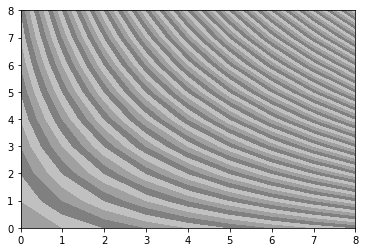

In [17]:
x = np.arange(1, 10)
y = x.reshape(-1, 1)
h = x * y

import matplotlib.pyplot as plt
%matplotlib inline

cs = plt.contourf(h, levels=[_ for _ in range(100)],
    colors=['#808080', '#A0A0A0', '#C0C0C0'], extend='both')
cs.cmap.set_over('red')
cs.cmap.set_under('blue')
cs.changed()


In [63]:
import numpy as np
import pandas as pd
from pyntcloud import PyntCloud

ttt = np.copy(np.array(data_params))
for _ in range(2):
    ttt[:, 0], ttt[:, 1], ttt[:, 2] = ttt[:, 0], ttt[:, 1], 10*sc(ttt[:, 2])

points = pd.DataFrame(
    ttt.astype(np.float32), 
    columns=['x', 'y', 'z'])


cloud = PyntCloud(points)

In [64]:
k_neighbors = cloud.get_neighbors(k=700)

eigenvalues = cloud.add_scalar_field(
    "eigen_values", 
    k_neighbors=k_neighbors)

In [65]:
curvature = cloud.add_scalar_field("curvature", ev=eigenvalues)
cloud.plot(use_as_color=curvature, cmap="plasma", backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.019958605989813805, 6.053524613380432, 11…

In [34]:
anisotropy = cloud.add_scalar_field("anisotropy", ev=eigenvalues)
cloud.plot(use_as_color=anisotropy, cmap="plasma", backend='pythreejs')

Renderer(camera=PerspectiveCamera(aspect=1.6, fov=90.0, position=(-0.019958605989813805, 6.053524613380432, 26…

In [73]:
def get_feature_tensor_from_lattice(lat):
    import scipy.signal
    import numpy as np
    import pandas as pd

    coords = list(lat.keys())
    vals = list(lat.values())
    coords_initial = np.array([list(coords[_]) for _ in range(len(coords)) if (vals[_] == 0)])

    coords = np.copy(coords_initial+np.random.normal(0,0.2,coords_initial.shape))
    coords = np.concatenate([coords]+[coords_initial+np.random.normal(0,0.2,coords_initial.shape) for _ in range(10)], axis=0)

    cloud = PyntCloud(points)

    voxelgrid_id = cloud.add_structure("voxelgrid", n_x=28, n_y=28, n_z=28)
    voxelgrid = cloud.structures[voxelgrid_id]
    feature_tensor = voxelgrid.get_feature_vector(mode='density')

    return feature_tensor


In [74]:
x_train = np.zeros((len(lattices),28,28,28,1))

In [75]:
for _ in range(x_train.shape[0]):
    print(_, end=' ')
    x_train[_] = get_feature_tensor_from_lattice(lattices[_]).reshape(28,28,28,1)

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 89 90 91 92 93 94 95 96 97 98 99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275 276 27

1872 1873 1874 1875 1876 1877 1878 1879 1880 1881 1882 1883 1884 1885 1886 1887 1888 1889 1890 1891 1892 1893 1894 1895 1896 1897 1898 1899 1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065 2066 2067 2068 2069 2070 2071 

3540 3541 3542 3543 3544 3545 3546 3547 3548 3549 3550 3551 3552 3553 3554 3555 3556 3557 3558 3559 3560 3561 3562 3563 3564 3565 3566 3567 3568 3569 3570 3571 3572 3573 3574 3575 3576 3577 3578 3579 3580 3581 3582 3583 3584 3585 3586 3587 3588 3589 3590 3591 3592 3593 3594 3595 3596 3597 3598 3599 3600 3601 3602 3603 3604 3605 3606 3607 3608 3609 3610 3611 3612 3613 3614 3615 3616 3617 3618 3619 3620 3621 3622 3623 3624 3625 3626 3627 3628 3629 3630 3631 3632 3633 3634 3635 3636 3637 3638 3639 3640 3641 3642 3643 3644 3645 3646 3647 3648 3649 3650 3651 3652 3653 3654 3655 3656 3657 3658 3659 3660 3661 3662 3663 3664 3665 3666 3667 3668 3669 3670 3671 3672 3673 3674 3675 3676 3677 3678 3679 3680 3681 3682 3683 3684 3685 3686 3687 3688 3689 3690 3691 3692 3693 3694 3695 3696 3697 3698 3699 3700 3701 3702 3703 3704 3705 3706 3707 3708 3709 3710 3711 3712 3713 3714 3715 3716 3717 3718 3719 3720 3721 3722 3723 3724 3725 3726 3727 3728 3729 3730 3731 3732 3733 3734 3735 3736 3737 3738 3739 

5180 5181 5182 5183 5184 5185 5186 5187 5188 5189 5190 5191 5192 5193 5194 5195 5196 5197 5198 5199 5200 5201 5202 5203 5204 5205 5206 5207 5208 5209 5210 5211 5212 5213 5214 5215 5216 5217 5218 5219 5220 5221 5222 5223 5224 5225 5226 5227 5228 5229 5230 5231 5232 5233 5234 5235 5236 5237 5238 5239 5240 5241 5242 5243 5244 5245 5246 5247 5248 5249 5250 5251 5252 5253 5254 5255 5256 5257 5258 5259 5260 5261 5262 5263 5264 5265 5266 5267 5268 5269 5270 5271 5272 5273 5274 5275 5276 5277 5278 5279 5280 5281 5282 5283 5284 5285 5286 5287 5288 5289 5290 5291 5292 5293 5294 5295 5296 5297 5298 5299 5300 5301 5302 5303 5304 5305 5306 5307 5308 5309 5310 5311 5312 5313 5314 5315 5316 5317 5318 5319 5320 5321 5322 5323 5324 5325 5326 5327 5328 5329 5330 5331 5332 5333 5334 5335 5336 5337 5338 5339 5340 5341 5342 5343 5344 5345 5346 5347 5348 5349 5350 5351 5352 5353 5354 5355 5356 5357 5358 5359 5360 5361 5362 5363 5364 5365 5366 5367 5368 5369 5370 5371 5372 5373 5374 5375 5376 5377 5378 5379 

6830 6831 6832 6833 6834 6835 6836 6837 6838 6839 6840 6841 6842 6843 6844 6845 6846 6847 6848 6849 6850 6851 6852 6853 6854 6855 6856 6857 6858 6859 6860 6861 6862 6863 6864 6865 6866 6867 6868 6869 6870 6871 6872 6873 6874 6875 6876 6877 6878 6879 6880 6881 6882 6883 6884 6885 6886 6887 6888 6889 6890 6891 6892 6893 6894 6895 6896 6897 6898 6899 6900 6901 6902 6903 6904 6905 6906 6907 6908 6909 6910 6911 6912 6913 6914 6915 6916 6917 6918 6919 6920 6921 6922 6923 6924 6925 6926 6927 6928 6929 6930 6931 6932 6933 6934 6935 6936 6937 6938 6939 6940 6941 6942 6943 6944 6945 6946 6947 6948 6949 6950 6951 6952 6953 6954 6955 6956 6957 6958 6959 6960 6961 6962 6963 6964 6965 6966 6967 6968 6969 6970 6971 6972 6973 6974 6975 6976 6977 6978 6979 6980 6981 6982 6983 6984 6985 6986 6987 6988 6989 6990 6991 6992 6993 6994 6995 6996 6997 6998 6999 7000 7001 7002 7003 7004 7005 7006 7007 7008 7009 7010 7011 7012 7013 7014 7015 7016 7017 7018 7019 7020 7021 7022 7023 7024 7025 7026 7027 7028 7029 

8473 8474 8475 8476 8477 8478 8479 8480 8481 8482 8483 8484 8485 8486 8487 8488 8489 8490 8491 8492 8493 8494 8495 8496 8497 8498 8499 8500 8501 8502 8503 8504 8505 8506 8507 8508 8509 8510 8511 8512 8513 8514 8515 8516 8517 8518 8519 8520 8521 8522 8523 8524 8525 8526 8527 8528 8529 8530 8531 8532 8533 8534 8535 8536 8537 8538 8539 8540 8541 8542 8543 8544 8545 8546 8547 8548 8549 8550 8551 8552 8553 8554 8555 8556 8557 8558 8559 8560 8561 8562 8563 8564 8565 8566 8567 8568 8569 8570 8571 8572 8573 8574 8575 8576 8577 8578 8579 8580 8581 8582 8583 8584 8585 8586 8587 8588 8589 8590 8591 8592 8593 8594 8595 8596 8597 8598 8599 8600 8601 8602 8603 8604 8605 8606 8607 8608 8609 8610 8611 8612 8613 8614 8615 8616 8617 8618 8619 8620 8621 8622 8623 8624 8625 8626 8627 8628 8629 8630 8631 8632 8633 8634 8635 8636 8637 8638 8639 8640 8641 8642 8643 8644 8645 8646 8647 8648 8649 8650 8651 8652 8653 8654 8655 8656 8657 8658 8659 8660 8661 8662 8663 8664 8665 8666 8667 8668 8669 8670 8671 8672 

10119 10120 10121 10122 10123 10124 10125 10126 10127 10128 10129 10130 10131 10132 10133 10134 10135 10136 10137 10138 10139 10140 10141 10142 10143 10144 10145 10146 10147 10148 10149 10150 10151 10152 10153 10154 10155 10156 10157 10158 10159 10160 10161 10162 10163 10164 10165 10166 10167 10168 10169 10170 10171 10172 10173 10174 10175 10176 10177 10178 10179 10180 10181 10182 10183 10184 10185 10186 10187 10188 10189 10190 10191 10192 10193 10194 10195 10196 10197 10198 10199 10200 10201 10202 10203 10204 10205 10206 10207 10208 10209 10210 10211 10212 10213 10214 10215 10216 10217 10218 10219 10220 10221 10222 10223 10224 10225 10226 10227 10228 10229 10230 10231 10232 10233 10234 10235 10236 10237 10238 10239 10240 10241 10242 10243 10244 10245 10246 10247 10248 10249 10250 10251 10252 10253 10254 10255 10256 10257 10258 10259 10260 10261 10262 10263 10264 10265 10266 10267 10268 10269 10270 10271 10272 10273 10274 10275 10276 10277 10278 10279 10280 10281 10282 10283 10284 1028

11496 11497 11498 11499 11500 11501 11502 11503 11504 11505 11506 11507 11508 11509 11510 11511 11512 11513 11514 11515 11516 11517 11518 11519 11520 11521 11522 11523 11524 11525 11526 11527 11528 11529 11530 11531 11532 11533 11534 11535 11536 11537 11538 11539 11540 11541 11542 11543 11544 11545 11546 11547 11548 11549 11550 11551 11552 11553 11554 11555 11556 11557 11558 11559 11560 11561 11562 11563 11564 11565 11566 11567 11568 11569 11570 11571 11572 11573 11574 11575 11576 11577 11578 11579 11580 11581 11582 11583 11584 11585 11586 11587 11588 11589 11590 11591 11592 11593 11594 11595 11596 11597 11598 11599 11600 11601 11602 11603 11604 11605 11606 11607 11608 11609 11610 11611 11612 11613 11614 11615 11616 11617 11618 11619 11620 11621 11622 11623 11624 11625 11626 11627 11628 11629 11630 11631 11632 11633 11634 11635 11636 11637 11638 11639 11640 11641 11642 11643 11644 11645 11646 11647 11648 11649 11650 11651 11652 11653 11654 11655 11656 11657 11658 11659 11660 11661 1166

12864 12865 12866 12867 12868 12869 12870 12871 12872 12873 12874 12875 12876 12877 12878 12879 12880 12881 12882 12883 12884 12885 12886 12887 12888 12889 12890 12891 12892 12893 12894 12895 12896 12897 12898 12899 12900 12901 12902 12903 12904 12905 12906 12907 12908 12909 12910 12911 12912 12913 12914 12915 12916 12917 12918 12919 12920 12921 12922 12923 12924 12925 12926 12927 12928 12929 12930 12931 12932 12933 12934 12935 12936 12937 12938 12939 12940 12941 12942 12943 12944 12945 12946 12947 12948 12949 12950 12951 12952 12953 12954 12955 12956 12957 12958 12959 12960 12961 12962 12963 12964 12965 12966 12967 12968 12969 12970 12971 12972 12973 12974 12975 12976 12977 12978 12979 12980 12981 12982 12983 12984 12985 12986 12987 12988 12989 12990 12991 12992 12993 12994 12995 12996 12997 12998 12999 13000 13001 13002 13003 13004 13005 13006 13007 13008 13009 13010 13011 13012 13013 13014 13015 13016 13017 13018 13019 13020 13021 13022 13023 13024 13025 13026 13027 13028 13029 1303

14249 14250 14251 14252 14253 14254 14255 14256 14257 14258 14259 14260 14261 14262 14263 14264 14265 14266 14267 14268 14269 14270 14271 14272 14273 14274 14275 14276 14277 14278 14279 14280 14281 14282 14283 14284 14285 14286 14287 14288 14289 14290 14291 14292 14293 14294 14295 14296 14297 14298 14299 14300 14301 14302 14303 14304 14305 14306 14307 14308 14309 14310 14311 14312 14313 14314 14315 14316 14317 14318 14319 14320 14321 14322 14323 14324 14325 14326 14327 14328 14329 14330 14331 14332 14333 14334 14335 14336 14337 14338 14339 14340 14341 14342 14343 14344 14345 14346 14347 14348 14349 14350 14351 14352 14353 14354 14355 14356 14357 14358 14359 14360 14361 14362 14363 14364 14365 14366 14367 14368 14369 14370 14371 14372 14373 14374 14375 14376 14377 14378 14379 14380 14381 14382 14383 14384 14385 14386 14387 14388 14389 14390 14391 14392 14393 14394 14395 14396 14397 14398 14399 14400 14401 14402 14403 14404 14405 14406 14407 14408 14409 14410 14411 14412 14413 14414 1441

15635 15636 15637 15638 15639 15640 15641 15642 15643 15644 15645 15646 15647 15648 15649 15650 15651 15652 15653 15654 15655 15656 15657 15658 15659 15660 15661 15662 15663 15664 15665 15666 15667 15668 15669 15670 15671 15672 15673 15674 15675 15676 15677 15678 15679 15680 15681 15682 15683 15684 15685 15686 15687 15688 15689 15690 15691 15692 15693 15694 15695 15696 15697 15698 15699 15700 15701 15702 15703 15704 15705 15706 15707 15708 15709 15710 15711 15712 15713 15714 15715 15716 15717 15718 15719 15720 15721 15722 15723 15724 15725 15726 15727 15728 15729 15730 15731 15732 15733 15734 15735 15736 15737 15738 15739 15740 15741 15742 15743 15744 15745 15746 15747 15748 15749 15750 15751 15752 15753 15754 15755 15756 15757 15758 15759 15760 15761 15762 15763 15764 15765 15766 15767 15768 15769 15770 15771 15772 15773 15774 15775 15776 15777 15778 15779 15780 15781 15782 15783 15784 15785 15786 15787 15788 15789 15790 15791 15792 15793 15794 15795 15796 15797 15798 15799 15800 1580

17005 17006 17007 17008 17009 17010 17011 17012 17013 17014 17015 17016 17017 17018 17019 17020 17021 17022 17023 17024 17025 17026 17027 17028 17029 17030 17031 17032 17033 17034 17035 17036 17037 17038 17039 17040 17041 17042 17043 17044 17045 17046 17047 17048 17049 17050 17051 17052 17053 17054 17055 17056 17057 17058 17059 17060 17061 17062 17063 17064 17065 17066 17067 17068 17069 17070 17071 17072 17073 17074 17075 17076 17077 17078 17079 17080 17081 17082 17083 17084 17085 17086 17087 17088 17089 17090 17091 17092 17093 17094 17095 17096 17097 17098 17099 17100 17101 17102 17103 17104 17105 17106 17107 17108 17109 17110 17111 17112 17113 17114 17115 17116 17117 17118 17119 17120 17121 17122 17123 17124 17125 17126 17127 17128 17129 17130 17131 17132 17133 17134 17135 17136 17137 17138 17139 17140 17141 17142 17143 17144 17145 17146 17147 17148 17149 17150 17151 17152 17153 17154 17155 17156 17157 17158 17159 17160 17161 17162 17163 17164 17165 17166 17167 17168 17169 17170 1717

18371 18372 18373 18374 18375 18376 18377 18378 18379 18380 18381 18382 18383 18384 18385 18386 18387 18388 18389 18390 18391 18392 18393 18394 18395 18396 18397 18398 18399 18400 18401 18402 18403 18404 18405 18406 18407 18408 18409 18410 18411 18412 18413 18414 18415 18416 18417 18418 18419 18420 18421 18422 18423 18424 18425 18426 18427 18428 18429 18430 18431 18432 18433 18434 18435 18436 18437 18438 18439 18440 18441 18442 18443 18444 18445 18446 18447 18448 18449 18450 18451 18452 18453 18454 18455 18456 18457 18458 18459 18460 18461 18462 18463 18464 18465 18466 18467 18468 18469 18470 18471 18472 18473 18474 18475 18476 18477 18478 18479 18480 18481 18482 18483 18484 18485 18486 18487 18488 18489 18490 18491 18492 18493 18494 18495 18496 18497 18498 18499 18500 18501 18502 18503 18504 18505 18506 18507 18508 18509 18510 18511 18512 18513 18514 18515 18516 18517 18518 18519 18520 18521 18522 18523 18524 18525 18526 18527 18528 18529 18530 18531 18532 18533 18534 18535 18536 1853

19737 19738 19739 19740 19741 19742 19743 19744 19745 19746 19747 19748 19749 19750 19751 19752 19753 19754 19755 19756 19757 19758 19759 19760 19761 19762 19763 19764 19765 19766 19767 19768 19769 19770 19771 19772 19773 19774 19775 19776 19777 19778 19779 19780 19781 19782 19783 19784 19785 19786 19787 19788 19789 19790 19791 19792 19793 19794 19795 19796 19797 19798 19799 19800 19801 19802 19803 19804 19805 19806 19807 19808 19809 19810 19811 19812 19813 19814 19815 19816 19817 19818 19819 19820 19821 19822 19823 19824 19825 19826 19827 19828 19829 19830 19831 19832 19833 19834 19835 19836 19837 19838 19839 19840 19841 19842 19843 19844 19845 19846 19847 19848 19849 19850 19851 19852 19853 19854 19855 19856 19857 19858 19859 19860 19861 19862 19863 19864 19865 19866 19867 19868 19869 19870 19871 19872 19873 19874 19875 19876 19877 19878 19879 19880 19881 19882 19883 19884 19885 19886 19887 19888 19889 19890 19891 19892 19893 19894 19895 19896 19897 19898 19899 19900 19901 19902 1990

In [103]:
np.save('x_train', x_train)

In [78]:
y_train = np.copy(np.log(random_coords))

In [104]:
np.save('y_train', y_train)

In [76]:
from __future__ import division, print_function, absolute_import
from keras.models import Sequential, model_from_json
from keras.layers import Dense, Dropout, Flatten, Conv3D, MaxPool3D, BatchNormalization, Input
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.callbacks import ReduceLROnPlateau, TensorBoard

import h5py
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
from sklearn.metrics import confusion_matrix, accuracy_score

Using TensorFlow backend.


In [85]:
28*28*28/(7*7*2)

224.0

In [86]:
7*7*2

98

In [89]:
16*4

64

In [93]:
from keras.layers import Input, Embedding, LSTM, Dense
from keras.models import Model
import keras
import numpy as np
np.random.seed(0)  # Set a random seed for reproducibility

# Headline input: meant to receive sequences of 100 integers, between 1 and 10000.
# Note that we can name any layer by passing it a "name" argument.
main_input = Input(shape=(100,), dtype='int32', name='main_input')

# This embedding layer will encode the input sequence
# into a sequence of dense 512-dimensional vectors.
x = Embedding(output_dim=512, input_dim=10000, input_length=100)(main_input)

# A LSTM will transform the vector sequence into a single vector,
# containing information about the entire sequence
lstm_out = LSTM(32)(x)

In [94]:
auxiliary_output = Dense(1, activation='sigmoid', name='aux_output')(lstm_out)

In [95]:
auxiliary_input = Input(shape=(5,), name='aux_input')
x = keras.layers.concatenate([lstm_out, auxiliary_input])

# We stack a deep densely-connected network on top
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)
x = Dense(64, activation='relu')(x)

# And finally we add the main logistic regression layer
main_output = Dense(1, activation='sigmoid', name='main_output')(x)

In [96]:
model = Model(inputs=[main_input, auxiliary_input], outputs=[main_output, auxiliary_output])

In [97]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy',
              loss_weights=[1., 0.2])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [101]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
main_input (InputLayer)         (None, 100)          0                                            
__________________________________________________________________________________________________
embedding_2 (Embedding)         (None, 100, 512)     5120000     main_input[0][0]                 
__________________________________________________________________________________________________
lstm_2 (LSTM)                   (None, 32)           69760       embedding_2[0][0]                
__________________________________________________________________________________________________
aux_input (InputLayer)          (None, 5)            0                                            
__________________________________________________________________________________________________
concatenat

In [102]:
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)
print(input_shape)

(28, 28, 1)


In [77]:
# Conv2D layer
def Conv(filters=16, kernel_size=(3,3,3), activation='relu', input_shape=None):
    if input_shape:
        return Conv3D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation, input_shape=input_shape)
    else:
        return Conv3D(filters=filters, kernel_size=kernel_size, padding='Same', activation=activation)


def CNN(input_dim, num_classes):
    model = Sequential()
    model.add(Conv(64, (3,3,3), input_shape=input_dim))
    model.add(Conv(64, (3,3,3)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv(64, (2,2,2)))
    model.add(Conv(64, (2,2,2)))
    model.add(BatchNormalization())
    model.add(Conv(64, (2,2,2)))
    model.add(BatchNormalization())
    model.add(Conv(64, (2,2,2)))
    model.add(BatchNormalization())
    model.add(Dropout(0.25))
    model.add(Conv(64, (2,2,2)))
    model.add(BatchNormalization())
    model.add(MaxPool3D())
    model.add(Dropout(0.25))
    model.add(Dropout(0.25))
    model.add(Conv(64, (2,2,2)))
    model.add(BatchNormalization())
    model.add(MaxPool3D())
    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(num_classes, activation='tanh'))
    return model

def train(optimizer, scheduler):
    global model
    print("Training...")
    model.compile(optimizer = 'adam' , loss = "mse", metrics=["mse"])
    model.summary()
    model.fit(x=x_train, y=y_train, batch_size=batch_size, epochs=epochs, validation_split=0.15,
                    verbose=1, callbacks=[scheduler, tensorboard])

In [79]:
# Hyper Parameter
num_classes = 2
batch_size = 86
epochs = 30



# Set up TensorBoard
tensorboard = TensorBoard(batch_size=batch_size)

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
scheduler = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, factor=0.5, min_lr=1e-5)
model = CNN((28,28,28,1), num_classes=num_classes)

train(optimizer, scheduler)





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Training...

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv3d_1 (Conv3D)            (None, 28, 28, 28, 64)    1792      
_________________________________________________________________
conv3d_2 (Conv3D)            (None, 28, 28, 28, 64)    110656    
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 28, 64)    256       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 28, 64)    0         
_________________________________________________________________
conv3d_3 (Conv3D)            (None, 28, 28, 28, 64)    32832     
_________________________________________________________________
conv3d_4 (Conv3D)            (None, 28, 28, 28, 64)    32832     
__________

UnknownError: 2 root error(s) found.
  (0) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv3d_1/convolution}}]]
	 [[loss/mul/_505]]
  (1) Unknown: Failed to get convolution algorithm. This is probably because cuDNN failed to initialize, so try looking to see if a warning log message was printed above.
	 [[{{node conv3d_1/convolution}}]]
0 successful operations.
0 derived errors ignored.